# Introduction

This manual defines and documents the conventions, methodology, and information flow associated with the System Advisor Model (SAM) physical trough model in the System Advisor Model [10]. A detailed overview of each subsystem is provided, with the engineering/mathematical basis laid out where appropriate. While this documentation contains general information on the model structure, the beginning modeler may find portions of the content challenging. For an introductory overview on how to use the model, please refer to the System Advisor help system. Definitions of technical terms (denoted with _italic_ text) are provided in the Glossary of Terms at the end of this document (page 112).

The System Advisor Model provides a consistent framework for analyzing and comparing power system costs and performance across the range of solar technologies and markets, from photovoltaic (PV) systems for residential and commercial markets to concentrating solar power and large PV systems for utility markets.

System Advisor is based on an hourly simulation engine that interacts with performance, cost, and finance models to calculate energy output, energy costs, and cash flows. The software can also account for the effect of incentives on cash flows. System Advisor's spreadsheet interface allows for exchanging data with external models developed in Microsoft(r) Excel. Most of System Advisor's inputs can be used as parametric variables for sensitivity studies to investigate impacts of variations in performance, cost, and financial parameters on model results.

## _TRNSYS simulation framework_

System Advisor models system performance using the TRNSYS1 software developed at the University of Wisconsin combined with customized components. TRNSYS is a validated, time-series simulation program that can simulate the performance of photovoltaic, concentrating solar power, water heating systems, and other renewable energy systems using hourly resource data. TRNSYS is integrated into System Advisor so there is no need to install TRNSYS software or be familiar with its use to run Solar Advisor.

Footnote 1: For more information on the TRNSYS software, refer to documentation from the University of Wisconsin at sel.me.wisc.edu/trnsys/default.htm

The default source code folder \SAM\<version number>\exelib\trnsys\source contains the FORTRAN code for each TRNSYS module: sam_mw_trough_Type250.f90 (solar field), sam_mw_trough_Type251.f90 (storage and dispatch), sam_mw_pt_Type224.f90 (power cycle), and the shared HTF property subroutines sam_mw_pt_Type229.f90 and sam_mw_pt_propmod.

## _Variable Names and Abbreviations_

The following tables contain information and conventions used in this document. Table 1 lists the abbreviations, Table 2 lists variable naming conventions, and Table 3 list commonly used variable subscript conventions.

\begin{array}{l|l}
\textbf{Abbreviation} & \textbf{Description} \\
\hline
ACC & Air-cooledcondenser \\
CSP & Concentrating SolarPower \\
DNI & Direct-normal irradiation \\
HTF & Heat transfer fluid \\
IAM & Incidence anglemodifier \\
IOCop & Inlet/outlet/cross-overpipe \\
ITD & Initial temperaturedifference \\
LHV & Lowerheatingvalue \\
NREL & National RenewableEnergyLaboratory \\
SAM & System AdvisorModel \\
TES & Thermal energystorage \\
TOU & Timeofuse \\
\hline
\end{array}

\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Description} & \textbf{Units} & \textbf{Units Abbrv.} \\
\hline
A & Area & meters squared & m^2 \\
c, c_{p} & Specific heat & Joules per kilogram Kelvin & \frac{J}{kgK} \\
C & Calculation coefficient & varies & varies \\
\dot{C} & Thermal capacity rate & Watts per Kelvin & \frac{W}{K} \\
D & Diameter & meters & m \\
E & Energy & Joules & J \\
g & Gravitation constant & meters per sq. second & \frac{m}{s^2} \\
f & Fraction & none & none \\
fr & Friction factor & none & none \\
h & Enthalpy & Joules per kilogram & \frac{J}{kg} \\
H & Height & meters & m \\
i,j & Counting indexes & none & none \\
I_{bn} & Direct solar irradiation & Watts per sq. meter & \frac{W}{m^2} \\
k & Thermal conductivity & Watts per meter-Kelvin & \frac{W}{m\cdot K} \\
L & Length & meters & m \\
m & Mass & kilograms & kg \\
\dot{m} & Mass flow rate & kilograms per second & \frac{kg}{s} \\
(mc) & Thermal inertia & Joules per Kelvin & \frac{J}{K} \\
N & Integer number & none & none \\
Nu & Nusselt number & none & none \\
P & Pressure & Pascals & Pa \\
Pr & Prandtl number & none & none \\
\dot{q} & Heat transfer rate & Watts & W \\
\dot{Q} & Cycle heat absorption rate & Watts & W \\
r & Ratio & none & none \\
R & Radius & meters & m \\
\dot{R} & Thermal resistance & Watts per Kelvin & \frac{W}{K} \\
Ra & Rayleigh number & none & none \\
Re & Reynolds number & none & none \\
s & Entropy & Joules per kilogram Kelvin & \frac{J}{kg} \\
T & Temperature & Kelvin & K \\
\overline{T} & Average temperature & Kelvin & K \\
t & Time & seconds & s \\
u & Specific internal energy & Joules per kilogram & \frac{J}{kg} \\
U & Internal energy & Joules & J \\
UA & Thermal conductance & Watts per Kelvin & \frac{W}{K} \\
v & Velocity & meters per second & \frac{m}{s} \\
\overline{V} & Volume & meters cubed & m^3 \\
\dot{W} & Cycle power output & Watts & W \\
\hline
\end{array}

\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Description} & \textbf{Units} & \textbf{Units Abbrv.} \\
\hline
\alpha & Absortance & none & none \\
\beta & Volumetric expansion coef. & inverse Kelvin & \frac{1}{K} \\
\Delta & Change in value & none & none \\
\gamma & Thermal loss coefficient & Watts per sq. meter Kelvin & \frac{W}{m^{2}\cdot K} \\
\gamma_{sol} & Solar azimuth & degrees & \circ \\
\delta & Solar declination & degrees & \circ \\
\eta & Efficiency & none & none \\
\theta & Aperture incidence angle & degrees & \circ \\
\theta_{e}/\theta_{z} & Solar elevation/zenith & degrees & \circ \\
\varepsilon & Emittance / Effectiveness & none & none \\
\mu & Dynamic viscosity & Pascal-seconds & Pa\cdot s \\
\nu & Kinematic viscosity & sq. meters per second & \frac{m^{2}}{s} \\
\pi & Pi & none & none \\
\rho & Density & kilograms per cubic meter & \frac{kg}{m^{3}} \\
\tau & Transmittance & none & none \\
\phi & Latitude & degrees & \circ \\
\chi & Thermodynamic quality & none & none \\
\psi & Longitude & degrees & \circ \\
\omega & Hour angle & degrees & \circ \\
\hline
\end{array}

\begin{array}{|l|l|l|l|} \hline
0 & \text{Previous value / initial value} & h_{\text{rsec}} & \text{Header section} \\
1..9 & \text{Item } n \text{ in a sequence} & h_{\text{grp}} & \text{Header section groups} \\ 
_{\text{tank}} & \text{Single tank} & h_{\text{l}} & \text{Heat loss} \\ 
_{.4} & \text{Available} & h_{\text{sec}} & \text{Header sections} \\ 
_{\text{abs}} & \text{Absorbed} & h_{\text{tf}} & \text{Heat transfer fluid} \\ 
_{\text{adj}} & \text{Adjusted} & h_{\text{yd}} & \text{Hydraulic} \\ 
_{\text{air}} & \text{Ambient air} & h_{\text{x}} & \text{Heat exchanger} \\ 
_{\text{amb}} & \text{Ambient} & \text{in} & \text{Inlet} \\ 
_{\text{ap}} & \text{Aperture} & \text{inc} & \text{Incident} \\ 
_{\text{approach}} & \text{Approach temperature} & \text{loop} & \text{All SCA’s in a loop} \\ 
_{\text{aux}} & \text{Auxiliary (fossil)} & \text{LHV} & \text{Lower heating value} \\ 
_{\text{ave}} & \text{Average} & m & \text{Mirror} \\ 
_{\text{bal}} & \text{Balance-of-plant} & \text{min} & \text{Minimum} \\ 
_{\text{bd}} & \text{Blowdown} & \text{max} & \text{Maximum} \\ 
_{\text{boil}} & \text{Steam boiler} & \text{ND} & \text{Non-dimensional, normalized} \\ 
_{\text{brae}} & \text{Bracket} & \text{net} & \text{Net electric} \\ 
c & \text{Cold} & \text{opt} & \text{Optical} \\ 
_{\text{cap}} & \text{Capacity} & \text{out} & \text{Outlet} \\ 
_{\text{calc}} & \text{Calculated} & p & \text{Pump} \\ 
_{\text{chg}} & \text{Charging} & \text{par} & \text{Parasitic} \\ 
_{\text{col}} & \text{Collector} & \text{pb} & \text{Power block (or power cycle)} \\ 
_{\text{cond}} & \text{Conduction / condenser} & \text{pm} & \text{Per meter basis} \\ 
_{\text{conv}} & \text{Convection} & \text{rad} & \text{Radiation} \\ 
_{\text{cs}} & \text{Cross-sectional} & \text{rec} & \text{Receiver} \\ 
_{\text{cw}} & \text{Cooling water} & \text{rej} & \text{Rejected} \\ 
_{\text{cycle}} & \text{Power cycle} & \text{run} & \text{Runner pipe} \\ 
_{\text{db}} & \text{Dry-bulb} & \text{runsec} & \text{Runner section} \\ 
_{\text{def}} & \text{Defocus} & s & \text{Isentropic} \\ 
_{\text{dem}} & \text{Demand} & \text{sby} & \text{Standby} \\ 
_{\text{des}} & \text{Design point} & \text{sca} & \text{Solar collector assembly} \\ 
_{\text{dis}} & \text{Discharging} & \text{setpoint} & \text{Design point or setpoint} \\ 
_{\text{drift}} & \text{Condenser drift} & \text{sf} & \text{Solar field} \\ 
_{\text{dump}} & \text{Dumped energy} & \text{sol} & \text{Solar} \\ 
_{\text{duy}} & \text{Heat exchanger duty} & \text{spacing} & \text{Row spacing} \\ 
e & \text{Electric} & \text{st} & \text{Steam} \\ 
_{\text{env}} & \text{Envelope} & \text{start} & \text{Startup} \\ 
f & \text{Focal} & \text{sys} & \text{System} \\ 
_{\text{fan}} & \text{Cooling fan} & \text{tes} & \text{Thermal energy storage} \\ 
_{\text{fin}} & \text{Final} & \text{th} & \text{Thermal} \\ 
_{\text{fsec}} & \text{Field sections} & \text{tot} & \text{Total} \\ 
_{\text{fuel}} & \text{Fossil fuel} & \text{tou} & \text{Time of use} \\ 
g & \text{Guess} & \text{track} & \text{Collector tracking} \\ 
_{\text{gross}} & \text{Gross electric} & \text{trans} & \text{Transient} \\ 
_{\text{fp}} & \text{Freeze protection} & w & \text{Water} \\ 
h & \text{Hot} & \text{wb} & \text{Wet-bulb} \\ 
_{\text{hdr}} & \text{Header} & \uparrow/\downarrow & \text{Increase / Decrease} \\ 
\hline 
\end{array}

## Background and Modeling Approach

The physical trough model characterizes a parabolic trough CSP plant by deriving performance equations from first principles of heat transfer and thermodynamics where possible. In practice, this means that empirical "curve-fit" relationships are eliminated to the degree that is practical for the type of modeling analysis done in System Advisor. The primary benefit of this approach is the added flexibility in changing system parameters and component properties at a fundamental level (i.e. absorber emissivity, glass thickness, etc.) and simulating their impact on overall system performance. With this increased flexibility come a few drawbacks; these include the addition of multiple layers of modeling uncertainty and the increased opportunity for divergence in the results from a real system. While an empirical model can produce high accuracy over the range of parameters used in its development, such models cannot provide predictive performance outside these ranges. Both the physical and empirical trough models are included in System Advisor to allow for comparisons between the physical and empirical modeling approaches.

Besides fulfilling the goal of deriving system performance from first principles, the physical modeling approach achieves several other objectives: the model includes transient effects related to the thermal capacity of the HTF in the field piping, headers, and the balance of the plant; it allows for more flexible field component specification, including multiple receiver and collector types within a single loop; it maintains a reasonably short run-time allowing for parametric and statistical analyses; and it makes use of existing models where possible. Previously existing subsystem models that are adapted and incorporated into the physical model include the collector model from System Advisor's empirical trough model, the receiver heat loss model [8], a field piping pressure drop model [14], and the power cycle performance model [20] originally developed for System Advisor's power tower CSP system model. These models are discussed in more detail in dedicated sections of this report.

# Solar Field

The solar field is the heat-collecting portion of the plant. It consists of one or more _loops_ of solar collector assemblies (_SCA's_), with each loop laid out in parallel. A common _header_ pipe provides each loop with an equal flow rate of heat transfer fluid (HTF), and a second header collects the hot HTF to return it either directly to the _power cycle_ for power generation or to the thermal energy storage system for use at a later time. To minimize pumping pressure losses, the field is typically divided into multiple sections, each section with its own header set, and the power cycle is situated near the middle of the field. Figure 1 shows one possible plant layout where two header sections are used for 20 total loops.

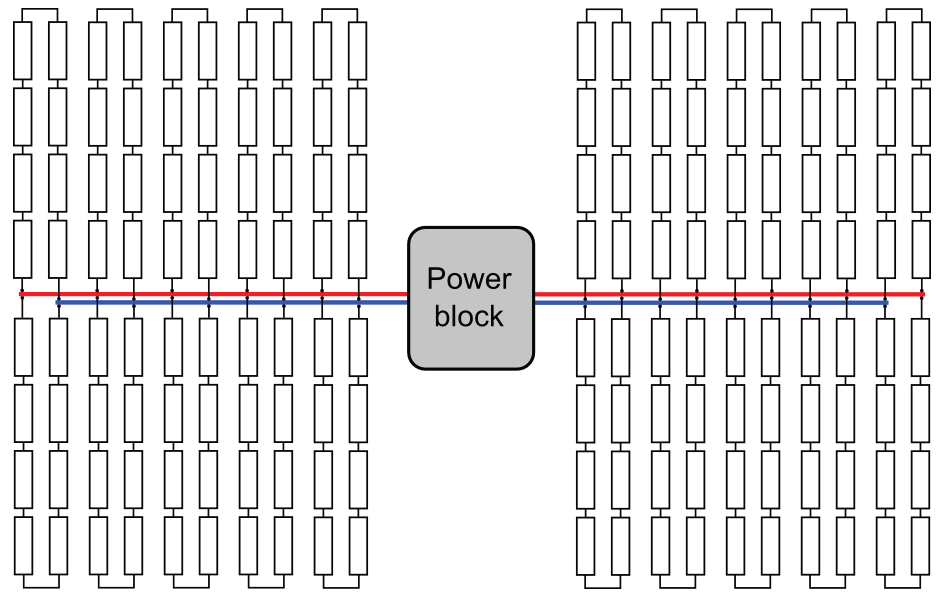

Figure 1: Onepossible field arrangement, where the field is broken up into two header sections.
Each loop in this illustration contains 8 individual SCA’s, and each portion of the header is connected to two loops-one on the top and one on the bottom of the image.

## Energy balance

Within each loop, a number of SCA's are used to incrementally heat the HTF to the design outlet temperature. Each SCA is composed of a number of parabolic _collectors_ and their _receivers2_ in series that share a single common tracking drive. In this model, the SCA serves as the lowest level of discretization. Each SCA is treated as an independent calculation node within the loop, and the absorbed energy, losses, temperature, pressure drop, and other performance values are calculated independently for each SCA. This allows each SCA to impact performance separately and potentially allows each SCA to contain different receiver and/or collector attributes. System Advisor allows the user to specify unique geometry and performance characteristics for each SCA in the loop up to a limit of four unique configurations. The order in which the SCA's are defocused in the loop during high-flux conditions can also be modified under this framework. Figure 2 illustrates these principles.

Figure 1: One possible field arrangement, where the field is broken up into two header sections. Each loop in this illustration contains 8 individual SCA’s, and each portion of the header is connected to two loops - one on the top and one on the bottom of the image.

### Nodal Energy Balance
A typical steady-state receiver model determines the temperature rise across the node by considering the absorbed energy, the mass flow rate of HTF through the receiver, and the specific heat of the HTF. This energy balance for node \(i\) is represented in Eq.[2.1].

$$\Delta T_{i}=T_{out,i}-T_{in,i}=\frac{\dot{q}_{abs}}{\dot{m}_{htf}\,c_{htf}} \tag{2.1}$$

However, in the case of the parabolic trough technology, the thermal inertia associated with the energy state of the node can impact performance to the extent that a steady-state model is insufficient; thus transient terms must be included. The most significant transient effect in the solar field is the thermal mass of the HTF in the headers and in the receiver piping, so we need to consider the change in energy of the HTF in deriving the energy balance equations. We'll start with the energy balance for a single SCA node drawn in Figure 3.

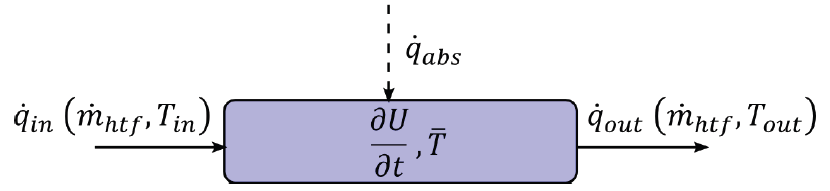

Figure 3:EnergybalanceforthereceiversinanSCA.Theenclosedboxrepresentsthecontrol volume, encompassingtheHTFwithintheabsorbertubesandpipingforasingleSCA.

The energy balance above shows a receiver tube with an inlet flow, outlet flow, absorbed energy (net absorption is positive, net loss is negative), and an internal energy term. The $\dot{q}$ heat flows are functions of the mass flow rate $\left(\dot{m}_{htf}\right)$ which is constant across the boundary, and the temperatures $T_{in}$ and $T_{out}$. The average nodal temperature $\overline{T}$ is equal to the average of the inlet and outlet temperatures of the calculation node, since the temperature rise across the node is assumed to be linear.

The internal energy term $\frac{\partial U}{\partial t}$ represents the change in energy of the node as a function of time $t$. Equivalently, this term can be expressed as:

$$\frac{\partial U}{\partial t}=\left(m\;c_{htf}+(mc)_{bal,sca}\;L\right)\;\frac {\partial T}{\partial t} \tag{2.2}$$

Here, $m$ is the mass of the HTF contained in the node, $L$ is the length of a single SCA, and $c_{htf}$ is the specific heat of the HTF. An additional thermal inertia term $\left(mc\right)_{bal,sca}$ is included to account for the thermal mass of piping, joints, insulation, and other SCA components that thermally cycle with the HTF. The $\left(mc\right)_{bal,sca}\;L$ term is dimensionally equivalent to the HTF capacitance term $m\cdot c_{htf}$, even though it is input into the model as a single value. This convention eliminates the need for specific knowledge of either the exact mass or specific heat of the additional thermal inertia while still allowing the user to account for the inertia effect. This term is dimensionally defined to represent the amount of thermal energy per meter of collector length required to raise the temperature of the node one degree K. The input units are $\frac{{W}t-h}{{m-K}}$, and the value is converted within the code to units of $\frac{{J}}{{m-K}}$.

Note that in terms of the mathematical formulation, the HTF and material properties are assumed to be constant. However, when evaluating system performance, **material and HTF thermal properties are evaluated as functions of temperature** (and pressure, if applicable).

The total energy balance in the control volume is:

$$\dot{q}_{in}+\dot{q}_{abs}=\frac{\partial U}{\partial t}+\dot{q}_{out} \tag{2.3}$$

The inlet and outlet heat flows can be expressed as:

$$\dot{q}_{in}-\dot{q}_{out} = \dot{m}_{htf}\;c_{htf}\;\left(T_{in}-T_{out}\right)$$
$$= 2\;\dot{m}_{htf}\;c_{htf}\;\left(T_{in}-\overline{T}\right)\tag{2.4}$$

Substituting this equation and the definition for the internal energy term into the energy balance equation, then solving for the first differential, the result is:

$$\frac{\partial\overline{T}}{\partial t}=\frac{2\;\dot{m}_{htf}(T_{in}- \overline{T})+\dot{q}_{abs}}{m\;c_{htf}+(mc)_{bal,sca}} \tag{2.5}$$

This is a linear first order differential equation, which has the general solution:

$$\overline{T}=\frac{\dot{q}_{abs}}{2\ \dot{m}_{htf}\cdot c_{htf}}+C_{1}\exp\left[- \frac{2\ \dot{m}_{htf}\ c_{htf}}{m\ c_{htf}+(mc)_{bal,sca}}\Delta t\right]+T_{in} \tag{2.6}$$

This equation has an unknown constant $C_{1}$ that can be determined by enforcing a boundary condition. In this situation, we know that the average nodal temperature $\overline{T}=\overline{T}_{0}$ at the beginning of the time step when $t=0$, and we define $\overline{T}_{0}$ to be the temperature $\overline{T}$ at the end of the previous time step (the average temperature is $\overline{T}=\frac{T_{out}+T_{in}}{2}$. Thus, solving for the unknown constant $C_{1}$:

$$\overline{T}_{0} = \overline{T}|_{t=0}$$

$$= \frac{\dot{q}_{abs}}{2\cdot\dot{m}_{htf}\ c_{htf}}+C_{1}e^{0}+T_{ in}$$ 

$$C_{1} = \overline{T}_{0}-\frac{\dot{q}_{abs}}{2\cdot\dot{m}_{htf}\ c_{ htf}}-T_{in} \tag{2.7}$$

Finally, we substitute the constant into the general solution to find the final equation for the outlet temperature from each SCA shown in Eq.[2.8].

$\text{For } i=1, N_{\text{sca}}:$

$$T_{out,i} = 2\ \overline{T}_{i}-T_{in,i}$$

$$T_{out,i} = \frac{\dot{q}_{abs,i}}{\dot{m}_{htf}\ c_{htf,i}}+T_{in,i} \tag{2.8}$$

 $$+2\cdot\left(\overline{T}_{0,i}-\frac{\dot{q}_{abs,i}}{2\cdot \dot{m}_{htf}\ c_{htf,i}}-T_{in,i}\right)\exp\left[\frac{-2\ \dot{m}_{htf}\ c_{htf,i}\ \Delta t}{m_{i}\ c_{htf,i}+mc_{i,bal,sca}\ L_{i}}\right]$$

This equation is applied to each node $i$ in the loop, where $T_{in,i}$ is equal to the outlet temperature of the previous node in the loop, $T_{out,i-1}$. Since the calculated temperature for each node depends on both the inlet temperature of the previous node and the node temperature from the previous time step, these values must be established as boundary conditions. The temperature of the node at the previous time step is stored from time step to time step, and the inlet temperature is set equal to the outlet temperature of the previous node for each but the first node in the loop to satisfy these requirements. The HTF mass of each node is calculated as a function of the receiver piping volume and the local HTF density.

$\text{For } i=1, N_{\text{sca}}:$

$$m_{i}=\rho_{htf,i}\ L_{i}\ A_{cs,i} \tag{2.9}$$

The inlet temperature at the first node, representing the inlet of the entire field, requires additional consideration. In a similar derivation process as the one described in Figure 3, a "system" temperature is calculated for both the hot and cold sides of the solar field. The cold system temperature is used as the node #1 inlet temperature, and the hot system temperature is used as the effective solar field outlet temperature. These values incorporate the thermal inertia associated with the header and balance-of-plant HTF mass. Under steady-state conditions, the loop inlet HTF temperature equals either:

* the power cycle outlet temperature
* the storage loop outlet temperature
* a mass-flow weighted average of the storage and power cycle outlet temperatures
* or the solar field outlet temperature (during nighttime recirculation)

depending on the control situation. However, directly using any of these outlet temperatures as the loop inlet value is inaccurate because it fails to account for the thermal inertia of the header. If we include thermal inertia as a transient effect, the derived equation for loop inlet temperature (denoted $T_{sys,c}$) is shown in Eq.[2.10].

$$T_{sys,c}=\left(T_{sys,c,0}-T_{sf,in}\right)\exp\left[-\frac{\dot{m}_{hf}}{\overline{V} _{c}\cdot\rho_{c}+\frac{(mc)_{bal,c}}{c_{c}}}\Delta t\right]+T_{sf,in} \tag{2.10}$$

Here, the cold header temperature from the last time step is $T_{sys,c,0}$, the volume in the cold header and the runner pipe is given by $\overline{V}_{c}$, and cold fluid density is $\rho_{c}$. Analogously, the hot system outlet temperature combines loop outlet flow, the header and runner pipe volumes, and the state of the system at the last time step.

$$T_{sys,h}=\left(T_{sys,h,0}-T_{loop,out}^{*}\right)\exp\left[-\frac{\dot{m}_{hf}}{ \overline{V}_{h}\cdot\rho_{h}+\frac{(mc)_{bal,h}}{c_{h}}}\Delta t\right]+T_{ loop,out}^{*} \tag{2.11}$$

Here, $T_{loop,out}^{*}$ represents the heat-loss adjusted loop outlet temperature calculated in Eq. [2.26]. The capacity term $(mc)_{bal,h}$ (or $(mc)_{bal,c}$ for the cold header) is used to account for any thermal inertia that isn't included in the HTF volume calculations. Varying this term effectively adds or subtracts internal energy capacity to the HTF in the system; its best use is as an empirical adjustment factor to help match observed plant performance. This variable is defined in terms of the thermal power (kilowatt hours) per gross electricity capacity (Megawatts) needed to raise the header temperature one degree Celsius. The $(mc)_{bal,h}$ term is applied specifically to the temperature calculation for the hot header, while $(mc)_{bal,c}$ describes only the additional cold header thermal inertia.

To illustrate this concept, consider the following example. A hypothetical 100 $MWe$ (gross) trough plant with a 35% conversion efficiency is observed starting up from a cold overnight temperature of $140^{\circ}C$. The system temperature increases a total of $150^{\circ}C$ to $290^{\circ}C$ after 1 hour of running the solar field at full load. A modeler predicts from known HTF inventory that the plant should have reached its startup temperature in only 30 minutes. Thus, the $\left(mc\right)_{bal}$ terms must together account for an half of the full-load hour that the plant took to start up. Assuming both coefficients are equal, the hot-side coefficient would be calculated as follows:

$$\begin{array}{rcl}(mc)_{bal,h}&=&\frac{0.5}{2\cdot 0.35}\cdot\frac{100,000[kWe]}{ 100[MWe]\cdot 150[K]}\\ \\ (mc)_{bal,h}&=&4.8\left[\frac{kWhr}{MWe_{cap}\cdot K}\right]\end{array} \tag{2.12}$$

Realistically, the value calculated here will be lower once the thermal inertia of the solar field piping, insulation, and joints are considered. This calculation is only provided as a demonstration of the procedure for determining an empirical thermal inertia term, and the user should carefully select their input to model their desired system.

Section 2.1 Summary

* The model calculates solar field temperatures and corresponding performance values independently at each SCA specified in the loop.
* Each SCA can have a different associated collector or receiver, up to four in total.
* The performance of one loop is representative of each loop in the field.
* The model determines the solar field inlet temperature by accounting for the return flow from storage/power cycle/field outlet and the volume of the cold header and piping.
* The model determines the solar field outlet temperature by accounting for the hot flow from the collection elements, the volume of the hot header and piping, and it adds user-specified thermal capacity terms that impact the transient behavior of the system.

### Solar Field Control

CSP plants convert direct normal irradiation (DNI) from the sun into thermal energy and eventually into electricity or some other useful product. DNI can vary significantly over a relatively short period of time, and the solar field in a trough plant must be designed to handle these variations. The solar field control algorithm uses user-specified input to make operational decisions based on the DNI resource level, ambient temperature, presence of thermal storage, etc. The minimum HTF mass flow rate, the maximum HTF mass flow rate, the HTF outlet temperature, defocus state, and the temperature of each node relative to the freeze-protection set point are parameters that are monitored and enforced by the field controller.

The field logic employs an "ideal" control strategy. This means that the HTF mass flow rate is controlled to allow the loop outlet temperature to meet the design point value when possible. Receiver heat loss and surface temperature are both functions of the HTF temperature, and HTF temperature in turn is a function of HTF mass flow rate, so the HTF temperature must be calculated iteratively. System Advisor uses successive substitution, where an initial estimate for the field mass flow rate is provided along with guessed temperature values, then the mass flow rate is recalculated and adjusted until the outlet temperature converges to the design value.

If the mass flow rate is calculated to fall outside of the acceptable range specified by the user, special control handling is required. The minimum and maximum allowable loop flow rates are specified indirectly by the user on the System Advisor Solar Field page through an allowable HTF velocity range. Eq.[2.13] shows how the minimum $\left(v_{htf,min}\right)$ and the maximum $\left(v_{htf,max}\right)$ HTF velocities are converted to mass flow rates.

$$\dot{m}_{htf,min} = v_{htf,min}\;\rho_{htf,c}\;\pi\;\left(\frac{D_{min}}{2}\right)^{2}$$
$$\dot{m}_{htf,max} = v_{htf,max}\;\rho_{htf,h}\;\pi\;\left(\frac{D_{min}}{2}\right)^{2} \tag{2.13}$$

Here, $\rho_{htf}$ represents the HTF density at the cold $\left(c\right)$ and hot $\left(h\right)$ design temperatures, and $D_{min}$ is the minimum diameter receiver tube that is present in the system.

The solar field mass flow rate is constantly adjusted within the upper and lower flow limits to maintain the desired HTF outlet temperature. Several methods of calculation are possible for determining the mass flow rate. System Advisor uses a customized numerical solution algorithm that considers the rate of change in the mass flow rate and HTF outlet temperature variables from iteration to iteration. Numerical techniques generally require an initial guess value, and this is the case for System Advisor. The initial mass flow guess is shown in Eq.[2.14].

$$\dot{m}_{htf,guess}=\frac{\sum_{i=1}^{N_{sca}}\dot{q}_{i,abs}\;N_{loops}}{c_{ htf,ave}\;(T_{loop,out,des}-T_{sf,in})} \tag{2.14}$$

Note that the average specific heat value refers to the integral average over the length of the collector loop, the HTF outlet temperature is the solar field design outlet temperature, and the inlet temperature is equal to the value provided by the power block or fluid source. Subsequent iterations depart from this energy balance basis by using the mass flow and temperature values from the previous iteration ($\dot{m}^{\prime}_{htf}$ and $T^{\prime}_{loop,out}$, respectively), and the values from the current iteration ($\dot{m}_{htf}$ and $T_{loop,out}$) to predict the mass flow for the next iteration ($\dot{m}^{*}_{htf}$). This calculation is shown in Eq.[2.15].

$$\dot{m}^{*}_{htf}=\dot{m}_{htf}+(\dot{m}_{htf}-\dot{m}^{\prime}_{htf})\cdot \left(\frac{T_{loop,out,des}-T_{loop,out}}{T_{loop,out}-T^{\prime}_{loop, out}}\right) \tag{2.15}$$

where:

$$-0.75\ \left|\dot{m}_{htf}\right|\leq\left[(\dot{m}_{htf}-\dot{m}^{\prime}_{htf})\cdot \left(\frac{T_{loop,out,des}-T_{loop,out}}{T_{loop,out}-T^{\prime}_{loop,out}} \right)\right]\leq 0.75\ \left|\dot{m}_{htf}\right| \tag{2.16}$$

The limits of $[-.75,+.75]$ in Eq. [2.16] were selected to promote model convergence and do not reflect any physical limit on the bounds of the mass flow rate. The limits apply from iteration-to-iteration within a single time step, while time-step-to-time-step variations in the mass flow rate may exceed these limits.

### 2.2.1 _Collector defocusing_

If the calculated mass flow rate through the loop falls below the minimum allowable flow rate $\left(\dot{m}_{htf,min}\right)$, then the code resets the flow rate to be equal to this minimum value and recalculates the outlet temperature of the loop, assuming a fixed flow rate. Thus, in conditions where the minimum criterion is not met, the outlet temperature from the field will fall below the design value.

In the opposite case, the solar field may absorb so much energy that the mass flow rate required to maintain the design outlet temperature exceeds the maximum specified value. Once the mass flow rate reaches an upper limit, the only way to avoid over-temperature HTF (and a dangerous situation) is to reduce the amount of absorbed energy by defocusing collectors. The plant controller can defocus collectors either when the amount of energy produced by the solar field exceeds what can be consumed in the power cycle and/or storage, or when the converged mass flow rate exceeds the value calculated in Eq.[2.13]. For the latter case, the logic considers the total amount of absorbed energy in each SCA in the field and defocuses the SCA's until the total absorbed energy falls below the threshold required by the maximum mass flow rate.

SCA's are defocused using one of three user-selected schemes.

#### Full SCA Defocusing

The first option allows the user to specify an order in which each SCA in a loop should be defocused. During defocusing periods, the SCA's will be completely defocused in successive order until the total absorbed power falls below the imposed limit. Note that thermal losses incurred by the defocused SCA(s) are still accounted for in all energy calculations. Eq.[2.17] shows how the code determines the number of collectors to defocus. The total effective thermal output power $q_{sf,eff}$ is reduced by the amount absorbed in each collector according to defocus order until the maximum allowable thermal output $q_{sf,limit}$ is met.The array items $A[i]$ indicate the order of defocusing requested by the user, and the subscripts $abs$, $hl$, and $inc$ refer to the absorbed thermal energy, thermal heat losses, and irradiation on each SCA, respectively.

For $i=1,N_{sca}$:

_And while_ $\dot{q}_{sf,eff}>\dot{q}_{sf,limit}$ and $i<=N_{sca}$:

$$\dot{q}_{sf,eff}=\dot{q}_{sf,eff}-\max\left[\left(\dot{q}_{A[i],abs}-\dot{q}_ {A[i],hl}\right),0\right] \tag{2.17}$$
_Then, for_ $j=1,i$:

$$\dot{q}_{i,inc}=0$$

This option is activated by clearing the **Allow partial defocusing** check box on the Solar Field page.

#### Partial Sequenced Defocusing

The second option also allows sequenced defocusing of SCA's, but instead of completely defocusing the SCA's, partial defocusing is allowed. Sometimes called feathering, this practice is implemented in real plants by modulating the tracking angle to partially shift the receiver out of the reflected radiation, thus reducing the intercept factor. This control scheme sequentially defocuses the SCA's according to the order specified on the Solar Field page, but allows one SCA to be defocused partially. The defocusing calculations in this mode require three steps: first, the number of affected SCA's is determined, second, the SCA's that are wholly unneeded are completely defocused, and third, the final defocused SCA is partially modulated to match the desired thermal output.

_For_ $i=1,N_{sca}$:

_And while_ $\dot{q}_{sf,eff}>\dot{q}_{sf,limit}$ and $i<=N_{sca}$:

$$\dot{q}_{sf,eff}=\dot{q}_{sf,eff}-\max\left[\left(\dot{q}_{A[i],abs}-\dot{q}_{ A[i],hl}\right),0\right] \tag{2.18}$$

_Then, for_ $j=1,i-1$:

$$\dot{q}_{i,inc}=0$$

_Finally, for_ $j=i$:

$$\dot{q}_{i,inc}=\dot{q}_{i,inc}\,\frac{\dot{q}_{sf,eff}-\sum_{j=i+1}^{N_{sca}} \dot{q}_{i,abs}}{\dot{q}_{i,abs}} \tag{2.19}$$

This option is selected by enabling the **Allow partial defocusing** check box and selecting the **Sequenced** option from the drop down menu.

#### Partial Simultaneous Defocusing

The final option implements defocusing by simultaneously partially defocusing all of the SCA's in the loop. Because all SCA's are defocused equally, the defocus order specified in the loop configuration control on the Solar Field page is disregarded. Eq.[2.20] shows the simple scaling method used for each SCA.

_For_ $i=1,N_{sca}$:

$$\dot{q}_{i,inc}=\dot{q}_{i,inc}\,\frac{\dot{q}_{sf,limit}}{\dot{q}_{sf,eff}} \tag{2.20}$$

Select this method by enabling the **Allow partial defocusing** check box and choosing the **Simultaneous** option in the drop down menu.

Note that the defocusing and control algorithms are iterative; consequently, the variables appearing on both sides of the equations from Eq.[2.17] through Eq.[2.20] are provided with initial values and are iteratively modified until the solution converges.

The model tracks and reports the total defocused energy (also called "dumped" energy). This value measures the amount of incident energy that is not allowed to reach the collector as a result of defocusing, and the reported value includes dumped energy caused by both the field controller and the general plant controller. Dumped energy is approximated by considering the product of the total aperture area $\left(A_{ap,tot}\right)$ collector optical efficiency during the time step $\left(\eta_{opt}\right)$, the solar irradiation $\left(I_{bn}\right)$ and the fraction of defocused SCA's during the time step $\left(\eta_{def}\right)$. Thermal losses are not included in the dumped energy calculation.

$$\dot{q}_{dump}=A_{ap,tot}\;I_{bn}\;\eta_{opt}\;\eta_{def} \tag{2.21}$$

### 2.2.2 Field freeze protection

During times of extended shutdown or cool nighttime temperatures, the heat transfer fluid in the solar field may cool to an unacceptably low temperature. To avoid this situation, electric heat trace equipment can provide supplemental heat to the HTF in the solar field. System Advisor models this situation by enforcing the minimum field HTF temperature specified as the freeze protection temperature on the Solar Field page. The temperatures in each node of the loop and in the headers are monitored. If the temperature falls below the minimum allowable value, heat is added to the system to maintain the temperature at the minimum value. This energy is tracked and reported as a parasitic loss. The magnitude of freeze protection energy is calculated for each of the $i$ nodes in the loop of $N_{sca}$ collector assemblies in Eq.[2.22].

$$E_{fp}=\sum_{i=1}^{N_{sca}}\left((T_{fp}-T_{htf,ave,i})\;A_{cs,i}\;L_{i}\;\rho _{htf}\;c_{htf}+\dot{q}_{i,hl}\right)\cdot N_{loops} \tag{2.22}$$

The total freeze protection energy $E_{fp}$ can be divided by the time step to determine the rate of energy consumption. In Eq.[2.22] the average node temperature is represented by $T_{htf,ave,i}$, the receiver tube cross-sectional area is $A_{cs,i}$, the length of the receiver tube for the node is $L_{i}$, and density and specific heat properties of the HTF are used. Likewise, the freeze protection energy required for the headers and runner piping is calculated in the following general form.

$$E_{fp,hdr}=\left(T_{fp}-T_{hdr}\right)\cdot\left(\overline{V}_{hdr}+ \overline{V}_{run}\right)\;\rho\;c_{p}+\dot{q}_{hl,hdr}+\dot{q}_{hl,run} \tag{2.23}$$

Electric heat tracing is assumed for the freeze protection parasitic.

#### 2.2.3 Accounting for transient effects

Unlike traditional utility-scale power plants, CSP systems are subject to frequent and significant temporal fluctuations in the thermal resource. Fossil or nuclear plants will spend most of their lifetime operating near design conditions, but CSP plants vary significantly in output over relatively small time periods. Thus, the impact of _transient_ effects may become significant in the overall performance of the plant. Simply including transient terms in the formulation of the system model (see Eq.[2.8] for example) may not be sufficient to adequately account for their impact. Instead, averaged equations that account for plant behavior over the duration of the time step are required.

Numerical simulations rely on an approximation that assumes that a continuous variable surface can be discretized into finite homogeneous sections. This is the case for the calculation of loop temperature depicted in Figure 2 where the collector loop is discretized according to the number of SCA's in the loop. Likewise, the time variable $t$ that is assumed to be continuous in the model formulation must be discretized for the numerical simulations performed by System Advisor. The challenge for CSP simulations that rely on hourly weather information is that the discretized time step is often much longer than what is required to change the state of the CSP system. The state of the system at the end of the 1-hour time step may not really resemble conditions through most of the hour. The 1-hour time step is long enough that calculating the solar field mass flow based on the final system temperature, or even using the average temperature, would lead to significant inaccuracies. Figure 4 illustrates this difficulty.

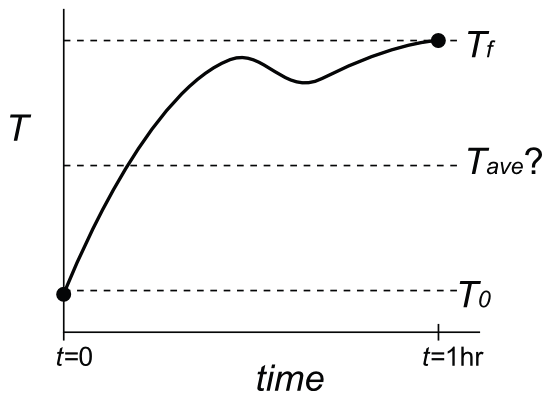

**Figure 4: Hypothetical situation where neither the final temperature, nor the average of initial and final temperatures gives an accurate representation of the temperature over the time step. This situation can be encountered in dynamic systems like CSP plants.**

To remedy this situation, System Advisor adjusts the total absorbed energy by subtracting the amount of energy that contributed to changing the energy state of the plant (i.e. the "transient energy"). The transient energy is calculated in Eq.[2.24].

$$\begin{array}{rcl}E_{trans}&=&\left(\overline{V}_{hdr,h}\;\rho_{hf,h}\;c_{ htf,h}+(mc)_{bal,h}\right)\;(T_{sys,h}-T_{sys,h,0})\\ &&+\left(\overline{V}_{hdr,c}\;\rho_{hf,c}\;c_{htf,c}\;c_{htf,c}+(mc)_{bal,c} \right)\;(T_{sys,c}-T_{sys,c,0})\\ &&+\sum_{i=1}^{N_{sca}}\left(A_{cs,i}\;L_{i}\;\rho_{htf,i}\;c_{htf,i}+L_{i}\;( mc)_{bal,sca,i}\right)\cdot(\overline{T}_{i}-\overline{T}_{i,0})\cdot N_{loops} \end{array} \tag{2.24}$$

Equation [2.24] consists of three parts; the first and second terms measure the energy that contributes to changing the "hot" and "cold" parts of the system, respectively (i.e. the header HTF volume and piping between the solar field and the power cycle), while the third term measures the energy contributing to changing the temperature of the HTF, piping, and insulation in the collector loops.

Included in the thermal inertia calculations are the hot and cold header volume plus supplemental runner pipe $\left(\overline{V}_{hdr}\right)$ and the user-specified thermal mass terms $(mc)_{bal,h}$ and $(mc)_{bal,c}$ described previously. The collector thermal inertia term represents the sum of HTF mass for all collectors in all loops, and is increased by the length-specific thermal inertia term $(mc)_{bal,sca,i}$ also discussed previously. The energy state is relative to the temperature from the previous time step - $\left(T_{sys,h,0}\right)$ for the hot header and $\left(T_{sys,c,0}\right)$ for the cold header.

The energy value calculated in Eq.[2.24] is subtracted from the total absorbed energy in the solar field to determine the total available energy from the solar field during the given time step. The mass flow rate is recalculated based on the energy available from the field.

$$\dot{m}_{A,sf}=\frac{\dot{q}_{A,sf}}{c_{htf,ave}\left(T_{sys,h}-T_{sf,in}\right)} \tag{2.25}$$

_Where:_

$$\dot{q}_{A,sf}=\dot{q}_{sf}-\frac{E_{trans}}{\Delta t}$$

The temperature $T_{sf,in}$ represents the inlet HTF temperature to the solar field and $T_{sys,h}$ is the return temperature to the power cycle calculated in Eq.[2.11]. The return temperature calculation presented in Eq. [2.11] uses the heat-loss adjusted loop outlet temperature rather than the temperature at the immediate outlet of the field loops. Thermal losses from the header and runner piping are accounted for as part of the loop outlet temperature by using the user-specified piping loss coefficient $\lambda_{hl}$ from the Parasities page and the total transport piping surface area $A_{pipe,tot}$ calculated by the model.

$$T_{loop,out}^{*}=T_{loop,out}-\frac{\lambda_{hl}\ A_{pipe,tot}\ \left(T_{loop,out}-T_{amb}\right)}{\dot{m}_{htf}\ c_{htf,ave}} \tag{2.26}$$

## 2.3 Collector Assembly and Field Optics

The collector model and optical calculations used in the physical trough model are based on the collector model in System Advisor's empirical trough model. System Advisor defines the collector as the portion of the solar field that reflects irradiation to the receiver. This equipment is distinct from the receiver component that consists of an evacuated glass envelope and tube receiver, as shown in Figure 5. The optical calculations for the collector model extend to the point of determining the magnitude of solar flux that is incident on the receiver.

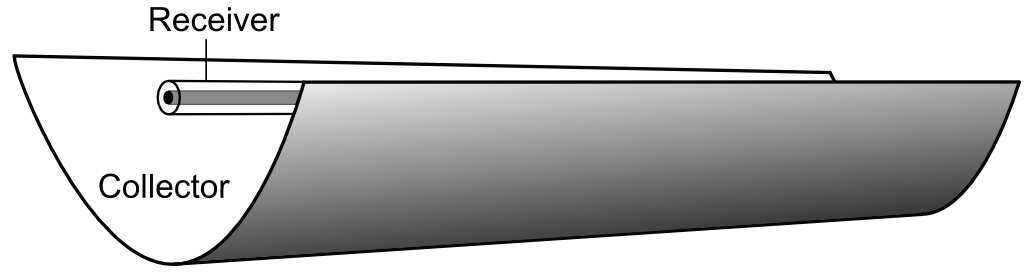

**Figure 5: The trough includes both a collector to reflect light and a receiver to absorb and transport heat.**

To determine the flux incident on the receiver, we must consider both constant optical losses and variable optical losses that change with solar position. The total irradiation on the field is a function of the equivalent aperture area of all of the collectors in the field, the strength of the solar insolation, and the angle at which the irradiation strikes the aperture plane. The equivalent aperture area refers to the total reflective area of the collectors that is projected on the plane of the collector aperture. This area is distinct from the curved reflective surface. Area that is lost due to gaps between mirror modules or non-reflective structural components is not included in the aperture area value. Thus, though the structure of the collector may occupy $100m$ lengthwise and $5m$ across the aperture, for example, the total reflective aperture area may be somewhat less than $100\times 5=500m^{2}$ after spaces, gaps, and structural area are accounted for.

When the solar irradiation is not normal to the plane of the collector aperture, losses are incurred that scale with the acuteness of incidence angle. The incidence angle $\theta$ is equal to the difference in angles between the normal to the aperture plane and the solar irradiation. This is depicted in Figure 6.

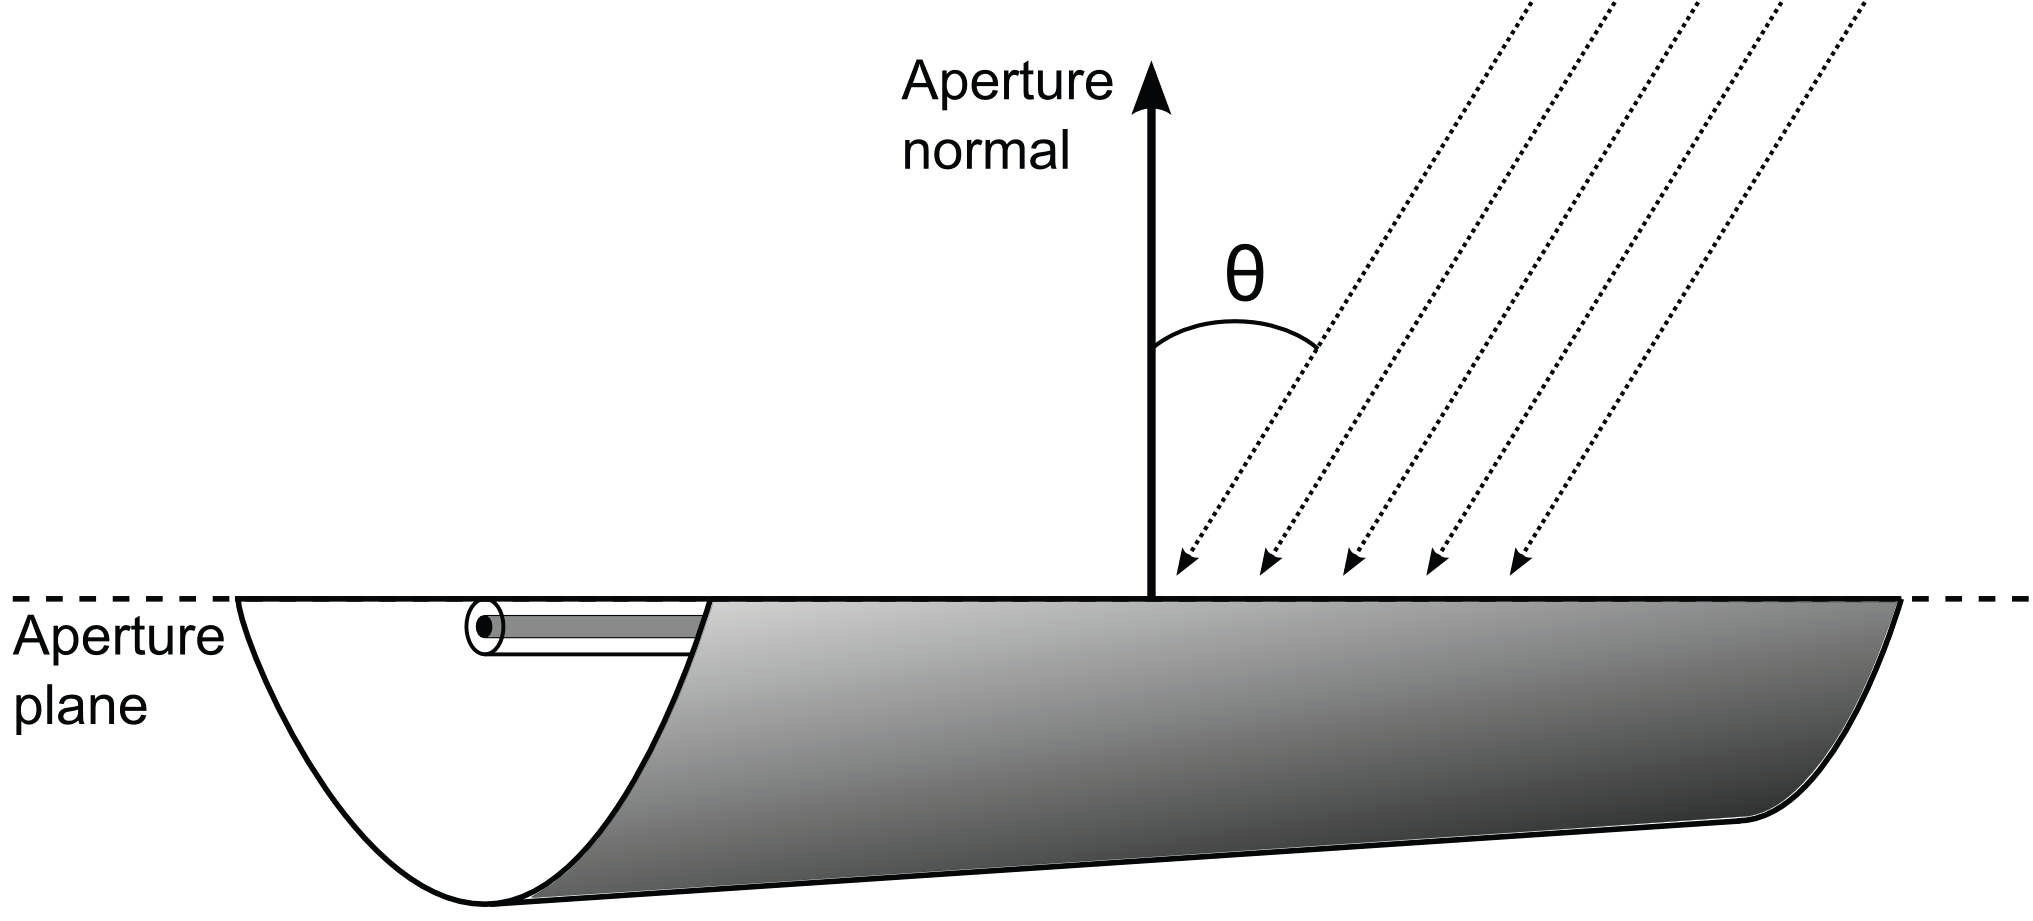

**Figure 6: The angle between the solar irradiation and the normal vector to the collector aperture plane.**

The incidence angle is a function of solar position and the collector tracking angle. To find the solar position for a particular plant at latitude $phi$ and longitude $psi$, we first calculate the solar time $t_{sol}$[5].

$$B = (day-1)\ \frac{360}{365}$$
$$EOT = 9.2\left (0.000075+0.001868\ \cos B - 0.032077\sin B - 0.014615\ \cos(2B)-0.04089\ \sin(2B)\right)$$
$$shift = zone\cdot 15-\psi$$
$$t_{sol} = hour+\frac{shift}{15}+\frac{EOT}{60} \tag{2.27}$$

_EOT_ is an equation of time that determines the deviation in local time from solar time as a function of the day of the year, \(shift\) represents the fixed time-shift in minutes due to the difference between the standard longitude for the time zone (_zone_, negative zones to the west and positive to the east of GMT+0) and the longitude at the location of interest. The day of the year _day_ and the hour of the day (_hour_, from 0 to 24) are also required. The time of day is converted into an hour angle ($\omega$) in Eq.[2.28].

$$\omega=(t_{sol}-12)\cdot 15^{\circ} \tag{2.28}$$

Since the solar position is impacted by the tilt of Earth's axis, the declination angle $\delta$ must also be determined.

$$\delta=23.45^{\circ}\cdot\sin\left(360\frac{(284+day)}{365}\right) \tag{2.29}$$

Finally, the solar azimuth ($\gamma_{sol}$) and the solar elevation ($\theta_{e}$) angles are calculated [5].

$$\theta_{e} = \sin^{-1}\left(\sin(\delta)\;\sin(\phi)+\cos(\phi)\;\cos(\delta)\; \cos(\omega)\right) \tag{2.30}$$
$$\theta_{z} = 90^{\circ}-\theta_{e}$$
$$\gamma_{sol} = sign(\omega)\left|\cos^{-1}\left(\frac{\cos(\theta_{z})\;\sin( \phi)-\sin(\delta)}{\sin(\theta_{z})\;\cos(\phi)}\right)\right| \tag{2.31}$$

The trough collector is capable of single-axis tracking about the lengthwise axis. This axis may be oriented in any compass direction, though it typically aligns in either the North-South or the East-West direction. The collector tracks the solar position in such a way that the angle between the aperture plane normal and the solar irradiation is minimized. The tracking angle $\omega_{col}$ is calculated in Eq.[2.32], where the collector orientation with an azimuth angle ($\gamma_{col}$) and a tilt angle ($\theta_{col}$) that is positive when the portion of the field closet to the equator is tilted up [19].

$$\omega_{col}=\tan^{-1}\left(\frac{\cos(\theta_{e})\;\sin(\gamma_{sol}-\gamma_ {col})}{\sin(\theta_{e}-\theta_{col})+\sin(\theta_{col})\;\cos(\theta_{e})\;(1 -\cos(\gamma_{sol}-\gamma_{col}))}\right) \tag{2.32}$$

All of the information needed to calculate $\theta$ has now been determined. Thus:

$$\theta=\cos^{-1}\sqrt{1-\left[\cos(\theta_{e}-\theta_{col})-\cos(\theta_{col}) \;\cos(\theta_{e})\;(1-\cos(\gamma_{sol}-\gamma_{col}))\right]^{2}} \tag{2.33}$$

The total radiation incident on the solar field is equal to the available beam-normal irradiation ($I_{bn}$) times the total aperture area, but is scaled by the cosine of $\theta$. Thus, this optical derate is referred to as "cosine loss" and it is the primary variable loss mechanism for the solar field.

Several other solar position losses are modeled, including spillage of reflected radiation off the end of the collector row, shadowing from one row to another, energy lost before deploying in the morning and after stowing in the evening while solar energy is still available, and an incident-angle modifier that accounts for all remaining position-dependent losses.

#### End spillage losses

During hours when incoming solar radiation is not directly normal to the collector aperture, some radiation is reflected off the end of the collector that doesn't reach the receiver. The end loss from each collector can be partially recovered by the adjacent collector, and this energy is calculated as the "end gain" in Eq. [2.35]. While all collectors incur some end loss, the collectors that benefit from end gain depend on the solar position as well as the position of the collector within the loop.

_For_ $i=1,N_{sca}$

$$\eta_{endLoss,i}=1-\frac{L_{f,ave,i}\ \tan(\theta)}{L_{i}}+\eta_{endGain,i} \tag{2.34}$$

_Where:_

$$\eta_{endGain,i}=\frac{L_{f,ave,i}\ \tan(\theta)-L_{sca,gap,i}}{L_{i}} \tag{2.35}$$

The $\eta_{endGain,i}$ term is equal to zero in the following circumstances:

1. The sun is in the southern sky6 and the collector in question is the southernmost of the collector row (e.g. $i=1$ or $i=N_{sca}$) Assuming a field in the northern hemisphere.
2. The sun is in the northern sky and the collector in question is the northernmost of the collector row (e.g. $i=\lfloor\frac{N_{sca}}{2}\rfloor$ or $i=\lfloor\frac{N_{sca}}{2}\rfloor+1$)

$L_{i}$ is the net total collector length, $L_{sca,gap,i}$ is the piping distance separating each SCA within a single row, and $L_{f,ave,i}$ is the average surface-to-focus path length from the System Advisor Collectors page. Note that the latter value is not the focal length of the parabola at the vertex, but instead is the total averaged value the light reflecting from the parabolic surface must travel to reach the focus for aperture-normal incidence. Often, only the focal length at the vertex is readily available, but the averaged value can be calculated using an integral approach, so long as the aperture width ($w$) is also known.

Beginning with the equation of a parabola $y=\frac{x^{2}}{4a}$ where $a$ is the focal length at the vertex, we can express the distance traveled from any point (x, y) on the parabola to the focus at (0,a). This arrangement is illustrated in Figure 7. Using the Pythagorean theorem with sides of length $x$ and $y-a$, the distance at point (x, y) is:

$$L_{f,(x,y)} = \sqrt{x^{2}+(y-a)^{2}}$$
$$= \sqrt{x^{2}+\left(\frac{x^{2}}{4a}-a\right)^{2}}$$

The average focal length is then the integral of $L_{f,(x,y)}$ with respect to $x$ over the aperture width $(-\frac{w}{2}\cdot+\frac{w}{2})$ and divided by the total aperture width.

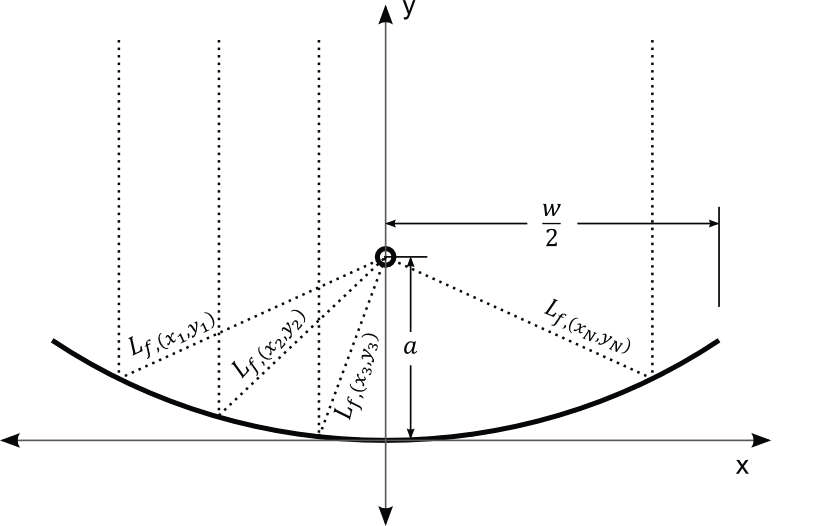

**Figure 7: Focal length geometry for calculating the average focal length.**

The shadowing effect is derived by considering the geometry of the two adjacent collector rows. Relating the two rows as shown in Figure 8, a right triangle is drawn with a hypotenuse equal to the centerline-to-centerline row spacing \(L_{spacing}\) and short side equal to the non-shadowed aperture width, $w_{a}$. To determine the fraction of active collector aperture, we first calculate the length of the non-shadowed aperture.

$$L_{f,ave} = \int_{-\frac{w}{2}}^{+\frac{w}{2}}\frac{\sqrt{x^{2}+\left(\frac{x^{ 2}}{4a}-a\right)^{2}}}{w}\,dx \tag{2.36}$$
$$= \sqrt{\frac{\left[4a^{2}+\left(\frac{w}{2}\right)^{2}\right]^{2}} {a^{2}}}\cdot\frac{12a^{2}+\left(\frac{w}{2}\right)^{2}}{12(4a^{2}+\left( \frac{w}{2}\right)^{2})}$$

Evaluation of the definite integral results in Eq.[2.36] above, and provides a simple expression for average focal length as a function of the focal distance and aperture width.

#### Row shadowing

Shadowing between rows generally occurs at extreme solar positions (i.e. dusk or dawn) when the shadow cast by a collector closer to the sun obscures a portion of an adjacent collector.

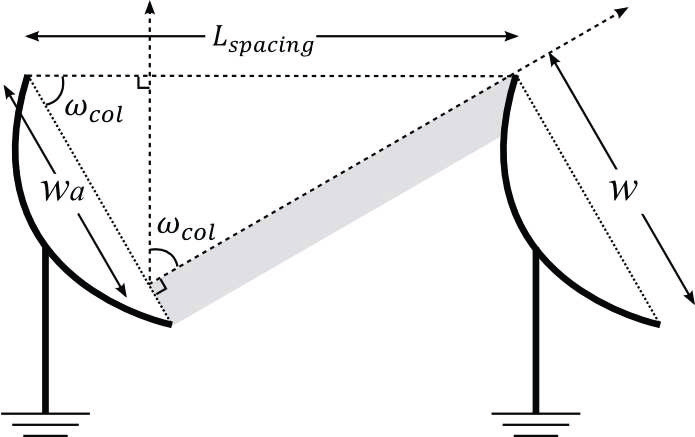

**Figure 8: Two adjacent collector rows may shadow each other if the tracking angle is sufficiently severe. The shadowing is subject to the collector aperture width, the row spacing (centerline to centerline), and the tracking angle of the collectors**

The shadowing effect is derived by considering the geometry of the two adjacent collector rows. Relating the two rows as shown in Figure 8, a right triangle is drawn with a hypotenuse equal to the centerline-to-centerline row spacing $L_{spacing}$ and short side equal to the non-shadowed aperture width, $w_{a}$. To determine the fraction of active collector aperture, we first calculate the length of the non-shadowed aperture.

$$w_{a}=\cos\left(\omega_{col}\right)\,L_{spacing} \tag{2.37}$$

The shadowing efficiency is equal to the ratio of the non-shadowed aperture to the total aperture width, $w$, as shown in Eq. [2.38]. The total shadowing efficiency is limited to the range of values between 0.5 and 1.0. If the shadowing efficiency is less than 0.5, the solar field is unlikely to operate successfully, so the total optical efficiency is set to zero and the simulation progresses to the next time step.

$$\eta_{shadow}=\frac{w_{a}}{w}=|\cos(\omega_{col})|\,\frac{L_{spacing}}{w} \tag{2.38}$$

### Stow and Deploy Angles

The user can enforce limits on when the solar field will track the sun. This is given in terms of the solar elevation angle, and can be specified for the deploy event and stow event separately.

Given a stow angle $\omega_{stow}$ and deploy angle $\omega_{deploy}$ that correspond to the solar elevation angle, the time of stow and deploy can be calculated using the same relationship.

$$t_{stow/deploy} = t_{noon}+\frac{sign(\tan(180^{\circ}-\omega))}{15}\cdot\cos^{-1} \left(\frac{c_{1}c_{2}+\sqrt{c_{1}^{2}-c_{2}^{2}+1}}{c_{1}^{2}+1}\right) \tag{2.39}$$
_where_
$$c_{1} = \frac{\cos(\phi)}{\tan(\omega)}$$
$$c_{2} = -\frac{\tan(\delta)\sin(\phi)}{\tan(\omega)}$$

For the stow or deploy time, $\omega=\omega_{stow}$ or $\omega=\omega_{deploy}$, respectively. Once the deploy and stow times have been calculated, the model calculates the fraction of the time step during with the system can operate.

_For the deploy hour:_

$$f_{track}=\frac{t_{\Delta t,end}-t_{deploy}}{\Delta t} \tag{2.40}$$

_For the stow hour:_

$$f_{track}=\frac{t_{\Delta t,start}-t_{stow}}{\Delta t} \tag{2.41}$$

The times at the beginning and end of the time step are given as $t_{\Delta t,start}$ and $t_{\Delta t,end}$, respectively. The fraction is limited by the model to fall between 0 and 1 during non-startup/shutdown time steps.

#### Incident Angle Modifier

The incident angle modifier $\eta_{IAM}$ is aerate factor that accounts for collector aperture foreshortening, glass envelope transmittance, selective surface absorption, and any other losses that are a function of solar position. The incident angle modifier factor is calculated using an empirical formula of the form in Eq. [2.42]. The default coefficients for this equation were derived from the field tests of the SEGS LS2 collectors [4]. Equation coefficients $a_{0}$, $a_{1}$, and $a_{2}$ are specified as inputs on the Collectors page.

$$\eta_{IAM}=a_{0}+a_{1}\frac{\theta}{\cos\theta}+a_{2}\frac{\theta^{2}}{\cos\theta} \tag{2.42}$$

($\theta$ in radians)

#### Constant optical derate factors

The trough collector model captures optical efficiency with losses that are a function of solar position and with fixed losses that are applied as constant multipliers. Fixed losses include tracking error, geometry defects, mirror reflectance, mirror soiling, and general error not captured by the other items. Because the model multiplies the loss factors together to calculate an overall loss factor, the value of each individual loss factor is not as important as the value of the product of all of the losses. Table 4 describes the physical effect each loss factor is intended to represent.

**Table 4: General definitions for each fixed optical loss term**

| Error Description |Term | Definition |
|---|---|---|
| Tracking error | $\eta_{track}$ | Inability of the collector to perfectly orient along the tracking angle; twisting of the collector about the lengthwise axis |
| Geometry defects | $\eta_{geo}$ | Poor alignment of the mirror modules; deviation in the position of the receiver tube from the optical focus; warping or discontinuities along the reflective surface |
| Mirror Reflectance | $\rho_{m}$ | Specular reflectance within a cone angle defined by the collector and receiver geometry |
| Mirror soiling | $\eta_{soil}$ | Dirt or soiling on the reflective surface that prevents irradiation from reflecting to the receiver |
| General Error | $\eta_{gen}$ | Any effect not captured within the previous categories |

The total optical efficiency is defined in Eq.[2.43], and we finally calculate the total radiative energy incident on the solar field in Eq.[2.44].

$$\eta_{opt}(\theta,\omega_{col})=\eta_{endLoss}(\theta)\;\eta_{shadow}(\omega_{ col})\;\eta_{IAM}(\theta)\;\eta_{track}\;\eta_{geo}\;\rho_{m}\;\eta_{soil}\;\eta_{gen} \tag{2.43}$$

$$\dot{q}_{inc,sf}=I_{bn}\;A_{ap,tot}\;\eta_{opt}(\theta,\omega_{col}) \tag{2.44}$$

The incident energy may be adjusted, depending on the stow and deploy times calculated above. For situations where the deploy or stow event occurs part way through a time step, the collector efficiency is reduced by the fraction of time step not in operation. For example, if the solar field deploys at 7:45am (solar time), the fraction of the time step spent tracking ($f_{track}$) is multiplied by the total collector optical efficiency. In this case, $f_{track}=1-45/60$, or $0.25$.

### 2.3.1 Determining an average efficiency value

System Advisor allows the user to assign multiple collector types and geometries within the same SCA loop (see the Solar Field page). Since each collector variation may have a unique optical efficiency, the reported collector efficiency in the simulation output is equal to the weighted average of all of the collectors used in the loop. System Advisor calculates the weighted optical efficiency by determining the total aperture area of the loop, then multiplying each collector's efficiency value by it's relative share of the loop aperture. Mathematically, this is represented in Eq.[2.45] for $i$ collector assemblies in the loop, each with unique area $A_{col,i}$ and efficiency $\eta_{col,i}$.

$$\eta_{col,ave}=\sum_{i=1}^{N_{sca}}\eta_{col,i}\cdot\frac{A_{col,i}}{A_{loop, tot}} \tag{2.45}$$

* The collector field model determines the incoming solar flux by considering weather data, plant location, solar position, anderate values that are both constants and functions of solar/collector position.
* Variable losses modeled are end spillage, row shadowing, stow and deploy events, and the incident angle modifier.
* Constant loss fractions account for tracking error, geometry defects, mirror reflectance, mirror soiling, and general error.

### _Receivers (HCE's)_

The receiver formulation used in the physical trough model uses a 1-dimensional model developed in [8]. Forristall's work uses the Engineering Equation Solver (EES) package [15] that is designed to evaluate complex systems of equations using an iterative approach. The system of equations describe the relationship between temperature and heat loss: The surface temperature of the absorber tube is a function of the heat absorption, while convective and radiative losses are strong functions of surface temperature. Convective loss is directly proportional to the difference between receiver surface and ambient temperatures, and radiation loss is proportional to temperature difference to the fourth power. The performance of the receiver can't be accurately modeled using simple explicit relationships. Instead, System Advisor uses implicit equations, solving iteratively with successive substitution until the solution converges.

The receiver is modeled as a 1-dimensional energy flow. Only the temperature gradient in the radial direction is assumed to be significant - axial and circumferential heat transfer are neglected. Figure 9 presents a diagram of one quarter of the receiver in cross-section. Each temperature $T_{1-5}$ is calculated by the model using an energy balance and temperature-dependent loss coefficients. The receiver geometry is specified by the user with radii $R_{1-4}$.

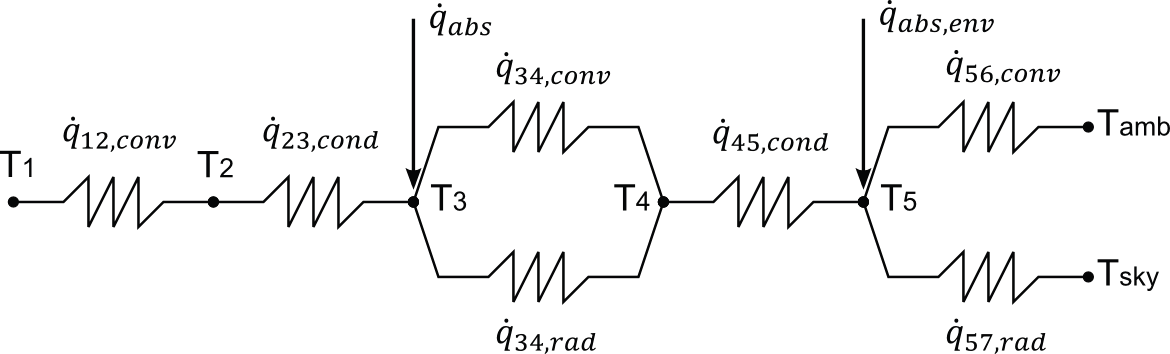

**Figure 9: A heat balance for the modeled receiver. Heat transfer in the radial direction (left to right) is considered, while circumferential and axial transfer is not.**

Concentrated irradiative flux from the collector passes through the transparent glass envelope ($R_{3-4}$), and a portion of that flux is absorbed by the glass. The absorbed flux is determined from the absorption fraction specified by the user as Envelope Absorptance ($\alpha_{em}$) on the Receivers page and influences the calculated temperature of the glass. The flux that passes through the glass envelope reaches the absorber tube at $R_{2}$. Note that the fraction of energy passing through the glass envelope is specified by the Envelope Transmittance value on the Receivers page, and need not equal the compliment of the absorptance value. This is because absorptance by the glass is only one of several possible loss mechanisms. Others include reflective loss and light refraction where incoming rays are bent away from the absorber.

During operation, the heated surface at $R_{2}$ drives thermal energy through the absorber wall ($R_{1-2}$) and into the cooler HTF. Thermal losses from the absorber surface occur via convection and radiation exchange with the glass envelope. The glass envelope is in turn exposed to ambient air. Figure 10 shows the heat transfer network, conceptualized as a set of thermal resistances in series and parallel. This is analogous to an electrical resistance network where thermal energy represents current, thermal resistance represents electrical resistance, and temperature drop is equivalent to voltage drop. Incidentally, the same resistance formulae apply to thermal and electrical networks.

#### 2.4.1 Modeling approach

The nodal nature of the collector loop was discussed in Section 2.1 (see Figure 2 on page 2). To summarize, each node corresponds to an assembly of individual receiver elements and collector modules. As HTF passes through the loop, it gradually warms until it reaches the design-point field outlet temperature at the end of the last SCA. The gradual warming of HTF over the length of the loop corresponds to a trend of decreasing thermal efficiency, since receiver performance is inversely related to receiver temperature. Variability in receiver performance within a loop can be significant, so the receiver model is applied individually for each node in the loop. This system is solved iteratively to determine the mass flow rate that is required to meet the design outlet temperature, as discussed in Section 2.2.

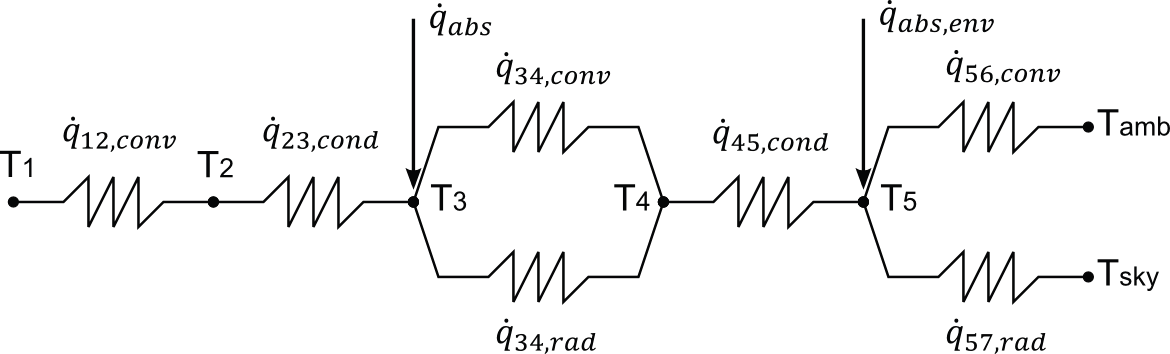

**Figure 10: The thermal resistance network for the “intact” receiver model shown in Figure 9. Energy is absorbed at $T_{3}$ and $T_{4-5}$.**

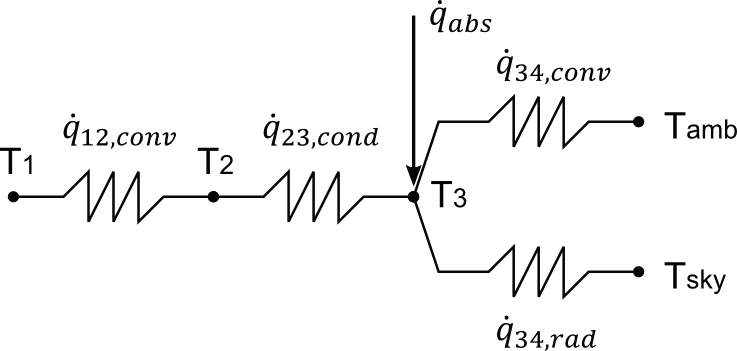

**Figure 11: The thermal resistance network for the “broken glass” receiver model. Energy is absorbed on the absorber tube surface at $T_{3}$ and heat is exchanged directly with the sky and ambient temperatures.**

The receiver model uses information about the HTF temperature, receiver geometry, ambient conditions, and incoming solar flux to determine the performance of the receiver. Conceptually, the solar field can be dissected into four different models:

1. the collector model
2. the receiver model
3. the piping model, and
4. the HTF model.

This distinction is particularly noteworthy for the receiver and HTF models. The HTF model calculates the HTF temperature throughout the loop based on absorbed energy and mass flow rate. The receiver model calculates the thermal performance of the receiver given an HTF temperature and other information. Thus, from the perspective of the receiver model, the HTF temperature ($T_{1}$) is an input value even though $T_{1}$ is closely tied to the results calculated by the receiver model. Other specified values for the model are summarized in Table 5.

**Table5: Inputs to the receiver model**

| **Item**         | **Description**                            |
|------------------|--------------------------------------------|
| $T_{1}$        | HTF inlet temperature                      |
| $\dot{m}_{inf}$| HTF mass flow rate                         |
| $T_{amb}$      | Ambient temperature                        |
| $T_{sky}$      | Effective sky temperature                  |
| $v_{wind}$     | Wind velocity at the receiver surface      |
| $p_{amb}$      | Ambient pressure                           |
| $\dot{q}_{inc,i}$ | Incident radiation at node $i$        |
| $A_{cs}$       | Cross-sectional area of the absorber tube  |
| $D_{2}$        | Absorber tube internal diameter             |
| $D_{3}$        | Absorber tube external diameter             |
| $D_{4}$        | Glass envelope internal diameter            |
| $D_{5}$        | Glass envelope external diameter            |
| $D_{p}$        | Internal flow plug diameter                 |
| $\epsilon_{3}$ | Absorber surface emittance                 |
| $\epsilon_{4}$ | Glass surface emittance                    |
| $\alpha_{abs}$ | Absorber surface absorptance                |
| $\alpha_{env}$ | Glass envelope absorptance                  |
| $\eta_{col,i}$ | Collector optical efficiency at node $i$  |
| $\tau_{env}$   | Glass envelope transmittance                |
| $P_{a}$        | Annulus pressure                           |
| -                | Annulus gas type                           |
| -                | HTF type                                   |
| -                | Absorber material                          |


For any solver using successive substitution, initial guess values must also be provided. The guess values for the receiver model are initially calculated based on the HTF temperature provided to the model, and depend on the condition of the receiver envelope. Temperature guesses for the absorber tube and glass envelope must be provided. Eq.[2.46] shows the initial settings for the temperatures for intact receivers, and Eq.[2.47] shows the settings for receivers with broken glass.

$$T_{2} = T_{1}+2^{\circ}C$$
$$T_{3} = T_{2}+5^{\circ}C \tag{2.46}$$
$$T_{4} = T_{3}-0.8\cdot(T_{3}-T_{amb})$$
$$T_{5} = T_{4}-2^{\circ}C$$
$$T_{2} = T_{1}+2^{\circ}C$$
$$T_{3} = T_{2}+5^{\circ}C \tag{2.47}$$
$$T_{5} = T_{4}=T_{amb}$$

Once guess values have been calculated, subsequent calls to the subroutine use the converged values from the previous call as the new guess values. However, several conditions may trigger recalculation of the guess values using Eq.'s[2.46] and [2.47]:

* The difference between the last $T_{1}$ and the current $T_{1}$ is greater than $50^{\circ}C$
* The minimum value in the group $T_{1-5}$ is less than the current $T_{sky}$ value
* Any temperature from the last call returned as invalid (Not a Number error)

### 2.4.2 Model formulation

The first step in determining receiver heat loss is to calculate the thermal resistance between the outer absorber tube and the inner glass envelope surfaces. Both convection and radiation contribute to the total heat transfer, though convection between the two surfaces is very small for intact receivers. Convection becomes significant in cases where the vacuum is lost due to broken glass or where hydrogen from the HTF has diffused through the absorber tube wall into the annulus.

#### Convection from the absorber

Convection may occur either between the absorber and the inner glass surface or directly to the ambient air in the case that the envelope is broken. The convection subroutine handles both situations. First, for **intact receivers**, the annulus gas properties are evaluated at the average temperature $T_{34}$. Convection from $R_{3}$ to $R_{4}$ can be generally expressed in terms of thermal resistance $\hat{R}_{34,conv}$ as7:

$$\dot{q}_{34,conv}=\frac{T_{3}-T_{4}}{\hat{R}_{34,conv}} \tag{2.48}$$

_Where:_

$$\hat{R}_{34,conv}=\frac{1}{\gamma_{34,conv}\,\pi\,D_{3}}$$

$$\hat{R}_{34,conv}=\frac{1}{\gamma_{34,conv}\,\pi\,D_{3}}$$

The receiver model calculates natural internal convection using the modified Raithby and Hollands correlation [2] (for more information on the convective algorithms, see [8] pages 11-14). The calculation for annular natural convection begins with determining the Rayleigh number at diameter $D_{3}$ using Eq.[2.49].

$$Ra_{D3}=\frac{g\,\beta_{34}\,|T_{3}-T_{4}|\,D_{3}^{3}}{\alpha_{34}\,\,\nu_{34}} \tag{2.49}$$

The volumetric expansion coefficient $\beta_{34}$, the thermal diffusivity constant $\alpha_{34}$, and the kinematic viscosity $\nu_{34}$ of the annular gas are all evaluated at the averaged temperature $T_{34}$.

Using Prandtl number $Pr_{34}=\nu_{34}/\alpha_{34}$, we calculate the heat transfer due to natural convection in the annulus and the associated heat transfer coefficient.

$$\dot{q}_{34,conv} = 2.425\;k_{34}\;\frac{T_{3}-T_{4}}{\left(1+\frac{D_{3}}{D_{4}}^{0.6 }\right)^{1.25}}\;\left(\frac{Pr_{34}Ra_{D3}}{0.861+Pr_{34}}\right)^{0.25} \tag{2.50}$$
$$\gamma_{34,conv} = \frac{\dot{q}_{34,conv}}{\pi\,D_{3}\;(T_{3}-T_{4})} \tag{2.51}$$

For very low annular pressures, the molecular density drops below the physical limit for establishing convective currents; instead, free molecular heat transfer relationships more appropriately describe convective heat loss. The receiver model handles this by using the largest convective loss predicted by either annular natural convection or free molecular heat transfer. Eq.[2.52] shows the steps for calculating free molecular heat transfer.

$$\Lambda = C_{1}\times 10^{-20}\cdot\frac{T_{34}}{P_{a}\cdot\zeta^{2}}$$
$$\Gamma = \frac{c_{p,34}}{c_{v,34}}$$
$$b = \frac{9\Gamma-5}{2\Gamma+2}$$
$$\gamma_{34,conv} = \frac{k_{34}}{\frac{D_{3}}{2}\log\left(\frac{D_{4}}{D_{3}} \right)+\frac{b\,\Lambda}{100}\;\left(\frac{D_{3}}{D_{4}}+1\right)} \tag{2.52}$$
$$\dot{q}_{34,conv} = \pi\,D_{3}\;\gamma_{34,conv}\;(T_{3}-T_{4})$$

In the calculation for $\Lambda$, $C_{1}$ is a constant $2.331\times 10^{-20\,\frac{mmHg\cdot cm^{3}}{K}}$, $\zeta$ is the free-molecular collision distance shown in Table 6[8], and $P_{a}$ is the annulus pressure in $torr$.

**Table 6: Values of the mean free path between collisions of a molecule for free molecular convection**
| **Annulus Gas** | $\zeta$ **[cm]**  |
|-----------------|---------------------|
| _Air_           | $3.53 \times 10^{-8}$ |
| _Hydrogen_      | $2.4 \times 10^{-8}$  |
| _Argon_         | $3.8 \times 10^{-8}$  |


The annular convection calculations assume that the receiver's glass envelope is intact.

However, the glass envelope sometimes breaks due to impact or excessive thermal cycling. Thermal loss from a **broken-glass receiver** is significantly higher than for an intact receiver, and the loss must be modeled differently. System Advisor provides specialized calculations for broken-glass receivers and further divides the heat transfer relationships applied based on ambient wind speed.

If the ambient wind speed is very low (less than $0.1 \frac{m}{s}$), then the Nusselt number is calculated using the Churchill & Chu correlation for a long isothermal horizontal cylinder [13], where the fluid properties are determined at the averaged temperature $T_{36}$.

$$\overline{Nu}=\left[\frac{0.60+0.387\cdot Ra_{D3}^{0.1667}}{\left(1+\left(\frac {0.559}{Pr_{36}}\right)^{0.5625}\right)^{0.2963}}\right]^{2} \tag{2.53}$$

The convection coefficient calculated in Eq.[2.54] is then used to determine the total convective heat transfer.

$$\gamma_{34,conv} = \overline{Nu}\,\frac{k_{36}}{D_{3}} \tag{2.54}$$
$$\dot{q}_{34,conv} = \gamma_{34,conv}\,\pi\,D_{3}\,\left(T_{3}-T_{6}\right)$$

If the ambient wind speed is above $0.1 \frac{m}{s}$, thermal properties are required for both the air in contact with the absorber surface at $T_{3}$ and the ambient air at $T_{6}$. In this case, the Nusselt number is calculated using Zhukauskas' correlation for external forced convection [13].

$$\overline{Nu}=C\,\,Re_{D3}^{m}\,\,Pr_{6}^{n}\,\,\left(\frac{Pr_{6}}{Pr_{3}} \right)^{0.25} \tag{2.55}$$

_Where:_

$$Re_{D3}=\frac{v_{6}\,D_{3}}{v_{6}}$$

The coefficients $m$, $n$, and $C$ are selected according to the Prandtl number and the Reynolds number as shown in Table 7. For $Pr\leq 10$, $n=0.37$, otherwise $n=0.36$.

|  **Reynolds Number Range** | **C** | **m** |
|---|---|---|
| $0 \leq Re_{D3} < 40$ | 0.75 | 0.4  |
| $40\leq Re_{D3} < 1000$ | 0.51 | 0.5  |
| $1000 \leq Re_{D3} <2\times 10^{5}$ | 0.26 | 0.6  |
| $2 \times 10^{5} \leq Re_{D3} < 10^{6}$ | 0.076 | 0.7 |

**Table 7: Selection of coefficients $C$ and $m$ for Zhukauskas’ correlation based on the Reynolds number at $D_{3}$.**

To summarize the absorber convection calculations:

1. Convection loss is determined based on the condition of the receiver (whether the glass envelope is intact or broken).
2. If the glass is intact, the natural convection coefficient and the molecular diffusion convection coefficient are both calculated and compared, with the larger of the two selected for use in the loss equation.
3. If the envelope is not intact, direct convection to ambient is calculated based on whether the wind speed is below or above $0.1 \frac{m}{s}$.

No matter the method used to calculate the convective loss coefficient from the absorber, the thermal resistance due to convection is expressed as follows.

$$\hat{R}_{34,conv}=\frac{1}{\gamma_{34,conv}\,\pi\,D_{3}} \tag{2.56}$$

#### Radiation from the absorber

Radiation loss from the absorber tube to the surroundings is the most significant contributor to heat loss for intact collectors. Two alternate equations are used for calculating radiative loss depending on whether the glass envelope is intact. For **intact receivers**, radiative exchange is between the absorber surface at $D_{3}$ and the inner envelope surface at $D_{4}$, as shown in Eq.[2.57].

$$\gamma_{34,rad} = \sigma(T_{3}^{2}+T_{4}^{2})\,\,\frac{T_{3}+T_{4}}{\frac{1}{ \varepsilon_{3}}+\frac{D_{3}}{D_{4}}\left(\frac{1}{\varepsilon_{4}}-1\right)} \tag{2.57}$$
$$\dot{q}_{34,rad} = \pi\,D_{3}\,\gamma_{34,rad}\,\,(T_{3}-T_{4})$$

If the receiver **envelope is broken**, radiation exchange occurs directly between the absorber surface and the ambient surroundings at temperature $T_{sky}$.

$$\dot{q}_{34,rad}=\sigma\,\gamma_{34,rad}\,\epsilon_{3}\,\,\pi\,D_{3}\,\,(T_{3} ^{4}-T_{sky}^{4}) \tag{2.58}$$

_Where:_

$$\gamma_{34,rad}=\frac{\dot{q}_{34,rad}}{\pi\,D_{3}\,\,(T_{3}-T_{7})}$$

The radiation thermal resistance $\hat{R}_{34,conv}$ is calculated with the same arrangement used in Eq.[2.56] above. The total thermal resistance between the absorber surface and the glass envelope is expressed as two parallel thermal resistances and applies only for intact receivers.

$$\hat{R}_{34,tot}=\left(\frac{1}{\hat{R}_{34,conv}}+\frac{1}{\hat{R}_{34,rad}} \right)^{-1} \tag{2.59}$$

#### Conduction across the glass envelope

Conduction across the intact glass envelope is modeled using the formula for radial resistance in a cylinder [17], assuming the thermal conductance $k_{45}=1.04\frac{W}{m-K}$.

$$\hat{R}_{45,cond}=\frac{\log\left(\frac{D_{5}}{D_{4}}\right)}{2\pi k_{45}} \tag{2.60}$$

#### Convection and radiation loss from the envelope

Like convection from the absorber to ambient air in the case of broken glass receivers, convection loss from the glass envelope occurs between a cylindrical object and free-stream air. Thus, the equations developed for convective loss from broken receivers can be reused here. For wind speeds of less than $0.1 \frac{m}{s}$, the Churchill and Chu correlation in

Eqs.[2.53-2.54] is used, otherwise Eq.[2.55] is used. Air properties are evaluated at $T_{5}$ and $T_{6}$ rather than at $T_{3}$ and $T_{6}$.

Radiative loss is calculated using Eq.[2.58], substituting $T_{5}$ for $T_{3}$. The corresponding thermal resistances are:

$$\hat{R}_{56,conv} = \frac{1}{\gamma_{56,conv}\,\pi\,D_{5}} \tag{2.61}$$
$$\hat{R}_{57,rad} = \frac{1}{\gamma_{57,rad}\,\pi\,D_{5}} \tag{2.62}$$

### Heat flows and temperatures

Thermal energy is absorbed into the resistance network at two locations, as illustrated in Figure 10 above. The absorber tube receives most of the thermal energy incident on the receiver at $D_{3}$, but a small portion of the incoming energy is also absorbed in the glass envelope at $D_{5}$.

The energy absorbed by absorber tube $i$ is a function of the energy concentrated by the $\dot{q}_{inc,i}$, the envelope transmittance $\tau_{env}$, and the absorber surface absorptance $\alpha_{abs}$.

$$\dot{q}_{abs,i}=\dot{q}_{inc,i}\,\eta_{opt,i}\,\tau_{env}\,\alpha_{abs} \tag{2.63}$$

The energy absorbed by the envelope is:

$$\dot{q}_{abs,env,i}=\dot{q}_{inc,i}\,\eta_{opt,i}\,\alpha_{env} \tag{2.64}$$

We estimate the heat transfer from the absorber surface to the inner envelope surface using the temperature guess values in Eq.[2.46] for $T_{3}$ and $T_{4}$. This heat flow ($\dot{q}_{34,tot}$) is increased by the energy absorbed within the envelope. For simplicity, the energy is assumed to be absorbed just after the inner envelope wall between $D_{4}$ and $D_{5}$ so that the thermal energy must travel the entire distance between the envelope walls. Thus, the thermal energy conducted across thewall is expressed as:

$$\dot{q}_{45,cond}=\dot{q}_{34,tot}+\dot{q}_{abs,env} \tag{2.65}$$

The outer envelope surface temperature is then the inner surface temperature minus the heat flow conducted scaled by the thermal resistance.

$$T_{5}=T_{4}-\dot{q}_{45,cond}\ \hat{R}_{45,cond} \tag{2.66}$$

Thermal losses from the envelope to ambient are now redetermined for this iteration with the newly recalculated glass envelope outer surface temperature $T_{5}$.

$$\dot{q}_{56,com} = \frac{T_{5}-T_{amb}}{\hat{R}_{56,com}} \tag{2.67}$$
$$\dot{q}_{57,rad} = \frac{T_{5}-T_{sky}}{\hat{R}_{57,rad}}$$

This fully defines the thermal resistance network from the outer absorber surface to the surroundings. If we consider the temperature profile of an intact receiver during operation, the figurative "top of the temperature hill" is located at the boundary between the absorber surface and the inner annulus ($D_{3}$). Heat always flows "downhill"; assuming we know the temperature at $D_{3}$, we can now recalculate the magnitude of the heat flow from the absorber to ambient. This quantity defines the receiver heat loss. This can be done analytically by expressing the total heat loss in terms of the equivalent thermal resistance between $D_{3}$ and ambient, and the total temperature difference between $T_{3}$ and the ambient temperatures $T_{amb}$ and $T_{sky}$. The heat conducted across the glass envelope is equal to the heat flow across the annulus ($\dot{q}_{34,tot}$) plus the heat absorbed directly by the envelope. This total heat flow is then radiated/convected to ambient, though the practical receiver heat loss is only equal to the heat transferred away from the absorber tube across the annulus, and the envelope energy absorption is accounted for an an optical loss. Thus:

$$\dot{q}_{hl}=\dot{q}_{34,tot}=\dot{q}_{45,cond}=\left(\dot{q}_{56,conv}+\dot{q }_{57,rad}-\dot{q}_{abs,env}\right)=\frac{\Delta T_{hl}}{\hat{R}_{3,amb}} \tag{2.68}$$

A practical implementation of this equation is easily derived by applying resistance network rules to the section of Figure 10 between $T_{3}$ and the ambient temperatures. Eq.[2.68] is then equivalently:

$$\dot{q}_{hl}=\frac{(T_{3}-T_{amb})\ \hat{R}_{57,rad}+(T_{3}-T_{sky})\ \hat{R}_{56,com}-\dot{q}_{abs,env}\ \Omega_{\hat{R}}}{\hat{R}_{34,tot}\ \hat{R}_{57,rad}+\hat{R}_{34,tot}\ \hat{R}_{56,com}+\Omega_{\hat{R}}} \tag{2.69}$$

_Where:_

$$\Omega_{\hat{R}}=\hat{R}_{56,conv}\ \hat{R}_{57,rad}+\hat{R}_{45,cond}\ \hat{R}_{57,rad}+\hat{R}_{45,cond}\ \hat{R}_{56,conv}$$

This equation is somewhat simplified as the envelope resistances drop out in the case that the receiver glass is removed and the absorber surface is in direct thermal communication with the ambient.

$$\dot{q}_{hl}=(T_{3}-T_{6})\ \hat{R}_{34,conv}+(T_{3}-T_{7})\ \hat{R}_{34,rad} \tag{2.70}$$

Having considered convective and radiative losses from the receiver for both intact and broken receivers, one remaining heat loss mechanism must be accounted for. This is conductive loss from the support brackets in contact with the receiver ends. Radiation and convection heat losses tend to overwhelm bracket conduction heat loss, so the System Advisor interface excludes inputs related to this loss. System Advisor hard-codes the required inputs for this calculation to reduce the number of user input variables. Table [8] enumerates the bracket geometry and material properties assumed by System Advisor.

**Table 8: Bracket geometry and material properties assumed by System Advisor for conductive heat loss calculations**

| **Item**                                   | **Assumed Value** | **Units**        |
|--------------------------------------------|-------------------|------------------|
| Effective bracket perimeter                | 20.32             | cm               |
| Effective bracket diameter                 | 5.08              | cm               |
| Minimum bracket cross sectional area       | $1.6129 \times 10^{-4}$ | $m^{2}$  |
| Conduction coefficient (carbon steel, 600K)| 48.0              | $\frac{W}{m-K}$|
| Effective bracket base temperature         | $T_{3}-10$      | ${}^{\circ}C$  |
| Single receiver length                     | 4.06              | m                |


Bracket heat loss is estimated by assuming that the bracket convects heat to the surroundings at a driving temperature difference of $T_{brac}-T_{amb}$, where the average bracket temperature $T_{brac}$ is defined as:

$$T_{brac}=\frac{1}{2}\left[\frac{T_{base}+T_{amb}}{2}+T_{amb}\right] \tag{2.71}$$

The base temperature $T_{base}$ is the effective bracket base temperature from Table 8. Like convection from the outer glass envelope, convection from the bracket is subdivided into still-air convection (velocity less than 0.1 m/s) and forced convection. The Nusselt number for natural convection is given in Eq.[2.53] as shown above, except using Rayleigh and Prandtl numbers corresponding to the average bracket temperature. The convective heat loss coefficient is then scaled by the effective bracket diameter.

$$\gamma_{brac}=\overline{Nu_{brac}}\ \frac{k_{brac}}{D_{brac}} \tag{2.72}$$

Forced convection from the bracket is calculated analogously to the procedure described in Eq.[2.55] and Table 7, but using bracket temperatures. The bracket convective heat loss calculation uses either the coefficient for forced convection or for natural convection, depending on the ambient wind speed. This coefficient $\gamma_{brac}$ is used to calculate the heat loss as shown in Eq.[2.73] for a given bracket perimeter $per_{brac}$, cross-sectional area $A_{brac,cs}$, and single receiver length $L_{rec}$.

$$\dot{q}_{brac}=\sqrt{\gamma_{brac}\;per_{brac}\;k_{brac}\;A_{brac,cs}}\;\left( \frac{T_{base}-T_{6}}{L_{rec}}\right) \tag{2.73}$$

The total heat loss from the receiver is the sum of convection, radiation, and bracket conduction losses. The energy flow into the HTF $\dot{q}_{12,conv}$ is then equal to the energy absorbed by the absorber tube minus the heat loss from the receiver. The heat loss value is reduced by the amount of heat absorbed in the glass envelope that also must be rejected; this avoids double-counting the heat loss from the absorber tube.

$$\dot{q}_{12,conv}=\dot{q}_{23,cond}=\dot{q}_{abs}-\dot{q}_{hl} \tag{2.74}$$

Using the calculated value for heat flow into the HTF and the guessed average HTF temperature $T_{1}$, we calculate the temperature drop from the inner absorber tube surface to the HTF due to the internal convective resistance. The convection correlations require fluid properties evaluated at the inner wall temperature and the bulk HTF temperature, and are divided into several cases: for HTF flow velocities greater than 0.1 m/s, the Nusselt number is calculated for either annular or round-pipe flow, and for higher velocities the Nusselt number is determined using a modified Gnielinski correlation [11]. For low velocities with annular flow:

$$\overline{Nu}_{12} = 41.402\;D_{R}^{5}-109.702\;D_{R}^{4}+104.570\;D_{R}^{3}-42.979\;D _{R}^{2} \tag{2.75}$$
$$+\;7.686\;D_{R}+4.411$$

_Where:_

$$D_{R}=\frac{D_{P}}{D_{2}}$$

and for low velocities with normal pipe flow, the Nusselt number is fixed where $\overline{Nu}_{12}=4.36$.

The inner wall temperature for low-flow conditions is then:

$$T_{2}=T_{1}+\frac{\dot{q}_{12,conv}\;D_{hyd}}{\pi\,D_{2}\;k_{1}\;\overline{Nu }_{12}} \tag{2.76}$$

Any significant HTF velocity drives the Nusselt number sufficiently high that the inner wall temperature approaches the bulk HTF temperature. This will be the case for most situations where a minimum flow is enforced in the field during off-sun conditions.

The final step in solving the receiver model is to recalculate the absorber tube outer surface temperature, $T_{3}$. Recall that this value was initially guessed, but now enough information is available to calculate this temperature and update the guess for iteration. $T_{3}$ is found this time as a function of the inner wall temperature $T_{2}$ and the heat flow by conduction across the tube wall.

$$T_{3}=T_{2}+\frac{\dot{q}_{23,cond}}{2\;\pi\;k_{23}}\;\log\frac{D_{3}}{D_{2}} \tag{2.77}$$

The calculation process beginning with Eq.[2.65] and ending with Eq.[2.77] is repeated iteratively until convergence is achieved in temperatures $T_{3}$ and $T_{4}$ with respect to their previous iteration guess values $T_{3g}$ and $T_{4g}$. Convergence is obtained when the error calculated in Eq.[2.78] falls below a tolerance of 0.05 or when the number of iterations exceeds 4.8

$$err=\sqrt{\left(\frac{T_{4g}-T_{4}}{T_{4}}\right)^{2}+\left(\frac{T_{3g}-T_{3} }{T_{3}}\right)^{2}} \tag{2.78}$$

### _Piping model_

The largest _parasitic_ loss for a trough plant is the electricity consumed by the solar field HTF pumps. Since pumping power scales proportionally with the HTF pressure drop across the solar field and with the HTF mass flow rate, accurately capturing both of these values is important in characterizing the total plant performance. System Advisor takes a moderately detailed approach in the design and performance modeling of the solar field piping. The piping model in System Advisor is derived directly from work presented in [14].

The piping model in System Advisor accounts for the pressure drop associated with a variety of field components, including:* "Runner" piping from the power block to and from the solar field headers
* Hot and cold headers
* Receiver tube piping
* Pipe expansions and contractions
* Elbows (long, medium, standard)
* Valves (gate, globe, check, and control)
* Ball joint assemblies

The piping model keeps track of the total fluid volume and surface area of the piping, excepting the surface area of the internal receiver tubing. The model does not account for varying insulation thickness, but instead applies an area- and temperature-specific heat loss coefficient to determine the total thermal energy loss from piping.

#### 2.5.1 Piping diameter selection

Full inventory of the field geometry requires a long list of inputs; specifying information on the positions, quantities, and pressure drops for all possible runner and header piping, expansions and contractions, elbows, valves, and ball joints would quickly overwhelm both the System Advisor interface and the person using the model. To avoid this, System Advisor makes a number of simplifying assumptions about the placement and quantity of piping components. The user-specified information includes the number of subfield sections, the piping thermal loss coefficient, thermal inertia terms $(mc)_{bal,h}$, $(mc)_{bal,c}$, and $(mc)_{bal,sca}$, and the min/max HTF velocities in the header at design. All other information is assumed or calculated by the model.

The header pipes are used to distribute cold HTF from the power cycle to each of the individual loop inlets and then collect the hot HTF from each loop and return it for use in the power cycle or storage. Optimal header design accounts for the mass of HTF flowing through the header becoming successively smaller as it moves farther away from the power cycle. Flow through each loop must be balanced throughout the field to maintain constant hot outlet temperatures. Part of the balancing effort requires that the header diameter match the mass of HTF flowing through it such that the flow velocity is relatively constant. System Advisor calculates the header diameter for each loop section to ensure that the minimum and maximum flow velocities provided by the user are maintained at the design condition. Figure 12 illustrates how the mass flow and header diameter decrease as flow is distributed to the field loops.

System Advisor handles the header sizing calculations by restricting the HTF velocity at design to the range specified by the user on the Solar Field page. This requires an estimate of the HTF mass flow rate in the solar field at design, as expressed in Eq.[2.79].

$$\dot{m}_{sf,des}=\frac{(A_{loop}\,I_{bn}-\dot{q}_{hl,loop})\,N_{loops}\cdot \eta_{opt,des}}{c_{htf,ave}\,(T_{sf,out,des}-T_{sf,in,des})} \tag{2.79}$$

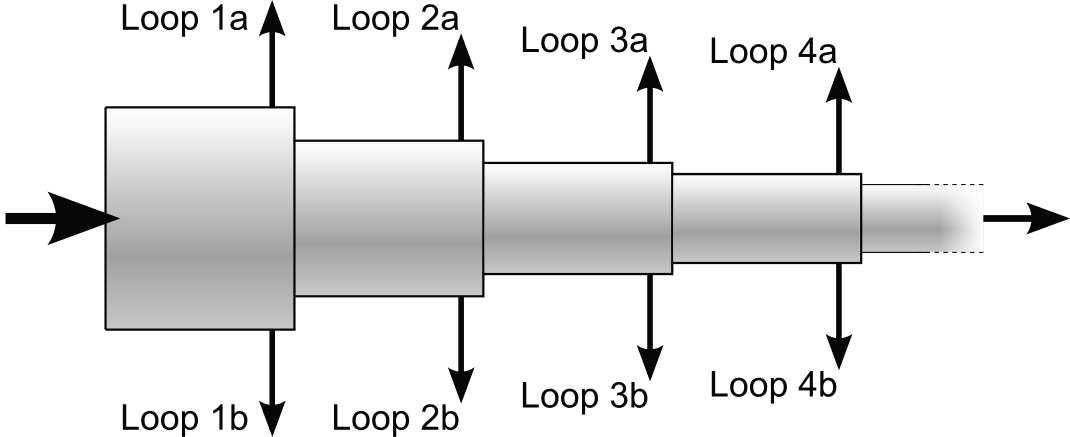

**Figure 12: An illustration of the flow diverting from the header into individual field loops. In this example, two loops extract HTF per section. The diameter of the header is adjusted to maintain optimal flow velocities.**

The optical efficiency at design ($\eta_{opt,des}$) is calculated using the solar position at noon on the summer solstice according to the collector model presented in Section 2.3. The loop aperture area $A_{loop}$ is equal to the sum of the aperture of each collector assembly in the loop, as defined on the Collectors page.

$$A_{loop}=\sum_{i=1}^{N_{sca}}A_{col,i} \tag{2.80}$$

The estimated heat loss is the weighted sum of the heat loss estimate values for each SCA in the loop. Heat loss from each SCA is weighted according to the ratio of the SCA receiver length to the total loop receiver length.

$$\dot{q}_{hl,loop}=\sum_{i=1}^{N_{sca}}\dot{q}_{hl,des,i}\ \frac{L_{i}}{L_{loop,tot}} \tag{2.81}$$

The design-point HTF mass flow through each individual header is determined using the total solar field mass flow rate from Eq.[2.79]. The number of field subsections is specified by the user. Each field section is assumed to have two symmetric subsections; consequently, the user can select any even number of subfield sections on the Solar Field page in System Advisor. The number of field sections ($N_{fsec}$) determines the overall header piping layout. The first three possible selections are illustrated in Figure 13.

System Advisor determines the number of loop extraction points per header by dividing the total number of loops by two times the number of field sections (two loops extract at a single point, per Figure 12).

$$N_{hsec}=\left[\frac{N_{loops}}{2\cdot N_{fsec}}\right] \tag{2.82}$$

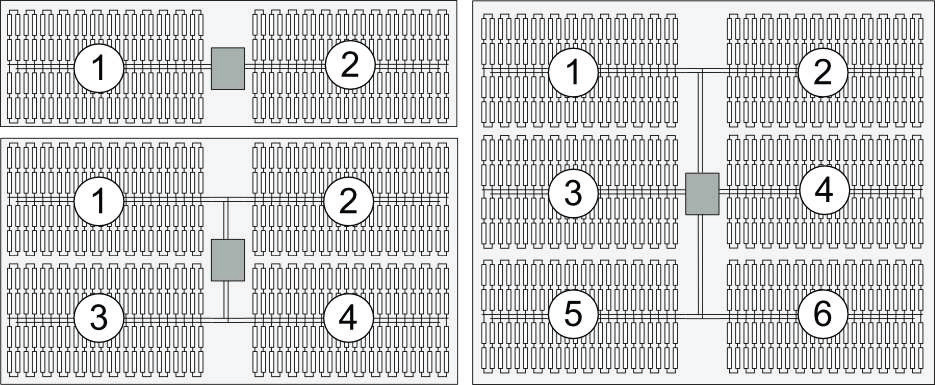

**Figure 13: Three possible field configurations modeled by System Advisor. Two (top left), four (bottom left), and six(right) field subsections are shown.**

Four different mass flow rates characterize the solar field. These are (1) the total solar field mass flow rate from Eq.[2.79], (2) the mass flow rate in the runner pipe that feeds the header sections, (3) the mass flow rate in each individual header, and (4) the mass flow rate in a single loop. The single-header mass flow rate (item 3) is defined as:

$$\dot{m}_{hdr}=\frac{2\cdot\dot{m}_{run}}{N_{fsec}} \tag{2.83}$$

#### Runner piping

The runner pipe diameter is sized to match the velocity limits specified by the user according to the total mass flow rate carried by the runner piping at design. The runner piping is broken conceptually into multiple sections, as follows:

1. The first section is the piping in and around the power block. The main runner pipes - the ones extending from the power cycle to the North and to the South - each carry one half of the total solar field mass flow rate.

$$\dot{m}_{runsec,1}=\frac{\dot{m}_{sf,des}}{2} \tag{2.84}$$

2. The second section includes the runner piping between the boundary of the power cycle out to the first set of subfield headers. Depending on the solar field configuration, the mass flow rate carried through this section may be either half of the total mass flow rate, or half of the flow less the amount sent to immediately adjacent subfields as in the case of the six-subsection arrangement in Figure 13. The general formula for the section 2 runner piping mass flow rate is shown in Eq. [2.85]. Note that for a field with only two subfields, there is no second runner piping section since the power cycle piping directly feeds the subfield headers. 

$$\dot{m}_{runsec,2}=\frac{\dot{m}_{sf,des}}{2}\left(1-\frac{N_{fsec}\pmod{4}}{N _{fsec}}\right) \tag{2.85}$$

3. For solar fields with more than 6 subsections, subsequent runner piping sections scale down in diameter as the mass flow rate decreases. The mass flow rate of each runner section \(k\) is equal to the mass flow rate from the previous section less the mass flow diverted to its subfields.

_For_ $k=2,N_{runsec}$:

$$\dot{m}_{runsec,k}=\dot{m}_{runsec,k-1}-2\cdot\dot{m}_{hdr} \tag{2.86}$$

The number of runner sections $N_{runsec}$ is dependent on the number of subfields specified by the user on the Solar Field page, and is calculated as shown in Eq. [2.87]. Note that the additional section represents the fixed piping length in and around the power cycle that connects to the solar field.
$$N_{runsec}=\lfloor\frac{N_{f,sec}}{4}\rfloor+1 \tag{2.87}$$

The runner piping diameter is sized according to the design-point mass flow rate for each section and the maximum HTF velocity limit specified on the Solar Field page.

_For_ $k=1,N_{runsec}$:

$$D_{runsec,k}=\sqrt{\frac{4\cdot\dot{m}_{runsec,k}}{\rho_{ave}\,v_{ max}\,\pi}} \tag{2.88}$$

Runner piping lengths are determined according to solar field geometry and subfield layout. Length calculations are discussed in detail on page 48.

#### Subfield header piping

Like the runner piping diameter calculations, the subfield header design must balance the need for a varying pipe diameter with practical complexity limitations. Using a different header diameter for each of the $N_{hsec}$ loop sections along the header may optimize performance, but the marginal benefits of consistent flow velocity are likely outweighed by the cost of assembling the piping. Thus, System Advisor only adjusts the header diameter for a section if the flow velocity falls outside of the specified range, and limits the total number of unique header diameters to 10.

Each unique header section $i$ is assigned to a header diameter group $j$ as depicted in Figure 14. The diameter of the first header section is calculated using a mass flow rate equal to $\dot{m}_{hdrsec,j,0}$ the flow rate at the header group $j$ inlet. Using this pipe diameter, the minimum allowable HTF mass flow rate is calculated for the lower velocity limit at group $j$.

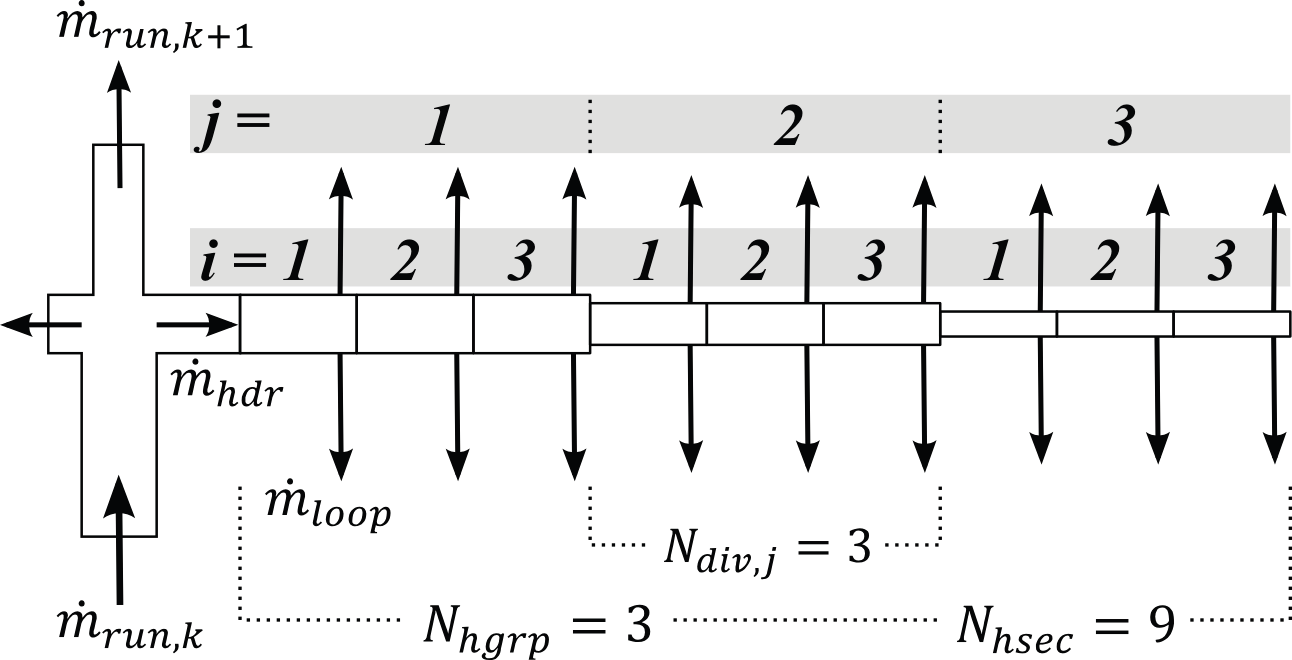

**Figure 14:Numberingschemeandnotablemass flowratesforthesubfield andrunnerpiping.**

$$\dot{m}_{min,j}=\rho_{ave}\;v_{min}\;\pi\;\frac{D_{hdr,j}^{2}}{4} \tag{2.89}$$

The same diameter $D_{hdr,j}$ is applied to the next $N_{div,j}$ header divisions in each group $j$ among $N_{hgrp}$ groups before being recalculated, but the section $i$ mass flow rate is constantly adjusted to be incrementally smaller as flow is diverted into the loops.

_For_ $j=1,N_{hgrp}$:

$$N_{div,j}=\left\lfloor\frac{\dot{m}_{hdrsec,j,0}-\dot{m}_{min,j}}{2\;\dot{m}_{ loop}}\right\rfloor \tag{2.90}$$

_And for_ $i=1,N_{div,j}$:

$$\dot{m}_{hdrsec,j,i}=\dot{m}_{hdrsec,j,i-1}-2\;\dot{m}_{loop} \tag{2.91}$$

The diameter for each group is calculated according to Eq.[2.92], and a table of header diameters is written as an output file11.

$$D_{hdr,j}=\sqrt{\frac{4\cdot\dot{m}_{hdr,j,0}}{\rho_{ave}\;v_{max}\;\pi}} \tag{2.92}$$

The header diameters are restricted to common piping schedule diameters and thicknesses.

The possible pipe schedule selections are shown in Table 9[14]. When selecting the best pipe schedule, the code looks for the smallest pipe diameter that meets the flow velocity restriction. Often, the realized pipe schedule is somewhat larger than the idealized piping diameter.

**Table 9: Pipe sizing schedules used in the trough model. The wall thickness and schedule are selected to match a pressure rating of 25 bar.**

| Nominal pipe size (in) | Schedule | Internal diameter (in) | Internal diameter (m) | Wall thickness (m) |
|---|---|---|---|---|
| 2.5 | A | 2.71 | 0.0688 | 0.0013 |
| 3 | A  | 3.33 | 0.0847 | 0.0016 |
| 4 | B | 4.26 | 0.1082 | 0.0021 |
| 6 | B | 6.36 | 0.1615 | 0.0031 |
| 8 | C | 8.13 | 0.2064 | 0.0040 |
| 10 | D | 10.25 | 0.2604 | 0.0051 |
| 12 | C | 12.25 | 0.3112 | 0.0060 |
| 14 | C | 13.38 | 0.3398 | 0.0066 |
| 16 | C | 15.38 | 0.3906 | 0.0076 |
| 18 | D | 17.25 | 0.4382 | 0.0085 |
| 20 | C | 19.25 | 0.4890 | 0.0095 |
| 22 | C | 21.00 | 0.5334 | 0.0104 |
| 24 | C | 23.00 | 0.5842 | 0.0113 |
| 26 | C | 25.00 | 0.6350 | 0.0123 |
| 28 | D | 26.75 | 0.6795 | 0.0132 |
| 30 | D | 28.75 | 0.7303 | 0.0142 |
| 32 | D | 30.75 | 0.7811 | 0.0152 |
| 34 | E | 32.62 | 0.8286 | 0.0161 |
| 36 | E | 34.50 | 0.8763 | 0.0170 |
| 42 | D* | 40.50 | 1.0287 | 0.0200 |
| 48 | D* | 46.00 | 1.1684 | 0.0227 |
| 54 | D* | 52.00 | 1.3208 | 0.0256 |
| 60 | D* | 58.00 | 1.4732 | 0.0286 |
| 66 | D* | 64.00 | 1.6256 | 0.0316 |
| 72 | D* | 70.00 | 1.7780 | 0.0345 |

_*Schedule D was the thickest pipe wall available in these diameters_

#### Piping HTF volume

In addition to the header and runner solar field piping, System Advisor calculates the HTF volume associated with the power block steam generator system (SGS) and pump piping. This HTF volume is used in the thermal inertia calculations of the power block during warm-up and transients. System Advisor specifically models the following components:

1. Individual pump suction line from the suction header to the pump inlet
2. Individual pump discharge line from the pump discharge to the discharge header
3. Pump discharge header
4. Collector field outlet header to the expansion vessel or thermal storage tank
5. Steam generator supply header
6. Inter-steam-generator piping
7. Steam generator exit header to expansion vessel or to thermal storage

Several assumptions are used to determine the HTF volume of each of these piping lines. The design-point HTF velocity is assumed to be 1.85 $\frac{m}{s}$[14], and the system is assumed to have three pumps, each capable of producing 50% of the design-point flow rate. The line lengths are fixed and do not scale with power block or solar field size, though the piping diameter does scale. Table 10 shows the assumed piping length for each line.

**Table 10: The assumed piping lengths for the steam generator and pumping system.**

| Line | Description                                | Length (m) |
|------|--------------------------------------------|------------|
| 1    | Pump suction header to pump inlet          | 45         |
| 2    | Pump discharge to discharge header         | 45         |
| 3    | Pump discharge header                       | 100        |
| 4    | Collector field to expansion vessel/TES    | 120        |
| 5    | Steam generator supply header              | 80         |
| 6    | Inter-steam-generator piping               | 120        |
| 7    | Steam generator exit to exp. vessel/TES    | 80         |

Sizing for the individual piping lines depends on the HTF volumetric flow rate. The design-point solar field mass flow rate $\dot{m}_{sf,des}$ is related to the design-point power block mass flow rate by the solar multiple, as shown in Eq.[2.93]. The volumetric flow rate is equal to the mass flow rate divided by the HTF density.

$$\dot{m}_{pb,des}=\frac{\dot{m}_{sf,des}}{SM} \tag{2.93}$$

Piping lines 1-2 in Table 10 each carry a volumetric flow of $\frac{1}{2}\cdot\dot{\vec{V}}_{sf}$, piping lines 3-4 each carry the full $\dot{\vec{V}}_{sf}$, and piping lines 5-7 carry $\dot{\vec{V}}_{pb}$.

#### 2.5.2 Piping layout and components

The remaining pipe sizing calculations are an aggregation of simple estimates based on the total solar field size and selected configuration. The piping model is organized into four convenient domains, each of which individually calls the main pressure drop calculation algorithm. These domains are the field inlet/outlet/cross-over piping (IOCop), the receiver assemblies and interspersed connective piping, the hot and cold runner pipe, and the hot and cold headers. The valve and joint component assignments for each domain are shown in Table 11.

**Table 11: **Variable assignments for the piping equipment by domain. Referenced equations are denoted with square brackets. The pressure drop coefficients for the various piping components are defined in the $k_{\Delta P}$ column.**

| Item | \(k_{\Delta P}\) | IOCop | Receivers | Runners Hot | Runners Cold | Headers Hot | Headers Cold |
|---|---|---|---|---|---|---|---|
| Length of pipe Eq.   | -                | [2.94]           | [2.95]           | [2.96]     | [2.96]     | [2.97]     | [2.97]     |
| Eval. mass flow      | -                | $\dot{m}_{loop}$ | $\dot{m}_{loop}$ | $\dot{m}_{run}$ | $\dot{m}_{run}$ | $\dot{m}_{hdr}$ | $\dot{m}_{hdr}$ |
| Eval. temperature    | -                | $T_{sf,ave}$   | $\bar{T_{i}}$  | $T_{sf,out}$ | $T_{sf,in}$ | $T_{sf,out}$ | $T_{sf,in}$ |
| Tube diameter        | -                | $D_{2}$        | $D_{2}$        | $D_{run}$ | $D_{run}$ | $D_{hdr,i}$ | $D_{hdr,i}$ |
| Expansions           | 0.50             | 0                | 0                | [2.98]     | [2.98]     | $N_{hgrp}$ | 0          |
| Contractions         | 0.50             | 0                | 0                | 0          | 0          | $N_{hgrp}$ | 0          |
| Standard elbows      | 0.9              | 2                | $10/loop$      | 0          | 0          | 0          | 0          |
| Medium elbows        | 0.75             | 0                | 0                | 0          | 0          | 0          | 0          |
| Long elbows          | 0.6              | 0                | 0                | [2.99]     | [2.99]     | 1          | 1          |
| Gate valves          | 0.19             | 2                | 0                | 1          | 1          | 0          | 0          |
| Globe valves         | 10               | 0                | 0                | 0          | 0          | 0          | 0          |
| Check valves         | 2.5              | 0                | 0                | 0          | 0          | 0          | 0          |
| Loop weldolets       | 1.8              | 2                | 0                | 0          | 0          | 0          | 0          |
| Loop control valves  | 10               | 1                | 0                | 0          | 0          | 0          | 0          |
| Ball joint assemblies| 8.69             | 0                | $3+N_{sca}$    | 0          | 0          | 0          | 0          |


The length-of-pipe equations referenced in Table 11 are shown in Eq.'s[2.94-2.97], and the number of elbows for the runner pipe is calculated in Eq.[2.99]. The number of expansions and contractions in the hot and cold runner piping depends on the number of subfield sections in the solar field. Assuming the runner piping steps down/up in diameter as it moves from the innermost subfields to those farther away from the power block, an expansion/contraction is applied for each step in runner piping diameter. This quantity is calculated in Eq.[2.98].

$$L_{IOCop} = 40[m]+L_{spacing} \tag{2.94}$$
$$L_{loop,tot} = \sum_{i=1}^{N_{sca}}(L_{i}+L_{sca,gap})\tag{2.95}$$
$$L_{run,tot} = \sum_{i=1}^{N_{runsec}}L_{runsec,i}\tag{2.96}$$
$$L_{hdr} = \sum_{i=1}^{N_{hsec}}2\cdot(L_{spacing}+4.275[m])\tag{2.97}$$
$$N_{run,exp} = \left|\frac{N_{fsec}}{4}\right|\tag{2.98}$$
$$N_{elbow,L} = \max\left(\left|\frac{L_{run}}{70[m]}+.5\right|\cdot 4,8\right) \tag{2.99}$$

The constant additional piping length of $4.275m$ in Eq.[2.97] represents the normalized piping length per loop required for thermal expansion/contraction compensation [14]. Thermal cycling of the piping causes the piping to expand or contract axially such that short diverting bends must be interspersed in the field layout to prevent joint separation or buckling.

The runner piping length in Eq.[2.96] is a function of the layout of the field subsections. Considering again Figure 13 on page 42, note that the runner piping length for the field configuration with four field subsections is roughly half of what the field configuration with six field subsections is. For fields with more than four subfields, the runner piping length is a combination of the shortened run from the power block to the first set of field subsections and the full lengths spanning the remainder of the field subsections. In addition to the variable lengths, the runner piping calculations assume a fixed length of 50 $m$ to account for piping in and around the power block. Eq.'s[2.100-2.103] show the length calculations for runner piping sections as they extend from the power block. Each length represents the distance in one direction from the power block: a mirrored counterpart is assumed on the opposite side, and an equivalent length is assumed to account for both hot and cold piping.

$$L_{runsec,1}=50[m] \tag{2.100}$$

_With a "base" runner piping length:_

$$L_{run,base}=2\ L_{spacing}+\frac{L_{loop,tot}}{2} \tag{2.101}$$

_if ${N_{fsec}}/{2}$ is an even number:_

$$L_{runsec,2}=L_{run,base} \tag{2.102}$$

_otherwise:_

$$L_{runsec,2}=2\cdot L_{run,base} \tag{2.103}$$

All subsequent ($i>2$) runner piping lengths are equal to $2\cdot L_{run,base}$. To illustrate the runner pipe length calculations, consider a plant with eight subsections. The power block is located in the center of the solar field between the 3-4 and 5-6 subsections. The runner pipe will have three unique diameters, decreasing in size as it moves away from the power block. The first diameter is sized to carry one-half of the total solar field HTF flow (the other half goes to the subfields on the other side of the power block). The length of this piping is a fixed 50 $m$. The second section will be a shortened length as described in Eq.[2.102] and will also carry one half of the HTF flow to the first two field subsections. The final runner pipe section will be of the length described in Eq.[2.103] and will carry one fourth of the total HTF flow. Return piping for the hot HTF will follow the same pattern in reverse.

#### Performance calculations

The equations for the piping equipment use a coefficient $k_{\Delta P}$ to scale the pressure drop according to a particular component's function and geometry. Pressure drop is calculated using one of three methods according to the type of component. First, pressure drop through a pipe section is calculated using the Reynolds number and friction factor to determine the head loss and pressure difference.

$$\Delta P_{pipe}=hl_{pm}\ \rho\ g\ L_{pipe} \tag{2.104}$$
_Where head loss per meter ($\frac{m}{m}$) is:_

$$hl_{pm}=\frac{fr\,\nu_{ave}^{2}}{2\,D_{pipe}\,g} \tag{2.105}$$

The mean fluid velocity $v_{ave}$ scales with the mass flow rate divided by the pipe cross-sectional area.

$$\nu_{ave}=\frac{\dot{m}}{\rho\,\pi\,\frac{D^{2}}{4}} \tag{2.106}$$

The friction factor _fr_ is a function of the pipe surface relative roughness and the Reynolds number (_Re_). For $Re<2750$, the friction factor is simply $64/Re$, though larger Reynolds numbers are more common in trough systems. The friction factor solution in turbulent regimes requires an iterative solution of an implicit equation, as presented in [9]. The general expression to be solved is:

$$fr=\frac{1}{X^{2}} \tag{2.107}$$

where $X$ can only be expressed as an argument for an implicit equation $F_{x}$.

$$F_{x}=X+2\,\,\log_{10}\left[\frac{Rough}{3.7}+2.51\,\,\frac{X}{Re}\right] \tag{2.108}$$

A solution for $X$ is found when $F_{x}$ is equal to zero. Since no analytical solution exists for $X$, the code iterates until the condition $F_{x}=0$ is satisfied. The function $F_{x}$ for three possible $Re$ values as a function of $X$ are plotted in Figure 15.

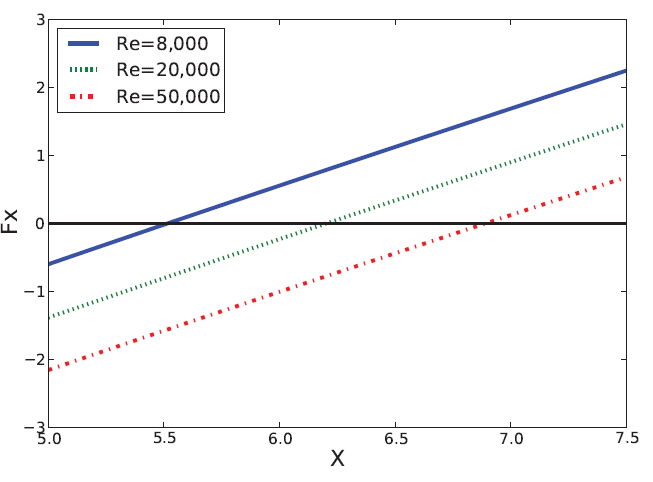

**Figure 15: The solution for Eq.[2.108] at $X=0$ is shown for three unique $Re$ values.**

The second and third methods for pressure calculation apply to the piping equipment rather than the pipe itself, and these require the use of the pressure coefficient $k_{\Delta P}$ from Table 11. For pipe expansions ($D\uparrow$) and contractions ($D\downarrow$), the pressure drop calculation is given in Eq.[2.109].

$$\Delta P_{D\uparrow}=\Delta P_{D\downarrow}=\frac{1}{2}\;k_{\Delta P}\;\rho\;v _{ave}^{2}(N_{hgrp}-1) \tag{2.109}$$

Lastly, System Advisor calculates the pressure drop across the elbows, valves, ball joints, and weldolets.

$$\Delta P_{fit}=k_{\Delta P}\;\frac{D}{f\!\!r}\;hl_{pm}\;\rho\;g\;N_{fit} \tag{2.110}$$

The pressure drop for each piping domain is equal to the sum of pipe, expansion/contraction, and fitting pressure drops allocated to each column of Table 11. Receiver pressure drop is equal to the sum of the pressure drops across each collector assembly in the loop. The total solar field pressure drop is the sum of all the pressure drops from the four piping domains, though the effective pressure drop through the runner and header sections (calculated using Eq.'s [2.104, 2.109, 2.110] above) must be averaged according to the mass flow rate passing through each subsection, as shown in Eq.'s [2.112] and [2.113].

$$\Delta P_{sf}=\Delta P_{loop}+\Delta P_{hdr,hot}+\Delta P_{hdr,cold}+\Delta P _{run,hot}+\Delta P_{run,cold}+\Delta P_{IOcop} \tag{2.111}$$

_Where:_

$$\Delta P_{hdr,cold/hot} = \sum_{j=1}^{N_{hgrp}}\left[\sum_{i=1}^{N_{div,j}}\left(\Delta P_ {pipe,j,i}+\frac{\Delta P_{\uparrow/\downarrow,i}+\Delta P_{fit,i}}{N_{div,j}} \right)\cdot\frac{2\;\dot{m}_{hdrsec,j,i}}{\dot{m}_{hdr}}\right] \tag{2.112}$$
$$\Delta P_{run,cold/hot} = \sum_{i=1}^{N_{runsec}}\left(\Delta P_{pipe,i}+\Delta P_{\uparrow /\downarrow,i}\right)\cdot\frac{\dot{m}_{runsec,i}}{\dot{m}_{hdr}} \tag{2.113}$$

Solar field HTF pumps are assumed to operate continuously over the full range of mass flows between the minimum and maximum rates specified by the user on the Solar Field page. The pumps are located along the cold runner where material stress and HTF density are minimized. The total solar field mechanical pumping power is equal to the pressure drop times the volumetric flow rate, and a pump efficiency value is used to convert mechanical power into an electrical parasitic.

$$\dot{W}_{p,sf}=\frac{\Delta P_{sf}}{\eta_{p}}\;\frac{\dot{m}_{sf}}{\rho_{hdr,cold}} \tag{2.114}$$

# 3 The Power Cycle

The power cycle subsystem contains the equipment required to convert thermal energy from the solar field into useful mechanical or electrical energy. For utility-scale CSP systems, this most often entails a conventional steam Rankine cycle and electric generator, though a number of other approaches are possible. For example, CSP systems can generate power with a stand-alone power cycle unit or can be integrated as a combined cycle into a fossil-fired plant to offset fuel use [3]. Electricity is not always the end goal, as some work has been done on incorporating the field thermal output directly into various industrial applications [1]. Even steam as the working fluid is not prerequisite since organic Rankine cycles have been proposed for lower-temperature operations [16]. But because the scope of System Advisor as an analysis tool for CSP focuses on utility-scale electricity generation, the current model caters to steam Rankine cycles with electricity generation.

## 3.1 General description

Steam Rankine cycle technology is widely used in utility-scale power generation and is well understood for fossil-fuel, nuclear, and biomass applications. The superheated steam Rankine cycle also represents the most common large-scale power generation option currently available. However, while traditional plants typically operate in a narrow range near their design point, CSP plant operating conditions can vary widely depending on solar resource availability, storage capacity, and ambient conditions. Analysis of annual electricity production for CSP is thus highly affected by the quality of off-design performance characterization.

A Rankine cycle can incorporate a relatively broad group of equipment configurations that are all tied together by the evaporation, energy extraction, condensation, and pressurization thermodynamic cycle common to the Rankine design. Parabolic trough designs seek to optimize system efficiency under the thermodynamic constraints of the technology by maximizing the field outlet temperature and power cycle efficiency, and by minimizing field thermal losses. The HTF temperature at the field outlet is bound primarily by HTF stability, so maximum HTF temperatures for oil troughs typically range between 370 $^{\circ}$ C and 410 $^{\circ}$ C. Thus, similar Rankine cycle configurations are typically encountered in different CSP systems.

The definition of the _control volume_ around the power cycle not only can change from system to system as equipment changes, but also from modeler to modeler based on analytical convenience. Still, several components are frequently found within the power cycle analytical control volume; these include the turbine(s), condenser, condensate pump, feedwater pump(s), deaerator(s), feedwater heater(s), preheater heat exchanger, boiler, superheater heat exchanger, and reheat heat exchanger(s). Depending on the heat rejection technology, some models will include the cooling tower or air-cooled condenser in this control volume as well.

The power cycle in this model uses a control volume that surrounds all of the components listed above with the exception of the heat rejection equipment. The power cycle modeled in System Advisor uses a Rankine cycle with feedwater heating and superheated steam, and it allows selection of either fixed or floating turbine inlet pressure on the Power Cycle page. Heat rejection can occur with either a wet-cooled condenser, air-cooled condenser, or wet/dryparallel cooling system.

A control volume complication arises at the condenser. By allowing the user to choose between air-cooled and wet-cooled heat rejection, the condenser cooling stream can be either air or water, and the power cycle model can't easily handle both stream types. To keep the power cycle model simple and flexible, the control volume is drawn to exclude the condenser cooling stream, but includes the steam flow as shown in Figure 16. Thus, the information flow across the control volume boundary includes the heat rejection load ($\dot{q}_{rej}$) as an output and steam condensing pressure as an input.

The power cycle works closely with the heat rejection model to determine the steam condensing temperature and load. While these are separate models conceptually, they often are forced to iterate together to converge on a solution. The heat rejection technology models are discussed in detail in Section 3.3.

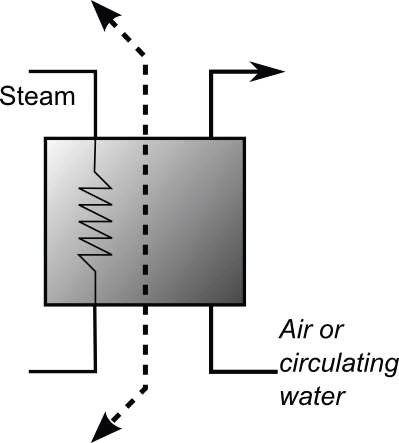

**Figure 16: Control volume near the power cycle condenser. The power cycle control volume bisects the condenser to include the steam flow but not the cooling flow.**

#### 3.1.1 Modeling Approach

The ultimate goal of the power cycle model is to accurately characterize off-design performance while providing enough flexibility to handle typical steam Rankine cycle designs. Detailed process modeling software packages often provide this capability but often require extensive setup and long run-times, presenting practical challenges for implementation in System Advisor's TRNSYS framework12. Instead of incorporating a detailed model directly into TRNSYS, process-simulation software is used to construct a representative detailed cycle, and the output is converted into an off-design performance response surface. System Advisor uses the well-known "design of experiments" statistical approach [24] to characterize variable dependencies and generate the response surfaces. The approach used in Solar Advisor was originally described in [20] and expanded in [21]. A more detailed description of this technique is presented below in Section 3.2.

#### 3.1.2 "Basis" Rankine cycle

The basis cycle is a detailed process model of a representative 10 MWe Rankine cycle developed in EES [15] whose simulated design-point calculations and performance output forms the basis for the regression model. In the modeled cycle, feedwater is heated in open (mixed stream) feedwater heaters with two intermediate turbine extractions - once for high pressure and once for low pressure, and the steam generation equipment consists of a preheater, boiler, and superheater. A "technology non-specific" (i.e. energy balance) condenser is used for heat rejection, and this equipment can be linked to either a wet cooling tower or can be specified as an air-cooled condenser. The model accommodates either fixed pressure at the turbine inlet or floating pressure as a function of inlet temperature and load. Figure 17 shows an equipment schematic for this cycle.

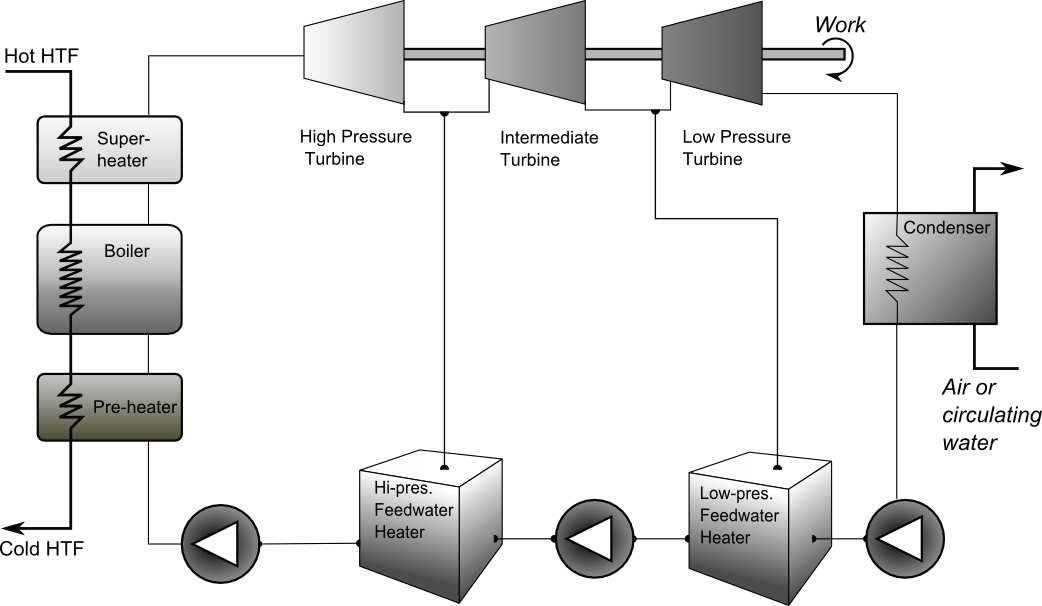

**Figure 17: Schematic for simplified basis Rankine cycle**

The design point temperatures and pressures for this power cycle model match representative parabolic trough plant operating conditions, though the scale of the modeled system (10 MW) is somewhat smaller than most operating systems. Table 12 on page 55 lists the applicable design-point conditions. System Advisor scales the model by using normalized performance curves and energy balance calculations as discussed in detail below.

The purpose of a basis Rankine cycle is to capture the impact of off-design operating conditions on the heat absorption and power generation of the power cycle. Overall cycle thermodynamic efficiency is often increased with the addition of multiple feed-water heating stages and with a reheat heat exchanger, and while this added complexity improves the design-point efficiency, the behavior of the plant in off-design conditions _relative to the design point_ stays approximately the same as for a simpler cycle. Therefore, the importance of the values listed in Table 12 lies only in their relative relationships. Although the design point of the basis power cycle is 10 MW, the behavior exhibited by this power cycle in off-design conditions applies to any other power level.

| Item                                      | Value | Units        |
|---|---|---|
| HTF inlet temperature                    | 393   | $^{\circ}$ C |
| HTF outlet temperature                   | 293   | $^{\circ}$ C |
| Steam temperature at turbine inlet       | 373   | $^{\circ}$ C |
| Boiler steam temperature                 | 311.1 | $^{\circ}$ C |
| Boiler pressure                          | 100   | bar          |
| Condenser pressure                       | 0.085 | bar          |
| Steam extraction fraction, high pressure | 0.13  | -            |
| Steam extraction pressure, high pressure | 23.9  | bar          |
| Steam extraction fraction, low pressure  | 0.16  | -            |
| Steam extraction pressure, low pressure  | 2.9   | bar          |
| Turbine isentropic efficiencies (all)   | 0.7   | -            |
| Pump isentropic efficiencies (all)      | 0.695 | -            |
| Turbine mechanical power                 | 10.0  | $MW$           |

| Calculated heat exchanger sizes:         |       |              |
|---|---|---|
| Preheater size (UA)                      | 267.6 | $\frac{kW}{K}$ |
| Boiler size (UA)                         | 691.1 | $\frac{kW}{K}$ |
| Superheater size (UA)                    | 115.6 | $\frac{kW}{K}$ |


In the design cycle model, the values at the top of Table 12 are set as inputs. The design model then calculates heat exchanger sizes (expressed as thermal conductance, or _UA_) and heat transfer into the cycle ($\dot{Q}_{des}$) according to the condenser pressure ($P_{c}$) and desired power output ($\dot{W}_{des}$). But in the performance cycle, the heat exchanger sizes are fixed while power output and heat absorption are calculated as outputs.


## 3.2 Regression model

A detailed performance model like the one described above provides a great deal of accuracy and capability. By modeling the power cycle using the EES program (or any other process simulation software), we ensure that the behavior of the power cycle at part-load conditions matches closely with what we might expect from a real plant. Detailed models calculate steam conditions at each position throughout the power cycle and can model subsystem performance in detail. Using this modeling approach in System Advisor presents several obstacles.

First, the Rankine power cycle contains half a dozen major components - at a minimum - and most typically contain more. Each component may require complicated sub-models to predict behavior, and most components operate at or near the saturation point for steam. The mix of latent heat transfer, complex sub-models, and steam property instability can be difficult to handle when the model is expressed in general terms. Secondly, System Advisor performance simulations require several thousand individual hourly runs to complete, and the iterative TRNSYS solver can require a total number of iterations orders of magnitude larger. System Advisor's simplified power cycle modeling approach minimizes model run times to allow for the fast calculations required for the type of modeling System Advisor is designed for.

One common method for modeling simplified cycle performance uses one or more polynomial curves that express power output, cycle efficiency, or some other useful metric as a function of cycle thermal load. This approach works well when one operating condition varies, but it can fail when multiple conditions deviate simultaneously from their design point. For example, if the HTF mass flow rate falls below its design point value, cycle behavior can be captured adequately by a part-load curve. But if HTF mass flow rate and ambient temperature both drop, the resulting cycle performance may not be described by simply multiplying the effects of each individual part-load efficiency curve. In reality, cycle performance is subject not only to the disassociated _main effects_ of HTF inlet temperature, mass flow rate, and condenser pressure (a direct byproduct of ambient temperature), but also to the impacts of _interaction_ between these variables.

The System Advisor power cycle model uses a statistical "design of experiments" approach [24] to characterize the behavior of the power cycle under a variety of operating conditions. The method used here is originally described in [20], and a more thorough methodology is developed in [21]. The procedure for developing a regression model from more detailed performance calculations is summarized as follows:

* Practical limits on the range of the three independent variables are identified. The variables are (A) HTF inlet temperature, (B) Condenser pressure, and (C) HTF mass flow rate
* Parametric runs evaluate the power output ($\dot{W}$) and cycle heat absorption ($\dot{Q}$) over the full range of inputs. Table 13 shows the experimental design that is used to generate the required information.
* The information generated by parametric runs in detailed modeling software is non-dimensionalized.
* Non-dimensional information is analyzed to determine the main effects and effect interactions.
* These effects are consolidated and applied in the code.


### 3.2.1 Regression modeling concepts

Instead of relying on part-load polynomial curves or lookup tables to predict plant performance in off-design conditions, this methodology uses a structured design-of-experiments approach [24] to characterize plant behavior using detailed process modeling software, then extracts output dependence from that information within the framework of statistical effects and interactions.

To illustrate this idea, consider the input and output of interest in a Rankine power cycle model. For CSP plants, the modeler is primarily interested in the total power output, thermal absorption from the heat transfer fluid (HTF), HTF return temperature, and cooling system load. These in turn depend on inputs like HTF inlet temperature, turbine back-pressure, HTF mass flow rate, and others. If the HTF flow rate varies exclusively, a simple part-load curve might adequately capture the performance impact. However, accurate results are unlikely if the inlet HTF temperature and mass flow rate both vary simultaneously and the two independent effect functions are overlaid. The proposed approach not only captures the impact of varying a single input, but also captures competing interaction effects introduced by concurrent off-design variation.

### 3.2.2 Off-design response framework

The ultimate goal of this method is to convert a complex and detailed power block model into a descriptive simplified model. To accomplish this task, a thorough information set is required that describes the cycle's off-design performance as a function of operating conditions, and a detailed process simulation software tool like IPSEPROTM[7], GateCycleTM, or ThermoFlowTM[12] provides this information. One purpose of this methodology is to minimize the modeling effort that is required to develop a thorough system performance map, and this is achieved through strategic selection of the simulation parameters. The response framework provides a design for the analytical experiment that meets these criteria.

The first step in constructing the response framework is establishing which quantities impact cycle performance (model inputs) and which are required to fully describe the observed performance (model outputs). Cycle performance is fundamentally expressed in terms of power output ($\dot{W}$) and heat absorption ($\dot{O}$); the relationship between the independent variables and these two values allows the calculation of secondary information including cycle efficiency, heat rejection load, and HTF temperature drop. For any given cycle design, performance is a function of three independent variables13: HTF inlet temperature ($T_{in}$), condenser steam pressure ($P_{c}$), and HTF mass flow rate ($\dot{m}$). Deviation among these three variables from their design-point values adversely impacts the heat-to-power conversion efficiency of the cycle.

### 3.2.3 Parameter normalization

The input and output variables are readily expressed in normalized terms, and the regression methodology presented below requires this generalized state. The power output, heat input, and HTF mass flow rate are simply divided by their design-point values such that they are equal to 1.0 when they match the design rate. The two exceptions to this approach are the condenser pressure and the inlet HTF temperature. Condenser pressure does not generally scale up or down as the size of the power block varies, so it is left in dimensional form.

Inlet HTF temperature is normalized with respect to the superheater temperature rise. For cycles with superheat, most of the heat transfer from the HTF to the steam working fluid occurs in boiling and superheat. Steam evaporates at a constant temperature for a given boiler pressure, and this temperature represents the effective minimum temperature at which the HTF could enter the power block and still provide heat flow into the steam. Therefore, the boiler steam temperature (not the HTF outlet temperature) is considered to be the zero-value for normalized HTF inlet temperature.

$$\hat{T_{in}}=\frac{T_{in}-T_{boil}}{T_{in,des}-T_{boil}} \tag{3.1}$$

### 3.2.4 Experimental design

The three independent variables are varied parametrically within the response framework to obtain the required performance information. Each independent variable has a direct impact on performance, but simultaneous variation of the independent variables can also induce secondary impacts that adversely affect accuracy. To measure these "interaction" effects, the analysis includes parametric runs where the inputs are evaluated concurrently at design and off-design conditions.

Table 13 provides the experimental design framework for this methodology. Each run in the table represents a parametric set of simulations where the variable indicated with "$\backsim$" is varied stepwise from the lower to upper bounds. The other two variables are held fixed at either their lower bound (-), upper bound (+), or design-point value (0). Runs 2, 5, and 8 measure the primary effects of one of the three independent variables while the other two are held at their design-point value. The remainder of runs 1-9 aid in measuring the impact of two-variable interaction (denoted A $>$ B), and runs 10-13 measure the impact of the three-variable interaction (which is often negligible and has been neglected in this paper). The upper and lower bounds are selected based on practical operation limits of the power cycle. For example, if the minimum turn-down state for the modeled cycle is 30% of design (i.e. a 70% reduction in operation), the lower bound on $\dot{m}$ should be $0.3\times\dot{m}_{des}$.

### 3.2.5 Formulating a model

The output of the runs in Table 13 is used to generate a model that can express both heat absorption and power output as functions of the three independent variables and their interactions. The intermediate result of each run is a table that relates heat absorption or power output to a particular arrangement of $T_{in}$, $P_{c}$, and $\dot{m}$. For example, Run #1 will produce a pair of functions (one for power output and a second for heat absorption, both expressed as functions of $T_{in}$) that vary with HTF inlet temperature at a fixed lower-bound value for HTF mass flow rate. Substituting the general output variable $Y$ for $\dot{Q}$ and $\dot{W}$:

$$Y_{Run1}=f\left(T_{in},\dot{m}^{(-)}\right) \tag{3.2}$$

Figure 18 corresponds to runs 4-6 in Table 13 and shows how power (left) and heat (right) output vary as a function of parameterizing $P_{c}$ at three distinct levels of $T_{in}$. The central lines in Figure 18 represent the situation where only $P_{c}$ is varied and both $T_{in}$ and $\dot{m}$ are left at their design-point values (run $\#5$).

| Run  | $T_{in}$ | $P_{c}$ | $\dot{m}$ | Measures                 |
|------|----------|---------|-----------|--------------------------|
| 1    | $\backsim$ | 0       | -         | $f(\dot{m}>T_{in})$      |
| 2    | $\backsim$ | 0       | 0         | $f(T_{in})$              |
| 3    | $\backsim$ | 0       | +         | $f(\dot{m}>T_{in})$      |
| 4    | -        | $\backsim$ | 0         | $f(T_{in}>P_{c})$        |
| 5    | 0        | $\backsim$ | 0         | $f(P_{c})$               |
| 6    | +        | $\backsim$ | 0         | $f(T_{in}>P_{c})$        |
| 7    | 0        | -       | $\backsim$ | $f(P_{c}>\dot{m})$       |
| 8    | 0        | 0       | $\backsim$ | $f(\dot{m})$             |
| 9    | 0        | +       | $\backsim$ | $f(P_{c}>dot{m})$       |
| 10   | -        | -       | $\backsim$ | $f(T_{in}>P_{c}>\dot{m})$|
| 11   | -        | +       | $\backsim$ | $f(T_{in}>P_{c}>\dot{m})$|
| 12   | +        | -       | $\backsim$ | $f(T_{in}>P_{c}>\dot{m})$|
| 13   | +        | +       | $\backsim$ | $f(T_{in}>P_{c})\dot{m}>$|

**Table 13: The experimental design for characterizing power block performance. The experiment is adapted from a three-level full-factorial design.**


This methodology asserts that the upper and lower curves observed in Figure 18 can be approximated by multiplying the main effects of $Y_{ME}(T_{in})$ and $Y_{ME}(P_{c})$, where the two-variable interaction effect $Y_{INT}(T_{in} > P_{c})$ scales the impact of the second main effect. Since the purpose of the interaction effect is to adjust the magnitude of main effect's impact on the output, the interaction effect is applied only to the difference between the calculated main effect and the basis normalized value (i.e. $Y_{ME}-1$). Since all effect functions in the set $Y$ are normalized about 1, the main effect must first be shifted from 1 to 0 before being multiplied by the interaction effect. The product is then readjusted to 1.0 as shown in Eq.[3.3]. In general terms, the calculated output variable $Y^{*}$ is determined for any set of inputs $X_{i}$ with the relationship:

$$Y^{*}=\prod_{i=1}^{nX}\left[(Y_{ME}(X_{i})-1)\cdot Y_{INT}\left(X_{j} > X _{i}\right)+1\right] \tag{3.3}$$

In Eq.[3.3], $X_{j}$ represents the input variable that interacts with $X_{i}$. For example, in Table 13, $\dot{m}$ interacts with $T_{in}$, and this effect is measured in runs $\#1$-3. In this example, $X_{j}\equiv\dot{m}$ and $X_{i}\equiv T_{in}$.

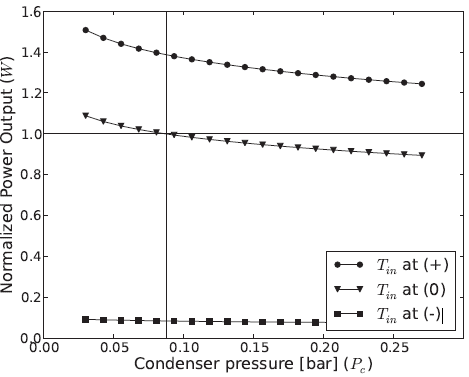

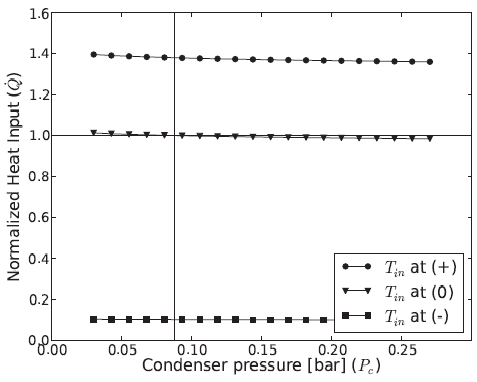

**Figure 18: Data showing how the power and heat output varies with condenser pressure [bar] at three distinct levels of HTF inlet temperature.**

Interaction effects measure the relative difference between the calculated value that is predicted by multiplying only main effects and the actual value observed from the detailed modeling simulation. Mathematically speaking, the interaction is the ratio of values (Observed - Main Effect)/(Predicted - Main Effect), as shown in Eq.[3.4] (the $\hat{Y}$ notation indicates a data point obtained from the detailed model as opposed to the function family $Y$ within the regression model). The interaction equation can be formulated for either the lower or upper bound runs ($\pm$), assuming either the lower or upper bound of $X_{j}$ is used.
$$Y_{INT}^{(\pm)}\left(X_{j}^{(\pm)}> X_{i}\right)=\frac{\hat{Y}^{(\pm)}(X_{i })-Y_{ME}(X_{i})}{Y_{ME}(X_{i})\ \left(Y_{ME}(X_{j}^{(\pm)})-1\right)} \tag{3.4}$$

Note that the resulting expression for $Y_{INT}(X_{j}>X_{i})$ contains arguments for $X_{j}$ and $X_{i}$; however, the function is only truly dependent on $X_{i}$, retaining $X_{j}$ in the nomenclature merely as a reference to the two interacting variables. Figure 19 shows the heat absorption and power output as a function of HTF temperature for three mass flow rates and the associated interaction effect curves. This shows that even for cases where the output appears to be linearly related to the independent variables, interaction effects can have a significant relative impact.

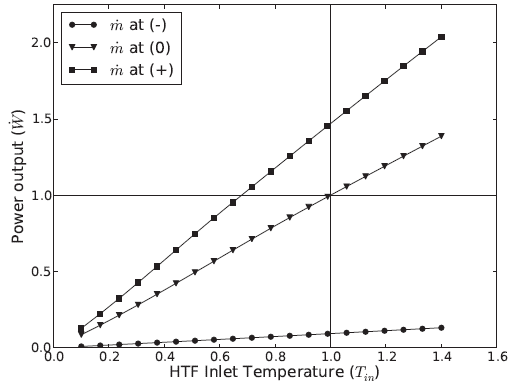 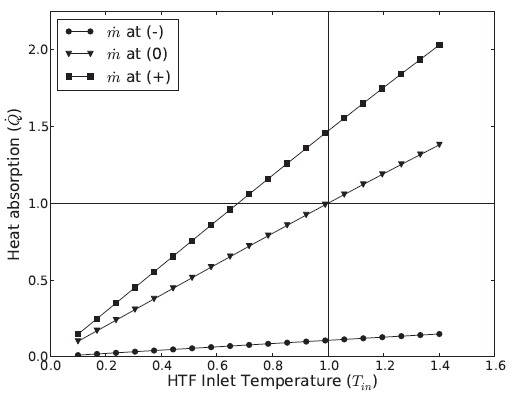 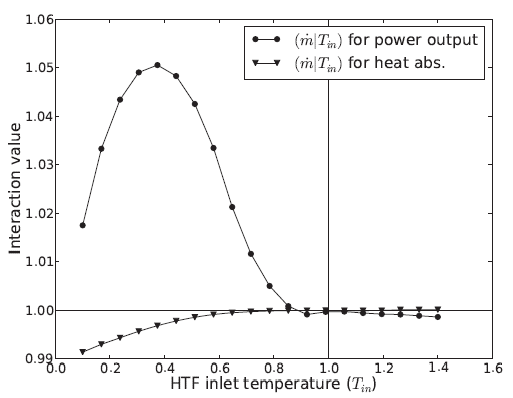

**Figure 19: Data showing how the power and heat output varies with HTF temperature at three distinct levels of HTF mass flow rate (top), and the associated interaction effects (bottom).**

### 3.2.6 Other calculated output

Since the power cycle model regresses only power output and heat input as functions of HTF temperature, condenser pressure, and mass flow rate, the model uses another set of equations to calculate other performance values. The calculation of power cycle efficiency is straightforward. Thermodynamic power cycle efficiency is determined by simply dividing the work output by the required heat input.

$$\eta_{cycle}=\frac{\dot{W}}{\dot{Q}} \tag{3.6}$$

The outlet HTF temperature from the power cycle is calculated by considering the HTF mass flow rate, the heat input, the inlet temperature, and the specific heat of the HTF. The specific heat is assumed to vary linearly over the range of the inlet and outlet temperatures. Thus, an average specific heat value is used and is recalculated throughout the simulation.

$$T_{htf,out}=T_{htf,in}-\frac{\dot{Q}}{\dot{m}_{htf}\;c_{htf,ave}} \tag{3.7}$$

The power cycle model does not directly model the performance of the heat rejection equipment. Instead, it supplies information to an external heat rejection model on the magnitude of the rejection load. This value is equal to the difference between work output and heat absorption, or alternatively:

$$\dot{q}_{rej}=\left(1-\eta_{cycle}\right)\;\dot{Q} \tag{3.8}$$

Minerals, scales, and other solids accumulate in the power cycle equipment [6] during operation. Excessive buildup of these particulates detrimentally affects heat exchanger performance and can damage the turbine blades and pumps. This situation is avoided by extracting a fraction of the steam flow (called "_blowdown_") and replacing it with fresh, demineralized water. Additional water and steam is lost through other mechanisms, including leaks in the pressurized flow circuit, entrainment of steam with non-condensibles in the deaeration process, and evaporation from the wet cooling system (see Section 3.3). All of these water losses must be made up to maintain a constant level in the plant. System Advisor models the steam working fluid replacement rate (excluding wet-cooled evaporation) by calculating an approximate steam mass flow rate during operation and replacing a fixed fraction with fresh water.

The steam blowdown mass flow rate is calculated by Eq.[3.9], where the blowdown fraction is given by $f_{bd}$ and the total enthalpy of heat addition across the heat exchangers is $\Delta h_{heat}$.

$$\dot{m}_{st,bd}=\frac{\dot{W}\;f_{bd}}{\eta_{cycle}\;\Delta h_{heat}} \tag{3.9}$$

The model assumes a default blowdown fraction of 2.0%, which falls in the range recommended by [6], but this fraction can be adjusted by the user. The enthalpy change across the heat exchangers is estimated by assuming that the temperature drop from the hot inlet HTF to the turbine inlet steam is 25 $^{\circ}$ C, and by assuming that the temperature of the feedwater at the inlet of the preheater is \(100^{\circ}\)C below the boiling temperature. Thus:

$$\Delta h_{heat}=h_{st,hot}-h_{st,cold} \tag{3.10}$$

_Where:_

$$h_{st,hot} = enthalpy\left(T=T_{htf,in}-25^{\circ}C,P=P_{boil}\right)$$
$$h_{st,cold} = enthalpy\left(P=P_{boil},\chi=0\right)-100^{\circ}C\cdot\left[4.91 \frac{kJ}{kg.C}\right]$$

The specific heat value of $4.91 \frac{kJ}{kg \; C}$ is selected based on the integrated average of the $100^{\circ} C$ temperature range below the boiling temperature for a boiler pressure of $100 bar$.

## 3.3 Heat rejection

Discussion in Section 3 has focused thus far on modeling the response of heat and power as functions of three independent variables: (A) HTF inlet temperature, (B) condenser pressure, and (C) HTF mass flow. A and C are determined directly by the solar field (or the controller) and are inputs to the power cycle model, but the condenser pressure is more closely affiliated with the power cycle than the solar field. Unlike the HTF temperature and mass flow rate that can be varied more directly, condenser pressure is dependent on external phenomena like ambient temperature, cooling technology, and cooling load.

Why is condenser pressure incorporated into the model as an independent variable? Recall from Figure 16 and the surrounding discussion that the power cycle analysis control volume excludes the condenser because of the complication of multiple possible heat rejection streams. This means that the condenser and all of the associated heat rejection equipment must be modeled outside of the power cycle itself. The interface between the power cycle model and the heat rejection model requires passing the heat rejection load $\dot{q}_{rej}$ from the power cycle to the cooling model and passing the achieved condenser pressure $p_{cond}$ from the cooling model to the power cycle. A high level of attention to heat rejection is important because both the thermodynamic performance and the total plant water consumption depend on how heat is rejected from the power cycle.

#### 3.3.1 Performance considerations

The thermodynamic cycle can take many forms - the Rankine steam power cycle is just one manifestation. All of these cycles have one operating principle in common: heat energy flowing from a hot reservoir to a cold one can be used to generate mechanical power (see Figure 20). In the Rankine cycle, the hot reservoir is the process that provides heat to the cycle. For CSP, this is the solar field, but in other technologies it may be a coal-fired boiler or a nuclear reactor. The cold reservoir may be a large or moving body of water, an evaporation pond, or ambient air.

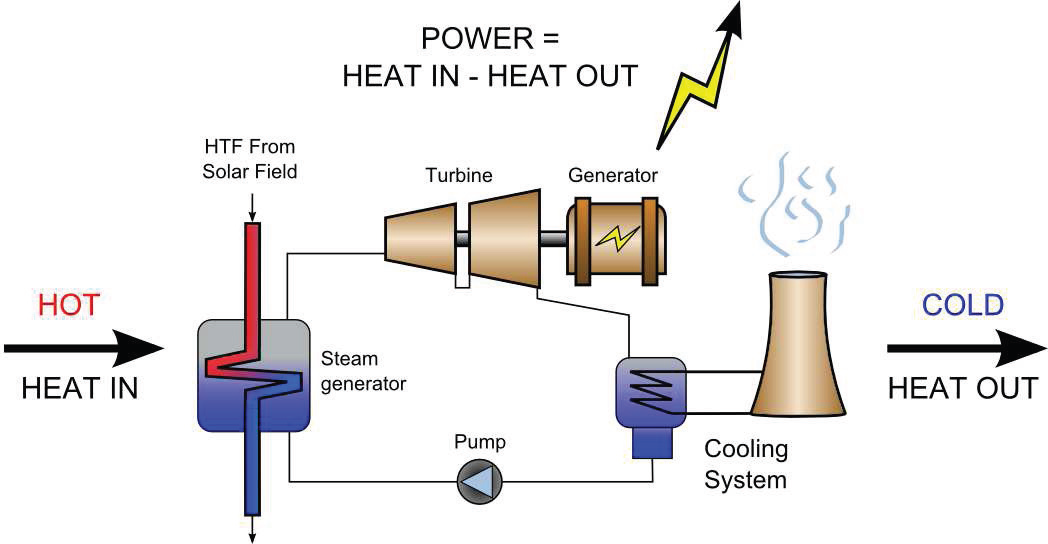

**Figure 20: A simplified Rankine cycle diagram. Heat is added to the cycle by the solar field via a heat exchanger. Heat is removed from the system via a wet cooling tower. Power output is equal to the heat addition minus the heat rejection.**

The efficiency of the power cycle depends on the "quality" of the thermal reservoirs. A hotter heat source or a colder heat sink both increase thermodynamic efficiency. Even a seemingly small change in the quality of either reservoir can impact cycle efficiency in a way that gives one design a competitive advantage over another. This is especially true of CSP plants, where the heat source is the most expensive portion of the initial capital investment. The two cooling technologies available to nearly all CSP plants are wet cooling and dry cooling. These technologies lie on opposite ends of the spectrum in terms of both performance and water use [23], and these are the technologies that System Advisor models.

Both wet and dry cooling use ambient air as the ultimate cold thermal reservoir, but differ in the mechanism of heat transfer between the cycle and air. Wet cooling systems use a deluge of water to remove heat through evaporation; thus the temperature of the cold reservoir is driven by the _wet-bulb_ air temperature. Dry cooling systems transfer heat directly from the steam working fluid to air using a sensible-heat process. This technique is limited by the _dry-bulb_ temperature of air, which can be significantly higher than the wet bulb temperature, especially in arid regions where CSP is most desirable. Figure 21 shows the significant difference between dry and wet-bulb temperature for five summer days in an arid climate.

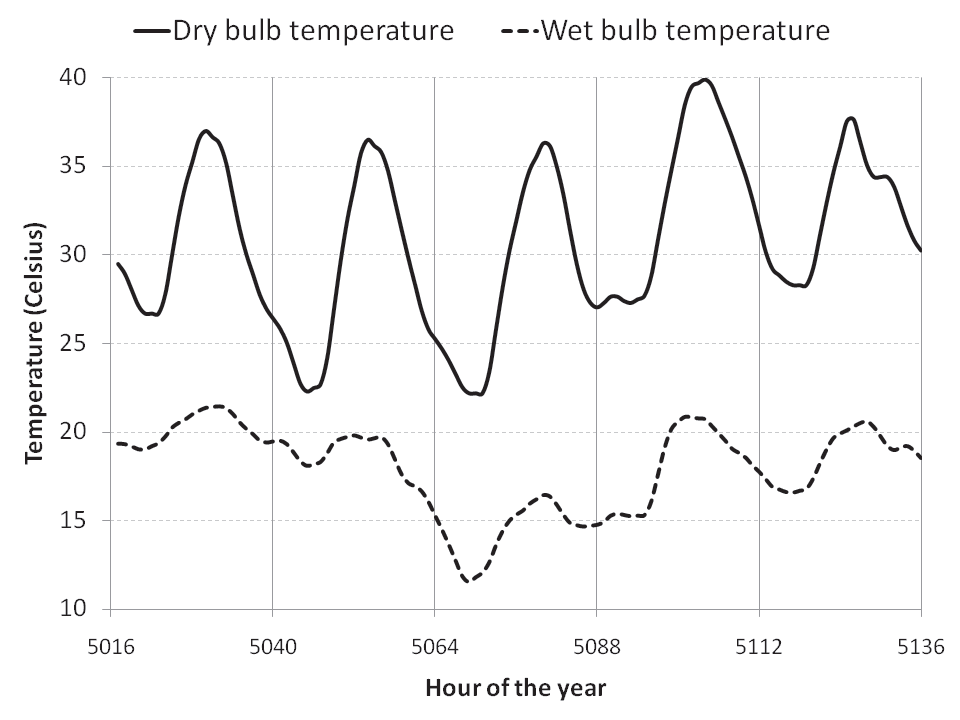

**Figure 21: Dry and wet bulb temperatures for five summer days in an arid climate. Peak temperature differences approach $20^{\circ}C$ during the hottest hours of the day.**

As steam exits the turbine, it is a mixture of saturated steam and a small amount of liquid water. In this partially condensed state, the temperature and pressure of the steam are directly linked such that one property fixes the other. Whether the system is wet or dry cooled, the temperature achieved by the cooling technology will set the condenser pressure, and this value is then used as an input to the power cycle model. Thus, the ambient temperature, condenser pressure, and overall cycle thermodynamic performance are directly connected. Consider the performance impact of the $20 ^{\circ} C$ temperature difference between wet and dry technologies suggested in Figure 21. Superimposed on a performance plot in Figure 22, this temperature difference shows how the condenser pressure and subsequent cycle performance are adversely impacted.

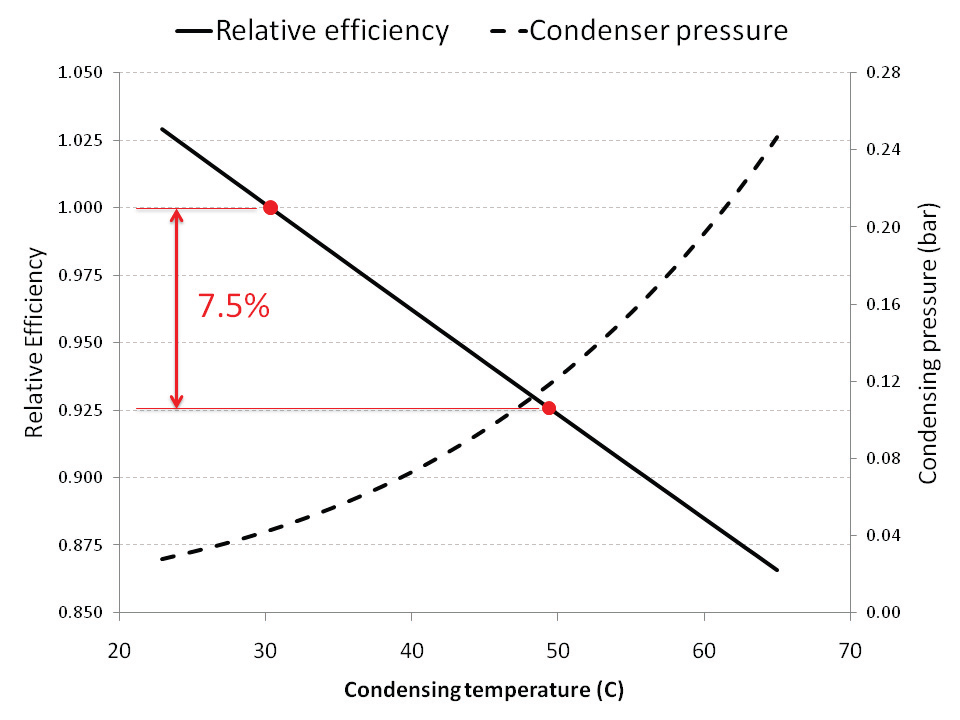

**Figure 22: The impact of a $20^{\circ}C$ temperature change on condenser pressure and cycle performance.**

The disadvantage of achieving improved performance with wet cooling systems is the significant amount of water that these systems lose through evaporation. Furthermore, a typical 100MW wet-cooled plant with a 40% capacity factor can consume nearly 1.4 cubic kilometers of water per year, of which 94% is due to evaporation [23]. Dry cooling uses virtually no water, and thus may be the only option for project locations where water is limited. System Advisor models both the water use and performance impacts of the different cooling technologies. System Advisor also models an emerging cooling technology that places a wet cooling system in parallel with an dry cooling system with the purpose of reducing the temperature rise of the cooling air across the dry system. All three of these cooling options are discussed in detail below.

### 3.3.2 Condenser performance limitations

The wet, dry, and hybrid cooling systems all require the use of a condensing heat exchanger to convert high quality steam from the turbine to feedwater that is pumped back through the heat exchanger system. Steam exits the turbine under vacuum conditions and must be piped via ducting to the condenser equipment. Transport of steam at low pressures can be problematic, since the pressure drop between the turbine outlet and the condenser inlet is proportional to the steam velocity through the ducting. Rule-of-thumb guidelines require that low-pressure steam velocity through ductwork be limited to less than $30\frac{m}{s}$ (approximately $100 \frac{{ft}}{{s}}$). Figure 23 shows how steam velocity varies with condensing pressure for a plant that has been designed for a minimum pressure of 2 inHg14 (0.068 bar). The selected design corresponds to a 110 MWe gross power cycle with four steam ducts with diameters of 4.1m each.

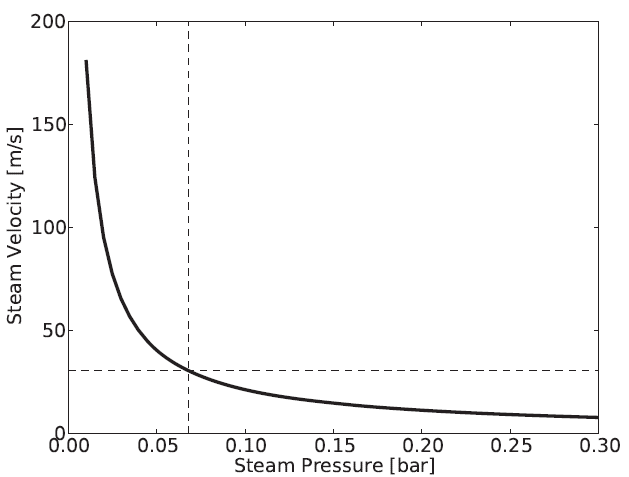

**Figure 23: Steam velocity as a function of steam pressure through ductwork in a plant designed for a minimum condenser pressure of 0.068 _bar_**

In order to accommodate steam pressures below the 0.067 bar limitation shown above, the plant designer must either increase the ducting diameter or include additional ducts in parallel. This quickly becomes economically and technically impracticable; instead, the system is designed to maintain suction pressure with acceptable steam velocity and pressure drop through the ducting. Since higher turbine outlet pressure detracts from overall power cycle efficiency, this practice balances duct cost and cycle performance. System Advisor incorporates a user-specified minimum condenser pressure (on the Power Cycle page). The default value of 1.25 inHg applies to wet cooling systems. A higher value of 2.0 inHg is commonly used for air cooling and hybrid cooling systems.

In order to maintain the condenser pressure above the minimum requirement, the heat rejection equipment must partially shut down. By incrementally reducing the heat rejection capacity of the system, the temperature rise of the cooling water (or cooling air stream, in the case of dry cooling) increases thereby increasing the condenser temperature and pressure. System Advisor incrementally reduces the cooling system capacity according to the "Cooling system part load levels" ($N_{hr,pl}$) input on the Power Cycle page. During time steps when the calculated condenser pressure falls below the minimum value, System Advisor will reduce the cooling capacity by the fraction $\frac{{1}}{{N_{hr,pl}}}$ until the condenser pressure is restored to an acceptable level. Parasitic pumping/fan loads are also reduced in proportion with the partial operation.

Occasionally, the ambient and power cycle operating conditions cause the condenser pressure to fall below the minimum level even when the cooling equipment operates at its minimum level. System Advisor models this situation by assuming that the cooling equipment is capable of operating in an idealized part-load mode where the condenser pressure is set equal to the minimum value. The parasitic loads and other performance parameters are then recalculated assuming operation at this minimum pressure value. This approximation is sufficient so long as this situation is encountered infrequently throughout the year.

### 3.3.3 Wet cooling model

The wet cooling model calculates the condenser pressure, parasitic load, and water use for a forced-draft wet cooling system common in Rankine cycle power plants. The model requires a number of parameters and inputs to calculate performance, and these are provided either directly from the user, from values available to the power cycle model, or from assumed values coded into the model that cannot be changed by the user. These items are summarized in Table 14.

**Table 14: Summary of inputs to the wet cooling model.**

| Variable       | Description                                              | Units   | Value |
|----------------|----------------------------------------------------------|---------|-------|
| **User-supplied inputs** |                                         |         |       |
| $\Delta T_{cw,des}$  | The cooling water temperature rise across the condenser | $^{\circ}C$ | 10    |
| $\Delta T_{approach}$ | The cooling water approach temperature                   | $^{\circ}C$ | 5     |
| **Inherited inputs**     |                                         |         |       |
| $W_{des}$            | Power output at design                                   | MW      | -     |
| $\eta_{des}$         | Power cycle efficiency at design                         | -       | -     |
| $T_{db}$             | Dry bulb temperature                                     | $^{\circ}C$ | -     |
| $T_{wb}$             | Wet bulb temperature                                     | $^{\circ}C$ | -     |
| $P_{amb}$            | Atmospheric pressure                                     | Pa      | -     |
| **Assumed values**       |                                         |         |       |
| $\Delta T_{out}$    | Temperature difference at the hot side of the condenser | $^{\circ}C$ | 3     |
| $f_{drift}$         | Drift loss fraction                                      | -       | 0.001 |
| $f_{ctbd}$          | Cooling tower blowdown fraction                          | -       | 0.003 |
| $\Delta P_{cw}$     | Circulating water pressure drop                          | bar     | 0.37  |
| $\eta_{pump}$       | Cooling water pump mechanical efficiency                 | -       | 0.75  |
| $\eta_{pump,s}$     | Cooling water pump isentropic efficiency                | -       | 0.80  |
| $\eta_{fan}$        | Fan mechanical efficiency                                | -       | 0.75  |
| $\eta_{fan,s}$      | Fan isentropic efficiency                                | -       | 0.80  |
| $r_{p,fan}$         | Fan pressure ratio                                       | -       | 1.0025|
| $r_{mass,fan}$      | Fan air-flow to water-flow mass ratio                    | -       | 1.01  |

In addition to these input values, the wet cooling model makes use of a number of hard-coded property curves. These are presented in Table 15.

The wet cooling model assumes that $T_{approach}$ entered by the user and $\Delta T_{out}$ assumed by the model are constant throughout the performance calculations. Wet cooling systems operate by circulating water through a condenser heat exchanger to remove heat from the steam flow. This circulating water then passes through the wet cooling tower where heat is removed by direct evaporation. The cooling water temperature rise ($\Delta T_{cw,des}$) is a function of the heat rejection load and the mass flow rate of the circulating water as shown in Eq.[3.11].

$$\Delta T_{cw,des}=\frac{\dot{q}_{rej}}{\dot{m}_{cw}\;c_{p,cw}} \tag{3.11}$$

**Table 15: Property functions used by the wet cooling model.**

| Units | Input | Expression |
|---|---|---|
| **Enthalpy of evaporation near atmospheric pressures** $\frac{J}{kg}$ | $P$ [Pa] | $2.362\cdot 10^{6}-1.355\cdot P+3.085\cdot 10^{-6}\cdot P^{2}$ |
| **Specific heat of saturated liquid water** $\frac{J}{kg\;K}$ | $P$ [Pa] | $4170.5+5.381\cdot 10^{-4}\cdot P-7.734\cdot 10^{-10}\cdot P^{2}$ |
| **Saturation pressure of steam** Pa | $T$ [K]  | $1123.1-19.64\cdot T+4.426\cdot T^{2}-0.039\cdot T^{3}+9.655\cdot 10^{-4}\cdot T^{4}$ |
| **Enthalpy of water at liquid saturation near ambient pressures** $\frac{J}{kg}$ | $P$ [Pa] | $2.296\cdot 10^{5}+2.785\cdot P-1.112\cdot 10^{-5}\cdot P^{2}+2.12\cdot 10^{-11} \cdot P^{3}$ |
| **Entropy of water at liquid saturation near ambient pressures** $\frac{J}{kg\;K}$ | $P$ [Pa] | $779.99+7.916\cdot 10^{-3}\cdot P-3.330\cdot 10^{-8}\cdot P^{2}+6.386\cdot 10^{-14} \cdot P^{3}$ |
| **Density of water at liquid saturation near ambient pressures** $\frac{kg}{m^{3}}$ | $P$ [Pa] | $984.1-3.071\cdot 10^{-4}\cdot P+5.323\cdot 10^{-10}\cdot P^{2}$ |
| **Enthalpy of air as a function of temperature at ambient pressure** $\frac{J}{kg}$ | $T$ [$^{\circ}C$] | $2.735\cdot 10^{5}+1002.9\cdot T+0.0327\cdot T^{2}$ |

The mass flow rate during operation is restricted by the capabilities of the circulating pumps. The modeled system assumes two fixed-speed pumps, each sharing 50% of the load. Thus, the operating strategy allows for either 100% or 50% mass flow conditions. The cooling water temperature rise necessarily varies proportionally with the heat rejection load. If the load falls below 50% of the design value, the circulating water mass flow rate is reduced to 50%. Design conditions are determined as follows:

$$\dot{q}_{rej,des}=\dot{W}_{des}\left(\frac{1}{\eta_{cycle,des}}-1\right) \tag{3.12}$$

$$\dot{m}_{cw,des}=\frac{\dot{q}_{rej,des}}{c_{p,cw}\;\Delta T_{cw,des}} \tag{3.13}$$

As previously mentioned, the mass flow rate is a discrete value equal to either 100% or 50% of full-load.

$$\dot{q}_{rej} \geq \frac{\dot{q}_{rej,des}}{2}\Rightarrow\dot{m}_{cw}=\dot{m}_{cw, des} \tag{3.14}$$
$$\dot{q}_{rej} < \frac{\dot{q}_{rej,des}}{2}\Rightarrow\dot{m}_{cw}=\frac{\dot{m}_ {cw,des}}{2}$$

Once the operating mass flow rate has been determined, the actual temperature rise across the condenser is calculated.

$$\Delta T_{cw}=\frac{\dot{q}_{rej}}{\dot{m}_{cw}\,c_{p,cw}} \tag{3.15}$$

Finally, the condensing temperature is calculated as the difference between the ambient wet-bulb temperature and the sum of the various temperature rises. The condenser pressure is determined using the property relations presented in Table 15. Figure 24 illustrates the various temperature rises that impact the condenser pressure.

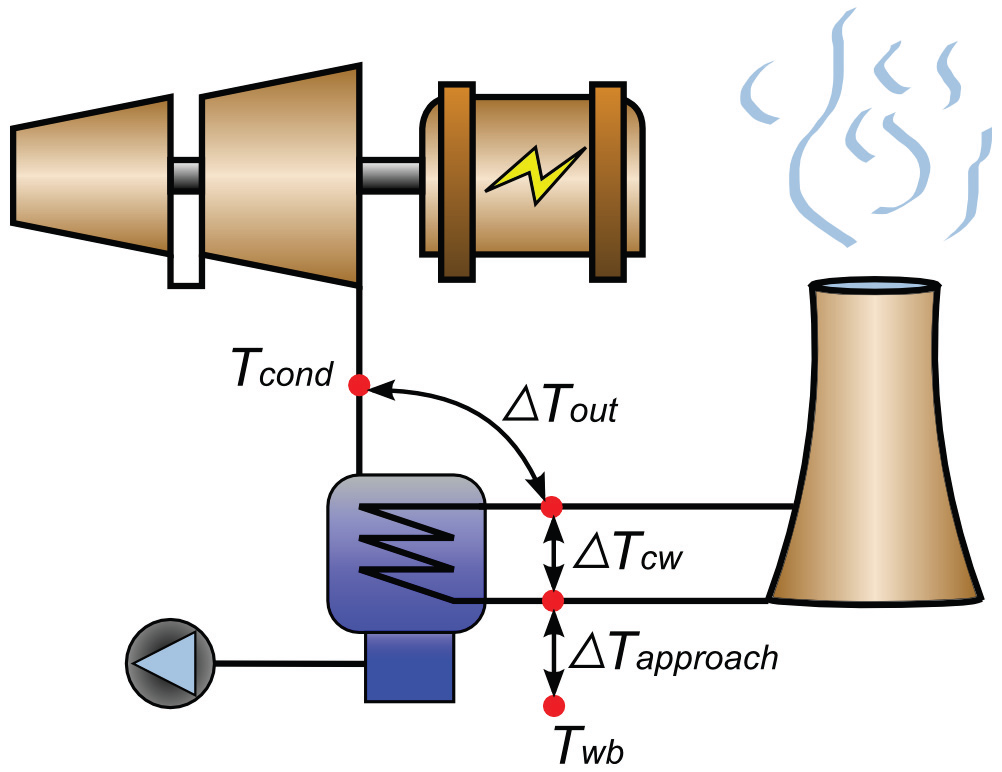

**Figure 24: An illustration of the various temperature rises that influence the condenser pressure for a wet-cooled system. These include the ambient wet-bulb temperature, the approach temperature, the cooling water temperature rise, and the heat exchanger hot side temperature difference.**

$$T_{cond}=T_{wb}+\Delta T_{approach}+\Delta T_{cw}+\Delta T_{out} \tag{3.16}$$

Condenser pressure is the most important performance metric provided by the cooling model. However, two other outputs are of interest; these are parasitic power consumption and water use. The parasitic load for a forced-draft cooling tower is driven by the circulating water pump power and the fan power to maintain airflow through the system. System Advisor models both of these parasitics.

The pumping power is calculated by using a simple constant isentropic efficiency. The enthalpy and entropy of the cooling water at the pump inlet are obtained using property relations in Table 15. Temporarily assuming no irreversibilities, the pump outlet enthalpy is:

$$h_{cw,out,s}=\frac{\Delta P_{cw}}{\rho_{cw}}+h_{cw,in} \tag{3.17}$$

The actual enthalpy at the pump outlet is calculated by applying the isentropic efficiency.

$$h_{cw,out}=h_{cw,in}+\frac{h_{cw,out,s}-h_{cw,in}}{\eta_{pump,s}} \tag{3.18}$$

The total power consumed by the cooling water pump is calculated in Eq.[3.19].

$$\dot{W}_{cw,pump}=\frac{\left(h_{cw,out}-h_{cw,in}\right)\ \dot{m}_{cw}}{\eta_{ pump}} \tag{3.19}$$

The wet cooling model calculates fan power with the assumption that the ratio of air mass flow to cooling water mass flow is constant according to the fraction \(r_{mass,fan}\) from Table 14. Thus, parasitic fan power is reduced during part load when the mass flow rate of cooling water is reduced. The moist air moved by the fan is at an effective temperature somewhere between the ambient wet and dry-bulb temperatures plus the approach temperature. This value is approximated as:

$$T_{fan,in}=\frac{T_{db}+T_{wb}+\Delta T_{approach}}{2} \tag{3.20}$$

Fan power is proportional to the enthalpy increase across the fan. This enthalpy rise can be approximated by assuming that ambient air behaves as an ideal gas. In this case, the air temperature at the outlet of the fan is calculated assuming no thermodynamic irreversibilities (the temperatures are absolute), where $R=\frac{8314}{28.97}\left[\frac{J}{kg\;K}\right]$ is the gas constant for air.

$$T_{fan,out,s}=T_{fan,in}\ r_{p,fan}^{\left(\frac{R}{c_{p,air}}\right)} \tag{3.21}$$

The isentropic enthalpy at the fan outlet is determined directly as a function of this outlet temperature from the relations in Table 15, and the actual outlet enthalpy is calculated by considering the isentropic fan efficiency.

$$h_{fan,out}=h_{fan,in}+\frac{h_{fan,out,s}-h_{fan,in}}{\eta_{fan,s}} \tag{3.22}$$

Finally, we calculate fan power and total cooling parasitic power as:

$$\dot{W}_{fan}=\frac{\left(h_{fan,out}-h_{fan,in}\right)\ \dot{m}_{air}}{\eta_{ fan}} \tag{3.23}$$

$$\dot{W}_{cool}\left[MW\right]=\left(\dot{W}_{cw,pump}+\dot{W}_{fan}\right) \cdot\left[\frac{1\ MW}{10^{6}\ W}\right] \tag{3.24}$$

The cooling tower water use is a straightforward calculation that accounts for evaporative loss,drift loss, and cooling tower blowdown. The latter two calculations are dependent on the cooling water mass flow rate, while the former only depends on the heat rejection load and the enthalpy of evaporation, which is a function of ambient pressure.

$$\dot{m}_{evap} = \frac{\dot{q}_{rej}}{\Delta h_{evap}}$$
$$\dot{m}_{drift} = f_{drift}\;\dot{m}_{cw}$$
$$\dot{m}_{ctbd} = f_{ctbd}\;\dot{m}_{cw}$$
$$\dot{m}_{water} = \dot{m}_{evap}+\dot{m}_{drift}+\dot{m}_{ctbd} \tag{3.25}$$

### 3.3.4 Dry cooling model

The dry cooling model makes use of the user-supplied inputs and assumed values that are summarized in Table 16. Property relations are borrowed from the wet cooling model.

| Variable       | Description                                              | Units   | Value |
|----------------|----------------------------------------------------------|---------|-------|
| **User-supplied inputs** |                                         |         |       |
| $T_{ITD,des}$  | The initial temperature difference (steam-to-ambient)  | ${}^{\circ}C$ | 16    |
| $r_{p,cond}$   | The condenser air pressure ratio                         | -       | 1.0028|
| **Inherited inputs**     |                                         |         |       |
| $W_{des}$      | Power output at design                                   | MW      | -     |
| $\eta_{des}$   | Power cycle efficiency at design                         | -       | -     |
| $T_{db}$       | Dry bulb temperature                                     | ${}^{\circ}C$ | -     |
| $P_{amb}$      | Atmospheric pressure                                     | Pa      | -     |
| **Assumed values**       |                                         |         |       |
| $\Delta T_{out}$ | Temperature difference at the hot side of the condenser | ${}^{\circ}C$ | 3     |
| $\eta_{fan,s}$  | Fan isentropic efficiency                               | -       | 0.80  |
| $\eta_{fan}$    | Fan mechanical efficiency                                | -       | 0.94  |
| $c_{p,air}$     | Specific heat of air                                     | $\frac{J}{kg\;K}$ | 1005  |


Like the wet cooling model, the cooling air flow generated by the fans is limited to either 100% or 50% flow relative to the design value. The design air mass flow rate is calculated in Eq.[3.26].

$$\dot{m}_{air,des}=\frac{\dot{q}_{rej,des}}{c_{p,air}\;\left(T_{ITD,des}-\Delta T _{out}\right)} \tag{3.26}$$

Since dry cooling systems don't consume appreciable amounts of water for use in cooling, the only metrics of interest are the condenser pressure and the parasitic fan power. Condenser pressure is determined by the condenser temperature, which is simply equal to the dry-bulb temperature plus the actual initial temperature difference(ITD) as illustrated in Figure 25. The ITD is the sum of the temperature rise of the air across the condenser and the hot-side temperature difference.

$$T_{cond} = T_{db}+T_{ITD}$$
_where:_
$$T_{ITD} = \Delta T_{out}+\frac{\dot{q}_{rej}}{\dot{m}_{air}\ c_{p,air}} \tag{3.27}$$

The relationship for parasitic fan power is analogous to the one previously developed for the wet cooling fan, except the fan inlet temperature is equal to the ambient dry-bulb temperature.

$$T_{fan,out,s} = T_{fan,in}\cdot r_{p,cond}^{\left(\frac{R}{c_{p,air}}\right)} \tag{3.28}$$
$$h_{fan,out} = h_{fan,in}+\frac{h_{fan,out,s}-h_{fan,in}}{\eta_{fan,s}}\tag{3.29}$$
$$\dot{W}_{fan}\left[MW\right] = \frac{\left(h_{fan,out}-h_{fan,in}\right)\ \dot{m}_{air}}{\eta_{ fan}}\cdot\left[\frac{1\ MW}{10^{6}\ W}\right] \tag{3.30}$$

### 3.3.5 Parallel hybrid cooling model

System Advisor models parallel hybrid cooling in addition to the wet and dry systems discussed above. This configuration places an undersized wet cooling system in parallel with a standard (or slightly undersized) ACC. An illustration of this concept is shown in Figure 26.

The hybrid cooling configuration has been identified in previous work [23][22] as a candidate technology that both reduces power plant water use and mitigates the negative performance impact of switching from wet to dry cooling. The technology is based on the premise that air cooling provides sufficient cooling capability during the majority of the plant's operating hours. However, performance for a dry cooling system is most negatively impacted during summer afternoon hours when both the ambient temperature and electricity sales revenue are highest. During these summer hours, the temperature rise of the cooling air stream across the ACC is relatively high, and placing a wet cooling system in parallel to share the heat rejection load reduces this temperature rise and improves cycle thermodynamic efficiency.

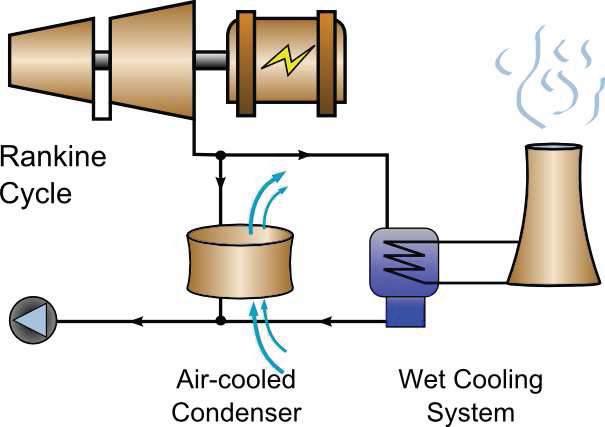

**Figure 26: An illustration of the parallel wet/dry cooling configuration is shown. The ACC (left) and wet system (right) share the heat rejection load.**



Unlike the exclusively wet cooling system whose performance tracks the wet bulb temperature, the hybrid system is forced to track the dry bulb temperature. Since the wet and dry cooling systems are interconnected, the condensing steam pressure is equal in both systems. If the steam pressure (and associated temperature) were to theoretically fall below the dry bulb temperature, thermal energy would begin flowing from the ambient air into the ACC, thus defeating the purpose of incorporating the dry cooling system. Therefore, hybrid system thermodynamic performance falls between the lower bound of a non-ideal dry cooling system, and the upper bound of an ideal dry cooling system (that is, an ACC that achieves a steam temperature equal to the ambient dry bulb temperature).

The distribution of the heat rejection load between the wet and dry cooling systems is specified by the user on the Power Cycle page using the Hybrid Dispatch fractions. Each of the input values corresponds to the particular TOD period specified by the user on the Thermal Storage page. For each time step during the simulation, the wet cooling load in the hybrid system will equal the total cooling load times the associated user-specified fraction. Thus, the total heat rejection load $\dot{q}_{rej}$ in the air cooled system is shown in Eq.[3.31] and the wet cooled system is shown in Eq.[3.32]. The fraction of wet cooling during the current timestep is denoted by $f_{wc}$. The valid range for the wet cooling fraction is $0\leq f_{wc}<1$.

$$\dot{q}_{rej,air} = (1-f_{wc})\ \dot{q}_{rej} \tag{3.31}$$
$$\dot{q}_{rej,wc} = f_{wc}\ \dot{q}_{rej} \tag{3.32}$$

The performance equations for the hybrid cooling configuration are nearly identical to the equations for the individual technologies presented above. The primary difference lies in the heat rejection load that each subsystem is required to accommodate and the change in this value relative to the design point. For a hybrid cooling system, the ACC is sized to accommodate the full heat rejection load throughout the year. The wet cooling system is sized to match it's largest required heat rejection load throughout the year. For example, if the user provides hybrid fractions of 0.25, 0.5, and 0.75 for three of the available hybrid fractions, then the wet cooling system will be sized to provide 0.75 (75%) of the total heat rejection load.

System Advisor calculates the condenser pressure for the hybrid system by first calculating the performance of each cooling system individually, then using the larger of the two condenser pressures as the actual achieved pressure.

$$P_{c}=\max\left[P_{c,wc},P_{c,ACC}\right] \tag{3.33}$$

Like the wet and dry technology models, the hybrid system models part-load behavior by assuming that the cooling equipment turns off incrementally when the condenser pressure falls below the minimum value. The part-load behavior is applied equally to the wet and dry systems (if both are operating) except in the case that the calculated wet cooling condenser pressure exceeds the dry cooling pressure. In this situation, System Advisor incrementally shuts down only the wet system until the minimum condenser pressure is satisfied. This control mechanism is implemented to reduce water use when possible.

## 3.4 Power cycle implementation

The power cycle has three possible main operating modes; these include complete shut down, "standby" operation, and normal operation. The normal operation mode is further broken down into mass-demand and power-demand modes. The operating modes are controlled externally by the plant control algorithm, and the conditions under which each mode is activated are discussed in detail in Section 4. Each of these modes is unique in the way inputs and outputs are handled, so each is discussed in detail in this section.

### 3.4.1 Normal operation

The "normal operation" mode encompasses all situations where the power cycle is producing power. Depending on the operating conditions, it may be advantageous to either require that the power cycle produce a target power and require the corresponding HTF mass flow rate, or alternatively a HTF mass flow rate may be provided and the power output calculated. System Advisor automatically determines the best option based on the ability of the solar field, storage system, and/or the auxiliary heater to fully meet the design-point thermal power for the power cycle.

In the target-power situation, the power cycle model uses the time-of-use adjusted16 target power value \(\dot{W}_{dem}\) to determine a guess-value for the HTF mass flow rate. This initial guess is recalculated at each time step to correspond to possible changes in the demand power value.

$$\dot{m}_{htf,ref}=\frac{\dot{Q}_{des}}{c_{htf}\cdot\left(T_{htf,hot,des}-T_{ htf,cold,ref}\right)}\cdot\frac{\dot{W}_{dem}}{\dot{W}_{des}} \tag{3.34}$$

_Where:_

$$\dot{W}_{dem}=\dot{W}_{des}\,f_{tou,pb} \tag{3.35}$$

Using the guess mass flow rate and the provided HTF inlet temperature and condenser pressure (which is concurrently iterated), the model calculates the power output and heat absorption using the regression model described in Section 3.2. Since the cooling models determine condenser pressure as a function of ambient temperature and heat rejection load, and since heat rejection load may change during power cycle iteration, the cooling model must be called initially to estimate performance and be re-called during each iteration. The convergence error is based on the relative difference between the calculated cycle power output and the desired output.

$$err=\frac{\dot{W}_{calc}-\dot{W}_{dem}}{\dot{W}_{dem}} \tag{3.36}$$

If the convergence error is greater than the lower limit of $err=10^{-6}$, the mass flow rate is subsequently adjusted according to Eq.[3.37], and the iterative solution continues. This adjustment equation was selected based on empirical observations of calculation speed andoutput stability. The maximum number of power cycle iterations is set to 100.

$$adj=1+\frac{\dot{W}_{dem}-\dot{W}_{calc}}{3\cdot\dot{W}_{dem}} \tag{3.37}$$

Once the iterative mass flow solution is found, this information is passed to the controller component which iterates to find an agreeable system solution. If no iterative solution can be found, or if the solution returned by the power cycle fails to satisfy all of the bounds in Table 17, power output and cycle efficiency are set to zero, the HTF outlet temperature is set to the inlet temperature, and the demand mass flow rate is set to the reference mass flow rate.

| Conditions                                    |
|-----------------------------------------------|
| $\eta_{cycle} \leq 1$                         |
| $\eta_{cycle} > 0$                            |
| $T_{htf,cold} \leq T_{htf,hot}$               |
| $T_{htf,cold} \geq T_{htf,cold,des} - 50$     |

**Table 17: Double-check criteria for the converged power cycle solution under normal operation.**

The target-mass flow strategy is the more straightforward approach. This mode is used when insufficient thermal energy is provided by the solar field, storage system, and/or the auxiliary heater to meet the full-load thermal requirement of the power cycle. In this operating mode, the plant controller provides a particular HTF mass flow rate to the power cycle. The power cycle responds by calculating power output in a once-through manner - no internal iteration is required.

### 3.4.2 Shutdown and cold startup

The second mode of operation for the power cycle involves a complete shutdown of the system. The more obvious features of this mode include setting power output, cycle efficiency, HTF demand mass flow rate, water use, and parasitic loads for the power cycle to zero. During shutdown, the HTF outlet temperature is equal to the HTF inlet temperature since no thermal energy is consumed by the power cycle and the thermal losses from the power cycle equipment are assumed to be negligible.

Once the power cycle enters shutdown, cold startup of the turbine requires the full time and energy specified by the user. Startup can occur once a thermal resource becomes available. Cycle startup is constrained by a time duration and a thermal fraction. The startup time requirement is checked during each time step, and the startup algorithm can handle both startup times that are longer and shorter than the time step duration. For longer startup times, the remaining startup time ($\Delta t_{start,remain}$) is tracked as a ledger balance. So long as the remaining startup time exceeds the duration of the time step ($\Delta t$), the cycle remains completely shut down.

If the remaining startup time (or initial startup time) is less than the duration of the time step, or if the remaining startup energy falls below the startup energy requirement, then the power production from the cycle is reduced during the time step. System Advisor calculates the startup energy requirement by using the energy fraction specified by the user ($f_{start}$), as shown in Eq.[3.38].

$$E_{start}=f_{start}\ \frac{\dot{W}_{des}}{\eta_{cycle,des}\,\Delta t} \tag{3.38}$$

Once thermal energy is available for use in the power block, it contributes to fulfilling the startup energy requirement. The remaining startup energy at the end of the time step ($E_{start,remain}$) is equal to the difference between the startup energy at the beginning of the time step ($E_{start,remain0}$) and the total amount of startup energy that is "used" during the time step. The startup energy used is equal to:

$$E_{start,used}=\min\left[\frac{\dot{W}_{des}}{\eta_{cycle,des}}\ \Delta t,E_{start,remain0}\right] \tag{3.39}$$

The remaining startup energy at the end of the time step is calculated by subtracting the used startup energy, and the final remaining startup energy value is limited to be greater than or equal to zero.

$$E_{start,remain}=\max\left[E_{start,remain0}-E_{start,used},0\right] \tag{3.40}$$

The power cycle power output and the required mass flow rate both require adjustment during startup. However, they are adjusted differently since the power cycle requires HTF mass flow during startup even while it does not produce usable power. The adjustment method is shown in Eq.'s[3.41 - 3.42], where the unadjusted values are denoted with the superscript "${}^{\circ}$".

$$\dot{W}_{cycle} = \dot{W}_{cycle}^{\circ}\ \max\left[\min\left[\frac{\Delta t_{start, remain}}{\Delta t},1\right],\frac{E_{start,used}}{\frac{\dot{W}_{des}}{\eta_{des}}\ \Delta t}\right] \tag{3.41}$$
$$\dot{m}_{pb} = \dot{m}_{pb}^{\circ}\ \left(1-\max\left[\min\left[\frac{\Delta t_{ start,remain}}{\Delta t},1\right]-\frac{E_{start,used}}{\frac{\dot{W}_{des}}{\eta_{des}} \Delta t}\right],0\right) \tag{3.42}$$

### 3.4.3 Standby operation

The amount of time needed to start up the power cycle from a cold state is an important consideration in CSP systems. For certain systems, it may be advantageous to use energy from thermal storage to maintain the power cycle in a warmed and ready state rather than starting up from a cold shutdown state. Unlike cold startup, System Advisor models a restart from standby mode as instantaneous, and reinitializing power cycle operation doesn't require waiting for the startup time or energy fraction. System Advisor models this situation by providing a "standby" option for the power cycle. This mode is defined by a maximum standby time duration ($\Delta T_{sby}$) and a standby fraction ($f_{sby}$). The time duration limits the number of consecutive hours that the system can operate in standby mode. The standby fraction defines the thermal energy required to maintain the power cycle in a ready state, where the fraction is the ratio of standby thermal demand to full-load design point demand.

The mass flow rate of HTF needed to maintain standby operation is calculated based on the temperature of the HTF at the power cycle inlet. The HTF is assumed to be returned to the heat source at the design HTF outlet temperature. Thus, the thermal load required is:

$$\dot{q}_{sby}=\frac{\dot{W}_{des}}{\eta_{cycle,des}}\;f_{sby} \tag{3.43}$$

and the associated required mass flow rate is:

$$\dot{m}_{sby}=\frac{\dot{q}_{sby}}{c_{htf}\left(T_{htf,hot}-T_{htf,cold,des}\right)} \tag{3.44}$$

Power output, cycle efficiency, cooling water use, and power cycle parasitics are set to zero in this mode.

### 3.4.4 Warm restart conditions

When encountering significant weather transients, the trough plant may need to temporarily stop electricity production and take the turbine and generator offline. Once the solar resource rebounds, electricity production may not resume immediately as the turbine inlet steam conditions and generator synchronization must be reestablished. This delay is modeled by System Advisor by enforcing a minimum restart time when the turbine trips. The user can specify this value on the Power Cycle page in the "Minimum power block restart time" field. When the turbine trips in the model, the control code enforces this minimum restart time before resuming electricity generation. Thermal energy captured during this time interval is used to either reheat the solar field or charge thermal storage (if available).

# 4 Thermal storage and plant control

Utility-scale CSP systems are unique in that they are both more complex and more flexible than other renewable energy systems in how energy is produced, utilized, and stored.

State-of-the-art trough plants include not just a solar field and power cycle but also a thermal storage subsystem that can be designed to dispatch anywhere from a few minutes to a day's worth of thermal energy. Some systems also include a fossil-fuel heater that can provide supplemental energy when solar-derived energy is unavailable. Decisions about when and in what proportions each of these subsystems should be utilized can have a significant impact on project profitability.

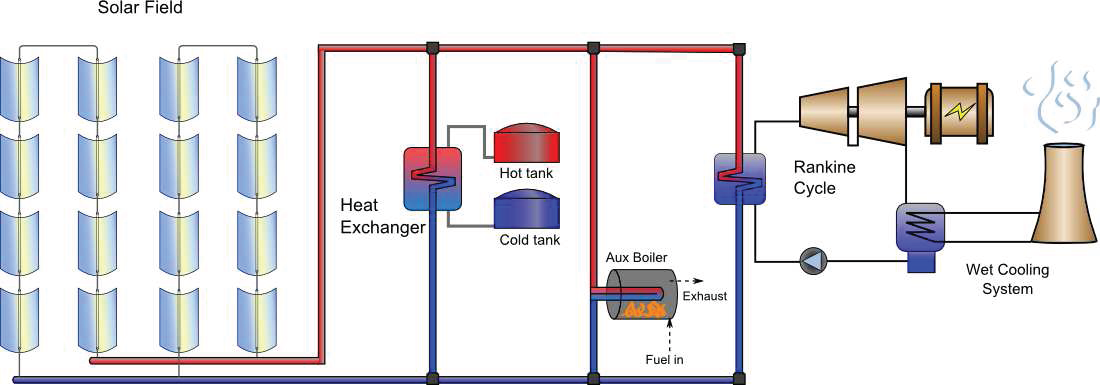

**Figure 27: The trough power plant subsystems include the solar field, piping, thermal storage, auxiliary heating, and the power cycle.**

A dispatch schedule is just one aspect of plant control. Practical limits on system performance are also required to maintain component health. This includes considerations for high wind speeds, peak power production limitations, minimum fluid levels in the storage tanks, and minimum fluid temperatures in storage. When all of these contingencies are amalgamated with proper dispatch control, the need for a detailed and inclusive control strategy is apparent. Section 4 describes the trough plant control strategy and the subsystems that are directly modeled within the controller code.

Though the balance-of-plant subsystems are generally autonomous like the solar field or power cycle, their relative simplicity lend them to be easily implemented in the control code. This is done as a practical consideration; consequently, the thermal storage tanks, field-to-storage heat exchanger, and auxiliary fossil heater are included in the balance-of-plant control volume.

## 4.1 Thermal storage

A utility-scale electric plant that is subject to intermittent outages during weather transients (like centralized PV and wind turbine farms) can create operation challenges for grids with high penetrations of renewable energy [18]. CSP is unique among renewable technologies in

its ability to cost-effectively store energy in a thermal energy storage (TES) system. Storage allows power production during temporary weather transients, shifting the operating hours to match peak demand, generally increasing the capacity factor of the plant, or supplying low-level heat to plant processes that require it (like maintaining the power cycle in a standby mode).

System Advisor models thermal storage for a two-tank system; that is, two tanks each are capable of holding the entire HTF volume for thermal storage. One tank is dedicated to storing the hot fluid while the other holds the exhausted cold fluid. The tanks are assumed to be fully thermally mixed so that no stratification occurs17.

### 4.1.1 TES Sizing

Thermal storage capacity is conventionally expressed in System Advisor in terms of equivalent full-load hours of TES. The magnitude of this value ("Full load hours of TES" on the Thermal Storage page) indicates the number of hours that thermal storage can supply energy to operate the power cycle at its full design point output. The realized number of storage hours is usually somewhat less than the number specified, since thermal losses and unavailable storage volume (see below) are not included in the sizing calculation. The total TES thermal capacity is equal to the design-point power cycle thermal requirement times the total number of desired storage hours ($\Delta t_{\mathit{tes}}$). The design-point cycle efficiency $\eta_{cycle,\mathit{des}}$ is constant and equal to the value specified on the Power Cycle page.

$$E_{\mathit{tes}}=\frac{\dot{W}_{\mathit{des}}\ \Delta t_{\mathit{tes}}}{\eta_{ cycle,\mathit{des}}} \tag{4.1}$$

System Advisor calculates the actual volume of HTF required to match this energy content using average material property values for the hot and cold tank design temperatures.

$$\overline{V}_{\mathit{tes}}=\frac{E_{\mathit{tes}}}{\rho_{\mathit{tes,ave}}\ c_{\mathit{tes,ave}}\ f_{\mathit{fix}}\ (T_{\mathit{sf,out}}-T_{\mathit{sf,in}})} \tag{4.2}$$

The design temperature difference is equal to the hot solar field outlet temperature ($T_{\mathit{sf,out}}$) minus the cold inlet temperature ($T_{\mathit{sf,in}}$) times the heat exchanger derate factor ($f_{\mathit{fix}}$). This factor is equal to the ratio of the realized temperature difference on the storage side of the heat exchanger to the solar field temperature difference. Alternatively, this ratio can be expressed in terms of the user-specified heat exchanger hot and cold side approach temperatures that are specified on the System Advisor Thermal Storage page ($T_{\mathit{hx,top}}$ and $T_{\mathit{hx,bot}}$, respectively). See Figure 30 on page 86 for a graphical illustration of these temperatures.

$$f_{\mathit{hx}}=1-\frac{\Delta T_{\mathit{hx,top}}+\Delta T_{\mathit{hx,bot} }}{T_{\mathit{sf,out}}-T_{\mathit{sf,in}}} \tag{4.3}$$

Tank geometry impacts not only the total area exposed to ambient air through which heat transfer can occur, but also determines the amount of unusable volume at the bottom of the tank (the "heel height"). System Advisor allows the user to specify a number of hot-cold tank pairs using the Parallel tank pairs input on the Thermal Storage page. System Advisor calculates the tank diameter required to contain the total storage volume, assuming that all storage tanks have the same geometry and meet both the user-specified requirements from the Thermal Storage page.

$$\overline{V}_{tes,1tanh} = \frac{\overline{V}_{tes}}{n_{pairs}} \tag{4.4}$$
$$D_{1tanh} = 2\,\sqrt{\frac{\overline{V}_{tes,1tanh}}{\pi\,H_{1tanh}}} \tag{4.5}$$

#### 4.1.2 Model formulation

Both the hot and cold tanks use the same tank model18 to simulate their behavior, although the inputs and outputs for each are managed separately. The basic premise for the storage tank is that the tank HTF volume varies according to difference between the inlet and outlet mass flow rate. Figure 28 shows a schematic of the tank model.

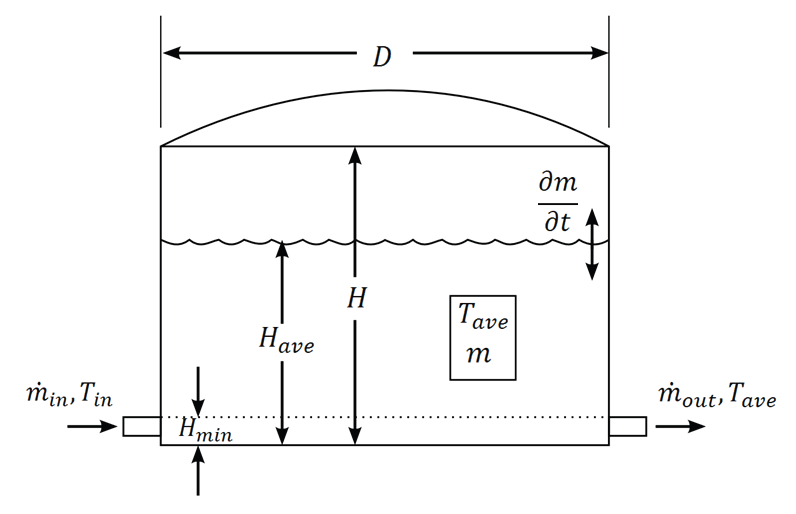

**Figure 28: A schematic of the variable-volume tank model. Fluid level varies with differences in the inlet and outlet mass flow rate. The outlet temperature is equal to the average of the fully mixed tank.**

Several tank calculations are functions of time and inlet/outlet conditions. Each call to the tank model requires information about not only what is happening in the system during the current time step, but at the end of the previous time step. The controller keeps track of the state of the hot and cold tank from time step to time step and passes this information to the tank (specifically, the mass and temperature of the HTF in each tank are tracked). The mass of HTF in the tank at the end of the current time step is equal to:

$$m_{fin}=m_{0}+\Delta t\;\left(\dot{m}_{in}-\dot{m}_{out}\right) \tag{4.6}$$

Calculating the temperature at the end of the current time step is not as elementary as the mass balance in Eq.[4.6]. Since the HTF temperature varies over the time step, thermal losses from the tank also vary. When the tank energy balance is expressed analytically, the resulting differential equation contains several variables that are functions of time, and this complicates the solution for final HTF temperature. The tank can be conceptualized as the simplified control volume in Figure 29.

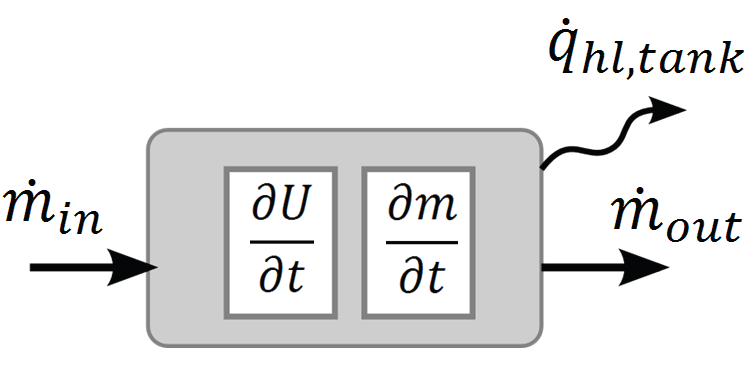

**Figure 29: Conceptual representation of the tank control volume.**

Equation [4.7] expresses the energy balance on the tank control volume according to the first law of thermodynamics.

$$\frac{\partial\left(u(t)m(t)\right)}{\partial t}=-\dot{q}_{hl, tank}(t)+\dot{m}_{in}\;h(T_{in})-\dot{m}_{out}\;h(T(t)) \tag{4.7}$$

The internal energy $u(t)$, mass $m(t)$, and heat loss $\dot{q}_{hl, tank}(t)$ are all functions of time. The internal energy is equal to the specific heat of the HTF in the tank times the HTF temperature at time $t$ with respect to some arbitrary reference temperature $T_{ref}$. The mass in the tank can be calculated by adding the initial mass to the time multiplied by the difference in inlet and outlet mass flow rates. Finally, the heat loss is equal to the heat transfer coefficient ($UA$) times the temperature difference between the HTF at time $t$ and the ambient temperature for the given time step. Like internal energy, enthalpy is also a function of temperature for an incompressible fluid. Since the specific heat remains approximately constant under nearly all practical conditions over the duration of a single time step, the enthalpy equation can be expressed as shown in Eq.[4.11].

$$u(t) = c_{htf}\;(T(t)-T_{ref}) \tag{4.8}$$
$$m(t) = m_{0}+t\;(\dot{m}_{in}-\dot{m}_{out}) \tag{4.9}$$
$$\dot{q}_{hl,tank}(t) = UA\;(T(t)-T_{amb}) \tag{4.10}$$
$$h(t) = c_{htf}\;(T(t)-T_{ref}) \tag{4.11}$$

These equations are substituted into Eq.[4.7], and the resulting ordinary differential equation (ODE) expresses the tank temperature as a function of time.

$$c_{htf}\;(\dot{m}_{in}-\dot{m}_{out})\;(-T_{ref}+T(t))+c_{htf}\; (m_{0}+(\dot{m}_{in}-\dot{m}_{out})\;t)\frac{\partial T}{\partial t}$$
$$=c_{htf}\;\dot{m}_{in}\;(T_{in}-T_{ref})-UA\;(-T_{amb}+T(t))-c_{ htf}\;\dot{m}_{out}(-T_{ref}+T(t)) \tag{4.12}$$

This linear ODE can be solved for temperature. The resulting equation is a function of time, and the reference temperature $T_{ref}$ cancels out in calculation.

$$T(t)=A_{2}+\left[c_{htf}(m_{0}+A_{1}\;t)\right]^{\left(-\frac{A_{0}}{A_{1}} \right)}.C \tag{4.13}$$

_Where:_

$$A_{0} = \dot{m}_{in}+\frac{UA}{c_{htf}}$$
$$A_{1} = \dot{m}_{in}-\dot{m}_{out}$$
$$A_{2} = \frac{\dot{m}_{in}\;T_{in}+T_{amb}\;\frac{UA}{c_{htf}}}{A_{0}}$$

The constant $C$ is solved by enforcing the initial boundary condition, where the tank temperature $T(0)=T_{0}$.

$$T(t)=A_{2}+\frac{1}{A_{0}}\;\left[(c_{htf}\;m_{0})^{\left(-\frac{A_{0}}{A_{1} }\right)}\;\left(c_{htf}(m_{0}+A_{1}\;t)\right)^{\left(-\frac{A_{0}}{A_{1}} \right)}\;A_{3}\right] \tag{4.14}$$

_Where:_

$$A_{3}=c_{htf}\;\dot{m}_{in}\;(T_{0}-T_{in})+UA\;(T_{0}-T_{amb})$$

The final HTF temperature at the end of the time step is calculated by replacing $t$ with the time step value $\Delta t$. We are also interested in the average temperature over the whole time step since this information is used as the temperature output from the model. The expression for average temperature as a function of time is derived by integrating Eq.[4.14] with respect to $t$, then dividing by the duration of the time step. The constant of integration is evaluated by enforcingthe boundary condition where $T_{ave}(0)=T_{0}$.

$$T_{ave}(t)=T_{0}+A_{4}+\frac{1}{A_{0}}\ \left[t\ (c_{htf}\ \dot{m}_{in}\ T_{in}+T_{amb}\ UA)+Eq.[4.14]\right] \tag{4.15}$$

_Where:_

$$A_{4}=\frac{c_{htf}\ m_{0}\ (c_{htf}\ \dot{m}_{in}\ (T_{0}-T_{in})+(T_{0}-T_{amb} )\ UA)}{(c_{htf}\ \dot{m}_{in}+UA)(c_{htf}\ \dot{m}_{out}+UA)}$$

Total heat loss is calculated implicitly in Eq.s[4.13 - 4.15] as a function of time, but is expressed more directly as a function of the average HTF temperature. This heat loss coefficient ($UA$) captures both the area-specific heat transfer coefficient specified on the Thermal Storage page and the total surface area of all the tanks.

$$\dot{q}_{tank,hl}=UA\cdot(T_{ave}-T_{amb}) \tag{4.16}$$

_Where:_

$$UA=\gamma_{tank}\left(\frac{\overline{V}_{tes}}{H\cdot n_{pairs}}+\pi\,D_{1 tank}\ H\right)n_{pairs}$$

### 4.1.3 Storage freeze protection

The tank model includes the option for freeze protection. The minimum allowable fluid temperature is equal to the "Tank heater set point" specified by the user on the Thermal Storage page. During time steps where the fluid temperature falls below this value, heat is added to the fluid until either the minimum temperature is maintained, or until the maximum heating rate is achieved. Heat may be required either because of heat loss directly from the volume in the tank, or because of below-temperature flow out of the tank. Heat addition is calculated based on the volume and temperature of the HTF at the very end of the time step.

$$\dot{q}_{ht,vol}=c_{htf}\ \overline{V}_{fin}\ (T_{setpoint}-T_{fin}) \tag{4.17}$$

The temperature of the outgoing flow must also be maintained at the minimum allowable temperature.

$$\dot{q}_{ht,flow}=c_{htf}\ \dot{m}_{out}\ (T_{setpoint}-T_{fin}) \tag{4.18}$$

Provided that the total tank heat trace heating rate \(\dot{q}_{ht,tot}\) is less than the maximum value, the average and final tank temperatures are recalculated.

$$T_{fin}=T_{0}+\Delta t\frac{\dot{q}_{ht,vol}}{c_{htf}\,\rho_{htf}\,\overline{ V}_{fin}} \tag{4.19}$$

## 4.2 Indirect storage heat exchanger

Most parabolic trough systems use oil as the heat transfer fluid in the solar field. However, the cost of this fluid can be prohibitively high for the large volumes of the TES system. A less expensive approach uses oil in the field and an alternative HTF like molten nitrate salt in the storage system. So-called "indirect" storage requires an intermediate heat exchanger between the oil in the solar field and the salt in storage. System Advisor models this heat exchanger with the effectiveness-NTU method [17] for a counter-flow arrangement (shorthand $\epsilon-NTU$).

System Advisor automatically determines the size of the heat exchanger with information provided by the user and with calculated design-point values when the user-specified storage fluid is different from the solar field HTF. A necessary consequence of heat transfer is the presence of a temperature drop on both sides of the heat exchanger between the heat source fluid and the heat sink fluid. Figure 30 shows how the hot and cold side approach temperatures relate to the physical system.

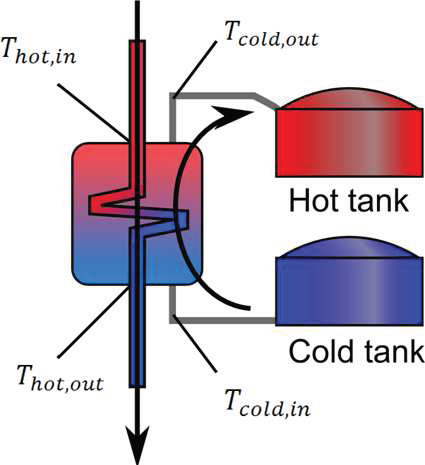
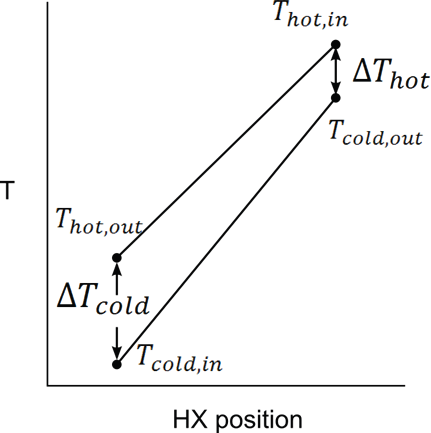

**Figure 30: The indirect storage heat exchanger is defined by the hot and cold side approach temperatures. A sketch of the physical system arrangement (left) corresponds to a plot of the temperatures in the heat exchanger as a function of position (right).**

### 4.2.1 Heat exchanger sizing

The temperature drops across the heat exchanger and its total duty determine the heat exchanger's heat transfer size ($UA$). Heat exchanger duty corresponds to the difference between the power cycle's thermal energy absorption rating ($\dot{w}_{des}/\eta_{des}$) and the thermal energy produced by the solar field at design. The solar multiple ($SM$) represents the ratio of solar field to power cycle thermal capacities at design, thus:

$$\dot{q}_{duty}=\dot{q}_{sf,des}-\dot{Q}_{des}=(SM-1)\ \dot{Q}_{des} \tag{4.20}$$

The design calculations assume a charging cycle where the solar-field-side HTF is the hot stream and the storage-side HTF is the cold stream. As indicated in Figure 30, the approach temperature differences are equal to the difference between the hot and cold streams at common sides of the heat exchanger. In other words, the "top" approach temperature is defined as the temperature difference between the hot stream inlet and the cold stream outlet, and the "bottom" approach is the hot stream outlet minus the cold stream inlet.

$$\Delta T_{hx,top} = T_{hot,in}-T_{cold,out} \tag{4.21}$$
$$\Delta T_{hx,bot} = T_{hot,out}-T_{cold,in} \tag{4.22}$$

The mass flow rates of the hot and cold streams at design are calculated from the known temperature drop/rise and the heat transfer duty. HTF specific heat is evaluated at the average stream temperature.

$$\dot{m}_{hx,hot} = \frac{\dot{q}_{duty}}{c_{hot}\ (T_{hot,in}-T_{hot,out})} \tag{4.23}$$
$$\dot{m}_{hx,cold} = \frac{\dot{q}_{duty}}{c_{cold}\ (T_{cold,out}-T_{cold,in})} \tag{4.24}$$

The $\epsilon-NTU$ method makes use of the capacitance rates (defined as the mass flow times the specific heat capacity) for the hot and cold streams. The relationship of interest is between the maximum and minimum capacitance rates, since the minimum rate sets the ceiling on the ideal heat exchanger performance as shown in Eq.[4.25]. The capacitance ratio is then calculated in Eq[4.26].

$$\dot{q}_{hx,max}=\dot{C}_{min}\ (T_{hot,in}-T_{cold,in}) \tag{4.25}$$

$$C_{R}=\frac{\dot{C}_{min}}{\dot{C}_{max}} \tag{4.26}$$

Heat exchanger effectiveness ($\epsilon$) quantifies the ratio of actual heat transfer to the maximum possible at design. The non-dimensional size of the heat exchanger is given in terms of the effectiveness value using semi-empirical relationships specific to each heat exchanger configuration. Eq.[4.27] gives the relationship for the counter-flow heat exchanger that ismodeled in System Advisor.

$$NTU=\frac{\log\left[\frac{1-\epsilon\cdot C_{R}}{1-\epsilon}\right]}{1-C_{R}} \tag{4.27}$$

Eq.[4.27] requires practical limits for the argument of the _log_ function and for the denominator. If the capacitance ratio happens to be equal to 1.0, NTU is instead calculated with Eq.[4.28], according to [17].

$$NTU=\frac{\epsilon}{1-\epsilon} \tag{4.28}$$

In the situation that the argument of the _log_ function is less than 1, the simulation returns with an error. The user must correct this situation by adjusting the approach temperatures until a suitable heat exchanger size is achieved.

The dimensional size of the heat exchanger (UA) is equal to the product of the non-dimensional size and the minimum capacitance rate. This value is used during hourly simulation calculations to determine heat exchanger performance.

$$UA=NTU\cdot\dot{C}_{min} \tag{4.29}$$

### 4.2.2 _Heat exchanger performance model_

The heat exchanger can operate in one of two modes depending on whether storage is charging or discharging. Both modes are designed to calculate the storage-side mass flow rate required given a mass flow rate on the solar field side. Both modes also maintain the specified approach temperatures on both sides of the heat exchanger.

The solar field produces a particular amount of thermal energy during operation according to the performance limitations of the field components. The power cycle has priority in consuming the amount of thermal energy that it requires to match the desired power cycle output, and the balance goes to storage. Consequently, the process of charging storage in an indirect system entails passing the balance of the unused HTF through the heat exchanger and simultaneously pumping the cold storage HTF through the heat exchanger to extract thermal energy from the solar field HTF. The remaining unconstrained variable after calculating the approach temperatures, solar field-side mass flow rate, and the $UA$ is the storage-side mass flow rate.

#### Storage charge mode

During storage charging, heat transfer across the heat exchanger is calculated based on the known inlet temperature and approach temperatures. The solar field provides the thermal energy source - or the hot stream - and storage provides the thermal sink stream. The stream inlet/outlet temperatures reflect this arrangement.

$$T_{hot,out} = T_{cold,in}+\Delta T_{hx,cold} \tag{4.30}$$
$$T_{cold,out} = T_{hot,in}-\Delta T_{hx,hot} \tag{4.31}$$

The heat exchanger duty is calculated:

$$\dot{q}_{duty}=\dot{m}_{hx,hot}\ c_{hot}\ (T_{hot,in}-T_{hot,out}) \tag{4.32}$$

The storage charge mass flow rate (from cold tank to hot tank) is then determined to match the required temperature difference and the heat transfer duty.

$$\dot{m}_{hx,cold}=\frac{\dot{q}_{duty}}{c_{cold}\ (T_{cold,out}-T_{cold,in})} \tag{4.33}$$

Specifying the approach temperatures, mass flow rate, and \(UA\), may lead to a situation where more heat transfer is calculated than is physically possible (i.e. \(\epsilon>1\)). System Advisor checks for this condition and returns a warning so that the set-point approach temperatures can be adjusted for future simulations. The effectiveness is calculated during performance for a counter-flow heat exchanger [17].

$$\varepsilon=\frac{1-e^{-NTU\ (1-C_{R})}}{1-C_{R}\ (-NTU\ (1-C_{R}))} \tag{4.34}$$

If the capacitance ratio $C_{R}$ happens to equal 1.0, the appropriate equation is instead:

$$\varepsilon=\frac{NTU}{1+NTU} \tag{4.35}$$

#### Storage discharge mode

During storage discharge, storage becomes the thermal resource and the solar field (and eventually the power cycle) side is the thermal sink. However, storage does not provide an arbitrary amount of thermal energy to the power cycle; rather, the power cycle requires a particular thermal power to produce the required electrical output. Even though the thermal roles of the two streams have been reversed, in this case the controlling role of the power cycle dictates that the heat exchanger performance be restricted by the cold flow.

Whereas the cold mass flow rate was the dependent variable calculated in Eq.[4.33], here the hot mass flow rate is calculated.

$$\dot{m}_{hot}=\frac{\dot{q}_{duty}}{c_{hot}\ (T_{hot,in}-T_{hot,out})} \tag{4.36}$$

The temperature relationships provided in Eq.'s[4.30] and [4.31] still apply, except that now the hot stream refers to storage and the cold to the solar field side. Therefore, the achieved HTF temperature on the solar field side during discharge is less than the original solar field outlet charging temperature by $2\times\Delta T_{hx,hot}$.

## 4.3 Auxiliary heater

A fossil-fired auxiliary heater is included in some systems to supply thermal energy during times of no solar resource or when storage cannot fully meet the required load. Solar advisor models a simple fossil-fuel burning auxiliary heater that generates heat for use in power production. The auxiliary heater is controlled by the dispatch controls on the Thermal Storage page. It is automatically limited to a maximum heating rate equal to the power cycle design thermal input. Control is discussed in more detail in Section 4.4.

When the aux heater is in operation, energy is added to the HTF flowing through the heater until the HTF reaches the setpoint temperature or until the heater reaches the maximum heat production rate. The setpoint temperature is a user-specified input on the Thermal Storage page. The achieved outlet temperature is calculated as the minimum of either the setpoint temperature or the temperature achieved by using the maximum heating rate.

$$T_{aux,out}=\min\left[T_{aux,set},T_{in}+\frac{\dot{q}_{aux,max}}{\dot{m}_{ aux,htf}\,c_{htf}}\right] \tag{4.37}$$

The fluid's specific heat is evaluated at the HTF temperature at the heater inlet. The total thermal energy transfer to the fluid is proportional to the achieved temperature rise in the HTF.

$$\dot{q}_{aux}=\dot{m}_{aux,htf}\,c_{htf}\,(T_{aux,out}-T_{in}) \tag{4.38}$$

Fuel usage is an important metric in the performance of the auxiliary heater. The energy content of the fuel usage is measured in the units $MMBTU$. Assuming thermal losses from the heater are negligible, the fuel usage relates to the total energy usage by the heating value. Solar advisor uses the lower heating value (LHV) efficiency to estimate fuel energy content.

$$E_{fuel}=\frac{\dot{q}_{aux}}{\eta_{LHV}}\,\Delta t\times\left[3.412\times 1 0^{-6}\,\frac{\rm{MMBTU}}{W-hr}\right] \tag{4.39}$$

### Plant control

The plant controller is the hub of calculation activity in the parabolic trough model. The controller ensures that the system operates to meet user-specified requirements, thermal energy requirements of the power cycle, and the energy resource available from the solar field, thermal storage, and auxiliary heater. The controller also determines how and when the solar field is used. For example, if TES is full and the power cycle is running at full capacity, the controller must detect the situation and adjust the solar field by forcing a reduction in total thermal output to avoid overheating the HTF, which would have disastrous consequences in a real system.

### 4.4.1 Controller background and approach

Though several metrics can be used in controlling plant operation, System Advisor's primary metric for controlling the trough system is the HTF mass flow rate through the system. Mass flow must always balance regardless of the temperature or energy considerations. Thus, the mass flow rate is the most important control metric employed in this control strategy. HTF temperature is also important; temperatures outside of the acceptable range for the equipment or for the fluid itself can damage equipment and have other negative consequences. Mass flow rates are controlled to avoid undesirable temperatures in the system. The last control metric is thermal energy flow. This is a secondary quantity based on mass flow, temperature, and specific heat that is useful in allocating mass flow appropriately. The thermal energy flow and HTF temperature are used together to distribute mass flow to ensure that the system requirements and power cycle demand are satisfied.

The general control strategy approach satisfies power cycle demand by making use of resources in a prioritized order. A series of logical statements are used (as discussed below) to determine whether the power cycle demand can be met with only the solar field, with the solar field and with TES, or with the solar field, TES, and the auxiliary heater. Resources to meet power cycle demand are always used in order: (1) solar field, (2) thermal storage, (3) auxiliary heater. The final combination of contributing resources can be any permutation of these three options. However, when the allocation decisions are made, the availability of each resource is taken into account, including user-enforced limitations.

Two examples may help illustrate the control approach:

* First, consider a plant with thermal storage but without any backup auxiliary fossil heater. Consistent solar resource during the morning hours has allowed a substantial charge to build up in thermal storage. During these hours, power cycle demand is fully met by energy produced in the solar field. The controller allocates enough flow from the field to the power cycle to meet the demand, and the leftover flow is allocated to thermal storage. Suddenly, a cloud passes over the field, reducing its output to 50% of the power cycle requirement. The controller first allocates all of the solar field flow to the power cycle, but finds that this is insufficient to fully meet demand. It then calculates the available thermal energy in storage, and finds that enough is available to supplement the solar field flow and reach full power output.

* Second, consider a plant with storage _and_ an auxiliary fossil heater.

* Re-examining the scenario in the first example, we will still find that thermal storage fills the demand when the cloud passes over the field. But this time, the cloud cover persists and storage is slowly depleted as the solar field can only produce part of the required thermal energy. During the time step when storage is about to be fully depleted, the power cycle demand cannot be fully met by the combination of the solar field and thermal storage. The auxiliary heater is called on during this time step to supplement the load that isn't met by storage or the solar field.

### 4.4.2 Available mass flow

Making best use of the solar field, storage, and auxiliary heat requires knowledge of the thermal energy available from each in any given time step. For thermal storage, we need to know both the quantity of flow available for discharging and the available unfilled volume for charging the tank(s). Since mass flow is the primary control metric, we first need to determine the available mass flow from the three sources if they were to each fully operate during the current time step. The available solar field mass flow is simply the value that is provided to the controller by calculations in the solar field. Recall from Section 2.2 that the solar field controls mass flow to meet the outlet temperature setpoint.

Thermal storage is not so simple. Depending on the mode of operation, storage may be charging or discharging, so the controller needs to know the maximum charge and discharge mass flow rates (representing the rates if the tanks were to completely deplete their contents during the time step). The availability of storage is also limited by the minimum tank volume level and by the user-specified dispatch fractions referred to as time-of-use (TOU) controls on the Thermal Storage page.

The storage TOU fractions are applied on a volume basis. However, the HTF volume does not remain constant from time step to time step even when no flow enters or leaves storage because thermal losses change the specific volume of the fluid by changing the temperature. The controller keeps track of the HTF in storage by passing the HTF mass (rather than volume) from time step to time step.

Disregarding the TOU limitations, the available volumes in the hot and cold tanks at the beginning of the time step are then:

$$\overline{V}_{hot} = \overline{V}_{hot,0}-\overline{V}_{tot}\ \frac{H_{min}}{H_{ tank}} \tag{4.40}$$
$$\overline{V}_{cold} = \overline{V}_{cold,0}-\overline{V}_{tot}\ \frac{H_{min}}{H_{ tank}} \tag{4.41}$$

The HTF volume from the previous time step $\overline{V}_{(hot/cold),0}$ is equal to the stored mass value divided by the density of the storage HTF evaluated at the hot or cold tank temperature, respectively. The discharge mass flow rate depends on the available HTF in the hot tank after the TOU restrictions are enforced. The TOU period is determined by the user-specified control array on the Thermal Storage page and is assigned according to hour of the day, day of the week (weekday or weekend), month of the year, and the presence of the solar resource. The TOU fraction ($f_{tou,tes}$) is applied only to the "active volume" of HTF in the tank - that is, the volume that is between the minimum tank fluid level and the corresponding maximum level. This is represented in Eq.[4.42].

$$\overline{V}_{active}=\left(1-2\;\frac{H_{min}}{H_{tank}}\right)\cdot\overline{ V}_{tot} \tag{4.42}$$

The mass available for discharge is calculated as follows.

$$\dot{m}_{A,dis}=\left(\overline{V}_{hot}-\overline{V}_{active}\;f_{tou,tes} \right)\frac{\rho_{htf,hot}}{\Delta t} \tag{4.43}$$

Unlike discharging TES, charging TES is not subject to the dispatch fractions; only the minimum fluid level dictates the amount of charging that is possible. Therefore, the available storage charging mass flow rate is:

$$\dot{m}_{A,chg}=\overline{V}_{cold}\;\frac{\rho_{htf,cold}}{\Delta t} \tag{4.44}$$

Equations [4.43] and [4.44] describe the mass flow rate that is available on the storage side of the system. For direct storage systems, the flow available to the power cycle and the flow available from storage are equivalent. But for indirect systems, the available storage flow rates do not provide enough information on the flow that is actually achieved across the heat exchanger. Thus, initial calls to the heat exchanger model are required to establish the actual available storage mass flow rate.

The flow rate available from the auxiliary heater depends on the capacity of the heater and on the inlet temperature of the HTF. The flow rate is also scaled to the fossil fill fraction ($f_{tou,aux}$) controls on the Thermal Storage page. This is expressed as:

$$\dot{m}_{A,aux}=\frac{\dot{Q}_{des}}{c_{htf,aux}\;(T_{aux,set}-T_{pb,out})} \cdot f_{tou,aux} \tag{4.45}$$

The total available mass flow rate is the sum of all three possible sources.

$$\dot{m}_{A,tot}=\dot{m}_{A,sf}+\dot{m}_{A,dis}+\dot{m}_{A,aux} \tag{4.46}$$

### 4.4.3 Converting to thermal energy

Mass flow rate control is the proximate goal, but the ultimate purpose for controlling the plant is to meet the thermal load required by the power cycle. Mass flow rates only provide part of the equation in determining whether the stream entering the power cycle has enough thermal energy. This means that the mass flows and temperatures must be converted into thermal energy in order to be useful in control decisions.

The first step in this conversion involves determining the specific heat values of the HTF in the different streams so that the heat content can be accurately assessed. Specific heat varies with temperature for most HTF's, so System Advisor's ability to accurately characterize this value is important for model convergence. Eq. [4.47] provides the temperature values on which the specific heat calculations are based for the solar field, TES discharge, TES charge, and auxiliary heater streams.

$$c_{htf,sf} = cp\left(HTF,\frac{T_{sf,out}+T_{sf,in}}{2}\right)$$
$$c_{htf,dis} = cp\left(HTF,\frac{T_{tes,hot}+T_{pb,out}}{2}\right) \tag{4.47}$$
$$c_{htf,chg} = cp\left(HTF,\frac{T_{sf,out}+T_{tes,cold}}{2}\right)$$
$$c_{htf,aux} = cp\left(HTF,\frac{T_{aux,set}+T_{pb,out}}{2}\right)$$

The value $T_{tes,hot}$ is the temperature of the collector-side HTF that has been heated and is leaving storage. This temperature is equal to either the heat exchanger outlet temperature or the hot tank temperature, depending on the system configuration. Likewise, $T_{tes,cold}$ represents the temperature of the collector-side HTF that has been exhausted from charging storage and is returning to the solar field. This temperature can either be equal to the heat exchanger outlet temperature for indirect systems or the cold TES tank temperature for direct systems.

Using the specific heat values, the mass flow rates, and the temperature drops for each stream, the thermal energies are calculated.

$$\dot{q}_{A,sf} = \dot{m}_{A,sf}\:c_{htf,sf}\:(T_{sf,out}-T_{sf,in})$$
$$\dot{q}_{A,dis} = \dot{m}_{A,dis}\:c_{htf,dis}\:(T_{tes,hot}-T_{pb,out}) \tag{4.48}$$
$$\dot{q}_{A,chg} = \dot{m}_{A,chg}\:c_{htf,chg}\:(T_{sf,out}-T_{tes,cold})$$
$$\dot{q}_{A,aux} = \dot{m}_{A,aux}\:c_{htf,aux}\:(T_{aux,set}-T_{pb,out})$$

Any of these energy flows can be used to satisfy the power cycle demand that is calculated according to the design thermal energy load (see Eq.[3.6]) and the turbine dispatch fraction control ($f_{tau,pb}$) entered on the Thermal Storage page.

$$\dot{Q}_{dem}=\dot{Q}_{des}\:f_{tau,pb} \tag{4.49}$$

### 4.4.4 Control logic

The main controller logic tree19 makes use of the thermal energy calculations to select the operating mode. The following discussion moves step by step through each control decision, eventually considering the options for each statement. The logic first determines whether the field can fully supply the power cycle demand.

Footnote 19: The reader may find the control process flow diagram presented in Figure 31 on page 103 useful while reading this section.

$$\dot{q}_{A,sf}<\dot{Q}_{dem} \tag{4.50}$$

If the statement in Eq.[4.50] is true, then the solar field cannot supply all of the required thermal energy and the other thermal sources must be considered. The energy from thermal storage discharge and the auxiliary heater are added to the total energy subsequently until the total equals the demanded amount. First, for thermal storage, we check if the available energy meets demand:

$$\dot{q}_{A,sf}+\dot{q}_{A,dis}<\dot{Q}_{dem} \tag{4.51}$$

If the requirement is not met, then we know that the _actual_ mass flow rates for the solar field and TES discharge are equal to their maximum available flow rates. We can also infer that because the flow of thermal energy from the solar field is not sufficient to meet demand, the realized storage charging mass flow rate is zero.

$$\dot{m}_{sf} = \dot{m}_{A,sf} \tag{4.52}$$
$$\dot{m}_{dis} = \dot{m}_{A,dis} \tag{4.53}$$
$$\dot{m}_{chg} = 0 \tag{4.54}$$

Continuing in the situation where solar field mass flow and thermal storage do not meet the required load, the logic next determines whether the auxiliary heater can provide the remaining energy.

\[\dot{q}_{A,sf}+\dot{q}_{A,dis}+\dot{q}_{A,aux}<\dot{Q}_{dem} \tag{4.55}\]

The auxiliary heater has two modes of operation that can be selected by the user on the Thermal Storage page under the "Fossil dispatch mode" drop-down. The first mode -

**minimum backup level** - controls the auxiliary heater to maintain thermal production at the "Fossil fill fraction" specified in the dispatch control section. Fossil backup will only be provided when the solar field and thermal storage energy contributions fall below the Fossil fill fraction level (with respect to the design-point operation). The second mode - **supplemental operation** - forces the auxiliary heater to supply the difference in thermal energy between the design-point requirement and the solar field and TES contributions. When the combined solar field and TES contributions fall below the design-point requirement, the auxiliary heater produces energy up to the design point requirement while maintaining a total auxiliary contribution less than the Fossil fill fraction provided by the user.

If the auxiliary heater, TES, and the solar field cannot meet the demand load, then the auxiliary mass flow is also set equal to the maximum available flow. Now that all possible resources are accounted for, the total mass flow rate, heat input and power cycle inlet temperature can be calculated.

$$\dot{m}_{aux} = \dot{m}_{A,aux} \tag{4.56}$$

$$\dot{q}_{tot} = \dot{q}_{sf}+\dot{q}_{dis}+\dot{q}_{aux}$$
$$\dot{m}_{tot} = \dot{m}_{sf}+\dot{m}_{dis}+\dot{m}_{aux} \tag{4.57}$$
$$T_{pb,in} = \frac{\dot{m}_{sf}\ T_{sf,out}+\dot{m}_{dis}\ T_{tes,hot}+\dot{m} _{aux}\ T_{aux,set}}{\dot{m}_{tot}}$$

Moving back up the logic hierarchy, we must consider the alternatives to Eq.'s[4.51] and [4.55] being true. First, if Eq.[4.55] is false and the auxiliary heater is able to provide sufficient supplemental energy, then the auxiliary heater runs at part load according to the required balance of energy. In **minimum backup level** mode, Eq.'s[4.56] and [4.57] are instead:

$$\dot{q}_{aux} = \dot{Q}_{dem}\cdot f_{ou,aux}-(\dot{q}_{sf}+\dot{q}_{dis})$$
$$\dot{m}_{aux} = \frac{\dot{q}_{aux}}{c_{htf,aux}\ (T_{aux,set}-T_{pb,out})} \tag{4.58}$$
$$\dot{q}_{tot} = \dot{Q}_{dem} \tag{4.59}$$

In **supplemental operation** mode, the auxiliary heat equation becomes:

$$\dot{q}_{aux}=\min\left[\dot{Q}_{dem}-(\dot{q}_{sf}+\dot{q}_{dis}),\dot{Q}_ {dem}\cdot f_{tou,aux}\right] \tag{4.60}$$
Moving up again, we consider the alternative to Eq.[4.51] where thermal storage and the solar field are able to provide enough energy to the power cycle. Now the auxiliary heater mass flow and thermal energy contributions aren't needed, but the TES discharge rates require attention.

$$\dot{q}_{tot} = \dot{Q}_{dem} \tag{4.61}$$

$$\dot{q}_{tes,dis} = \dot{Q}_{dem}-\dot{q}_{A,sf}$$
$$\dot{m}_{tes,dis} = \frac{\dot{q}_{tes,dis}}{c_{htf,dis}\ (T_{tes,hot}-T_{pb,out})} \tag{4.62}$$

Equations [4.51] through [4.62] all apply to the situation where the solar field is unable to produce the required thermal energy for the power cycle. Two operating modes apply to this situation: mode 1 handles the case where the total thermal energy produced by all resources falls below the cycle cutoff fraction $f_{cutoff}$ (i.e. the minimum allowable thermal load handled by the power cycle), and mode 2 accommodates normal part-load operation. The mode is selected according to Eq.[4.63], where "true" corresponds to mode 1.

$$\dot{q}_{tot}<\dot{Q}_{des}\,f_{cutoff} \tag{4.63}$$

The final step back up the hierarchy reconsiders Eq.[4.50]. If this statement is false, then the solar field is able to supply all of the required power cycle load, and the logic must only decide whether the balance of energy from the solar field _not_ going to the power cycle can be placed in thermal storage. This is expressed in Eq.[4.64]. If the statement is true, then operating mode 3 is selected; otherwise, mode 4 is used.

$$\dot{q}_{A,sf}-\dot{Q}_{dem}>\dot{q}_{A,chg} \tag{4.64}$$

### 4.4.5 Operating modes

The four operating modes can be generally described as follows:

1. Operation below the minimum turbine cutout fraction
2. Part-load operation above the minimum turbine cutout fraction and below the design point power
3. Over-design operation where more energy is produced than can be used by the power cycle and/or storage
4. Over-design operation where all of the energy can be used in the power cycle and/or storage

The operating modes determine the defocusing methodology. Since defocusing is a highly implicit process affecting solar field energy collection and production, thermal losses, and other relationships, System Advisor employs an iterative defocusing process. Each operation mode defocuses in largely the same way, but each has nuances that are tuned to the operating conditions typically encountered within the mode. At the beginning of each time step (first iteration), the field defocusing value $f_{def}$ is set to 1.0, and subsequent iterations modify the initial value as conditions warrant. The defocusing equations do not always require that $f_{def}$ remain in the physical range between 0 and 1; however, limitations in the solar field calculations ensure that the defocusing fraction does not have deleterious effect on system performance calculations.

The iterative process for field defocusing can cause problems in convergence when field conditions during the current iteration differ significantly from conditions in the previous time step. To aid convergence, the defocusing calculations are scaled by a "relaxation parameter" $n_{c}$. The value of this coefficient was selected to be a function of the time step duration based on sensitivity analyses comparing total code run-time and the number of non-convergence instances. For a time step in seconds, the relaxation parameter is defined as:

$$n_{c}=0.9-\frac{3600[s]-\Delta t}{7200[s]} \tag{4.65}$$

Occasionally, the model conditions approach a border condition between operating modes and subsequent iterations result in constant switching between operating modes. The difference in calculated performance between operating modes is often very slight when performance falls on mode borders, so System Advisor enforces "sticky mode" operation. After 8 iterations within the same time step, the controller sticks with the operation mode selected on the 8th iteration.

#### Mode 1

The first operation mode handles all situations where the total energy produced by the solar field, TES, and auxiliary heater falls below the power cycle cutoff fraction. This mode is most typically used in conditions where the auxiliary heater does not provide energy, where thermal storage is non-existent or exhausted, and where the solar field is producing a small amount of charged HTF. Within Mode 1, the power cycle can remain in one of two states: (1) **cold shutdown**, or (2) **hot standby**.

**Hot standby** mode allows the power cycle to remain in a "startup ready" state such that the cycle can resume producing power without applying a startup penalty once the thermal resource becomes available. However, standby operation requires a supply of thermal energy from either the solar field or from thermal storage. The control algorithm attempts to operate the power cycle in standby mode by default, but the following criteria must all be met for standby operation:

* The solar elevation angle is greater than zero
* The total time in standby is less than or equal to the limit specified on the Power Cycle page
* The sum of thermal energy available from thermal storage and the solar field meets or exceeds the standby thermal energy requirement, shown in Eq. [4.66]

$$\dot{q}_{sby}=f_{sby}\,\dot{Q}_{des}\tag{4.66}$$

* Standby during the previous time step

In standby mode, the mass flow rate from thermal storage (if available) is equal to the balance of the flow from the solar field and the requirement for standby operation. The following relationships apply:

$$\dot{m}_{dis} = \max\left[\frac{\dot{q}_{sby}-\dot{q}_{sf}}{c_{htf,dis}\;(T_{tes, hot}-T_{pb,out})},0\right] \tag{4.67}$$
$$T_{pb,in} = \frac{T_{sf,out}\;\dot{m}_{sf}+T_{tes,hot}\;\dot{m}_{dis}}{\dot{ m}_{sf}+\dot{m}_{dis}} \tag{4.68}$$

Depending on the control parameters specified by the user, it's also possible that the solar field may produce more thermal energy than the power block requires for standby operation, but less energy than is required for power generation. In this specific case, the solar field may need to partially defocus. Eq.'s [4.70] and [4.72] below describe the defocusing algorithm.

**Cold shutdown** is the second option within Mode 1. This option is enacted any time the standby criteria are not met. Since the power cycle cannot produce power in this mode, energy from the solar field must either be diverted to charge storage if it's available, otherwise the solar field must be defocused.

$$\dot{m}_{dis} = 0$$
$$\dot{m}_{pb} = 0$$
$$T_{pb,in} = T_{pb,out}$$
$$\dot{m}_{chg} = \min\left[\dot{m}_{A,chg},\dot{m}_{sf}\right] \tag{4.69}$$

For systems with thermal storage, partial defocusing may be required to ensure that TES is not overcharged. The defocus variable $f_{def}$ indicates the fraction of the solar field that is in operation. This variable is used by the controller to adjust solar field performance when needed. Since the defocusing algorithm is iterative, the defocusing value from the previous time step is modified based on the current system conditions. The defocus calculation for Mode 1 for systems with thermal storage is then:

$$f_{def}=f_{def,0}\cdot\left(\frac{\dot{m}_{chg}}{\dot{m}_{sf}}\right)^{n_{c}} \tag{4.70}$$

For systems without storage, the field is effectively completely defocused by setting the solar field mass flow rate $\dot{m}_{sf}$ and auxiliary heater power to zero. While operating in Mode 1, the power block is turned off. Any restrictions on turbine restart time can be satisfied by maintaining Mode 1 operation for a duration of at least the minimum restart time.

#### Mode 2

Mode 2 applies when the thermal resource is less than the design-point thermal load but is greater than the turbine cutoff fraction. In this mode, the field is fully focused and the turbine operates in part load mass flow-basis mode. The power cycle mass flow rate and inlet temperature are equal to the values calculated in Eq.[4.57].

On occasion, the model enforces sticky-mode operation in Mode 2, and subsequent iterations determine that the solar field must be defocused. Defocusing calculations are provided within Mode 2 for this reason, and one of two separate equations is used depending on whether the user has selected Partial Defocusing as an option on the Solar Field page. If partial defocusing is allowed, the field will defocus as follows:

$$f_{def}=\min\left[f_{def,0}\cdot\left(\frac{\dot{q}_{A,chg}+\dot{Q}_{dem}}{ \dot{q}_{A,sf}}\right)^{n_{c}},1.0\right] \tag{4.71}$$

For whole-SCA defocusing:

$$f_{def}=\max\left[f_{def,0}\cdot N_{sca}\ \left(\frac{\dot{q}_{A,chg}+\dot{Q}_{dem}}{ \dot{q}_{A,sf}}\right)^{n_{c}}\cdot\frac{1}{N_{sca}}\,\,f_{def,0}\right] \tag{4.72}$$

#### Mode 3

The third mode accommodates cases where the solar field produces more energy than can be used in the power cycle or by charging storage. This situation may be caused in systems with storage by a fully (or nearly fully) charged TES system, or in systems without storage by an overproduction of energy from the solar field with respect to the power cycle capacity. The charging mass flow rate is determined in Eq.[4.73]. Note that for systems without storage, the equation still applies, but the available charging energy rate \(\dot{q}_{A,chg}\) is equal to zero.

$$\dot{m}_{chg}=\frac{\dot{q}_{A,chg}}{c_{hft,sf}\left(T_{sf,out}-T_{tes,cold} \right)} \tag{4.73}$$

Because the solar field is overproducing energy, the field must be partially defocused. The defocus fraction is first calculated as the ratio of available consumption streams to production streams. Like Mode 2, two separate equations are used depending on whether the user allows partial defocusing. Partial defocusing uses the following calculation:

$$f_{def}=f_{def,0}\cdot\left(\frac{\dot{q}_{A,chg}+\dot{Q}_{dem}}{\dot{q}_{A,sf }}\right)^{n_{c}} \tag{4.74}$$

For whole-SCA defocusing:

$$f_{def}=f_{def,0}\cdot N_{sca}\ \left(\frac{\dot{q}_{A,chg}+\dot{Q}_{dem}}{ \dot{q}_{A,sf}}\right)^{n_{c}}\cdot\frac{1}{N_{sca}} \tag{4.75}$$

The mass flow rate to the power cycle is determined according to the thermal demand, and the power cycle inlet temperature is equal to the solar field outlet temperature, since that is the sole thermal resource in this mode.

$$\dot{m}_{pb} = \frac{\dot{Q}_{dem}}{c_{hft,sf}\left(T_{pb,in}-T_{pb,out}\right)} \tag{4.76}$$
$$T_{pb,in} = T_{sf,out}$$

#### Mode 4

The final operation mode applies exclusively to systems with thermal storage, and handles the case where the solar field overproduces energy with respect to power cycle demand, but where all of the excess thermal energy can be diverted to TES. Here, the TES charging mass flow rate is equal to the difference between available thermal power from the solar field and demand from the power cycle.

$$\dot{m}_{chg}=\frac{\min\left[\dot{q}_{A,sf}-\dot{Q}_{dem}\,\ \dot{q}_{A, chg}\right]}{c_{htf,sf}\ (T_{sf,out}-T_{tes,cold})} \tag{4.77}$$

The power cycle mass flow rate is calculated to match demand, and the power cycle inlet temperature is equal to the solar field HTF outlet temperature since neither storage nor the auxiliary heater contribute to the thermal resource in this mode.

$$\dot{m}_{pb} = \frac{\dot{Q}_{dem}}{c_{htf,sf}\ (T_{sf,out}-T_{pb,out})} \tag{4.78}$$
$$T_{pb,in} = T_{sf,out}$$

Like Mode 2, it is possible that sticky-mode operation can result in a situation where partial field defocusing is required in Mode 4. The defocusing equations used here are identical to Mode 2 Eq.'s[4.71] and [4.72].

### 4.4.6 Controller iteration

The controller calculates the solar field inlet temperature based on the performance of the various plant subsystems, including the solar field. However, the solar field performance is also directly impacted by the solar field inlet temperature. A poorly calculated solar field inlet temperature can cause problems in finding the best allocation of HTF flow to the power cycle, solar field, storage, and auxiliary heater. To overcome this challenge, the control code recalculates the solar field inlet temperature and iterates until the temperature and mass flow allocations converge. The field inlet temperature is determined by a weighted average of the power cycle mass flow and the TES charge mass flow.

$$T_{sf,in}=\frac{\dot{m}_{pb}\ T_{pb,out}+\dot{m}_{chg}\ T_{tes,cold}}{\dot{m}_{ pb}+\dot{m}_{chg}} \tag{4.79}$$

For cases where the solar field is not in operation (i.e. $\dot{m}_{sf}=0$), the solar field inlet temperature is equal to the lesser of the solar field outlet temperature and the user-specified startup temperature.

Convergence is achieved when either the convergence error doesn't change from iteration to iteration, or when the convergence error itself falls below the specified tolerance (0.0001).

Convergence error is calculated by comparing the mass flow and temperature values in thermal storage, the power cycle, and the solar field.

$$err=\sqrt{\left[\frac{\dot{m}_{chg}+\dot{m}_{pb}-(\dot{m}_{dis}+\dot{m}_{sf})} {\dot{m}_{sf}}\right]^{2}+\left[\frac{T_{sf,in,0}-T_{sf,in}}{T_{sf,in}}\right] ^{2}} \tag{4.80}$$

The solar field inlet temperature from the previous iteration (subscript 0) is compared to the current calculation to find convergence. In some conditions, convergence may be obtainedeven though the mass flow rate portion of the error equation does not approach zero. This situation is handled by calculating the change in error from iteration to iteration. If $\Delta err$ falls below a tolerance of 0.001, the control code is assumed to have converged and calculation moves on. The equation for this calculation is:

$$\Delta err=\frac{err_{0}-err}{err} \tag{4.81}$$

One special situation does not require iteration. If the defocus control calculated in Eq.'s[4.74] or [4.70] changes from the last iteration, the code updates the solar field inlet temperature guess value and continues without further iteration, and the solar field is allowed to recalculate performance. This action prevents the defocus control from modifying the operating field fraction and then continuing iteration without accounting for the new field performance.

If unexpected conditions are encountered during the simulation, iteration can occasionally loop indefinitely. The controller limits the number of possible iterations to 20 to keep the simulation from "hanging". If the number of iterations exceeds this limit, a warning message is passed to TRNSYS, and calculation proceeds with the most recently calculated values. Warning messages do not automatically terminate a simulation, but the entire simulation will abort after a maximum number of warning messages have been passed to TRNSYS. Since convergence errors typically occur during time steps with low thermal resource, annual performance is not significantly affected by non-convergence.

After the control code has converged on the appropriate field inlet temperature, the storage heat exchanger flows, tank conditions, and auxiliary heater performance must be calculated. The heat exchanger model is called according to whether TES is charging or discharging. If TES is a direct system, no heat exchanger is required.

The thermal storage tank model is called for both hot and cold storage using input/output flows and temperatures according to the values determined by the heat exchanger model. Another iteration loop is required for the storage model since the tank temperatures used throughout the controller calculations refer to the average HTF temperature over the current time step. If the calculated tank temperatures do not match the estimated tank temperatures used in the control code, the estimated values are updated and the entire control code is re-evaluated.

Convergence is achieved when the error falls below $1\times 10^{-5}$ or after the ${9}^{\text{th}}$ iteration, where tank convergence error is given as:

$$err_{tank}=\sqrt{\left[\frac{T_{tes,hot,0}-T_{tes,hot}}{T_{tes,hot}}\right]^{ 2}+\left[\frac{T_{tes,cold,0}-T_{tes,cold}}{T_{tes,cold}}\right]^{2}} \tag{4.82}$$

Figure 31 presents the control flow diagram for this model.

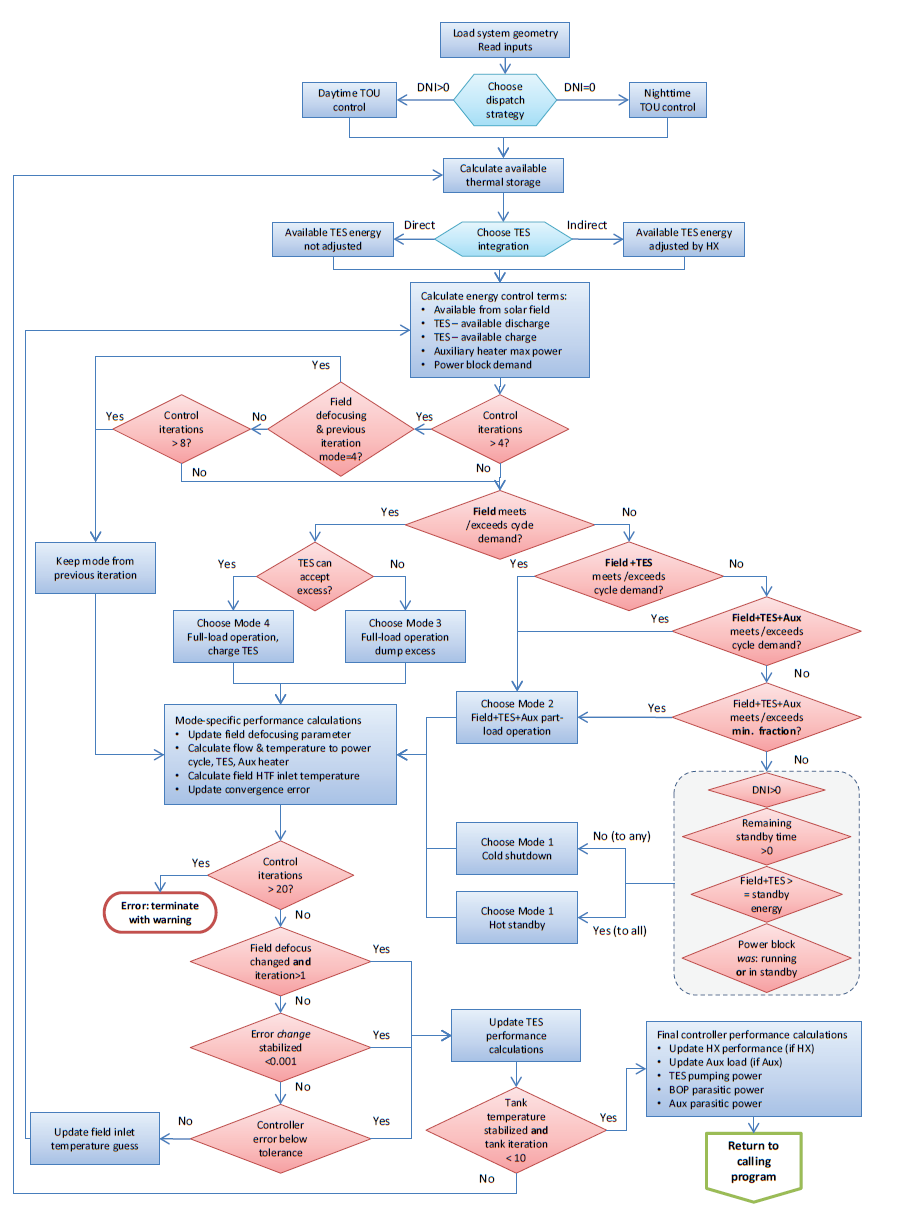

**Figure 31: The control flow diagram for the physical trough model.**

# 5 Parasitic Losses

All thermal power conversion systems include devices that consume energy produced by the power cycle. A number of critical components require electrical energy for power including pumps, fans, site lighting, and tracking devices. For plants that produce electricity as the final product, this energy can be siphoned off from the plant generator output before it reaches the grid. Though not applicable for the System Advisor trough model, plants that produce only thermal energy or mechanical power, or plants that are not actively producing power must acquire electricity from external sources.

Parasitic losses have a major impact on the overall plant performance. A trough CSP plant can lose anywhere between 10-15% of the gross electric output to parasitic losses. Accurately accounting for these losses both improves model accuracy and allows the modeler to optimize the design of the parasitic systems. For example, the parasitic pumping power required to move the HTF through the solar field is a strong function of piping diameter; by characterizing the parasitic field pumping losses, we can begin to understand the relative impact of changing the receiver diameter on plant performance.

## 5.1 Losses modeled in System Advisor

System Advisor uses several different approaches to model parasitic losses. These include the detailed approach described for the piping model in Section 2.5 and the power cycle parasitics in Section 3.3 as well as the more general coefficient-based model explained here. The model directly accounts for ten individual parasitic loads, not including the power cycle pumps that are implicit in the regression model. Table 18 lists each of these items, the code block that calculates the loss, and a summary of the modeling approach.

**Table 18: A summary of the parasitic losses accounted for by System Advisor**

|          | Loss                         | Subsystem          | Modeling Approach                |
|----------|------------------------------|--------------------|----------------------------------|
| 1.       | SCA drives & electronics    | Solar field        | Coefficient-based calculation   |
| 2.       | Solar field HTF pumps       | Solar field        | Detailed performance model      |
| 3.       | Piping freeze protection    | Solar field        | Detailed performance model      |
| 4.       | Power cycle HTF pump        | Controller         | Coefficient-based calculation   |
| 5.       | Storage HTF pump             | Controller         | Coefficient-based calculation   |
| 6.       | Fixed parasitic losses      | Controller         | Constant fractional loss        |
| 7.       | Balance of plant parasitics | Controller         | Polynomial curve with coefficients |
| 8.       | Auxiliary heater operation  | Controller         | Polynomial curve with coefficients |
| 9.       | Heat rejection equipment    | Power cycle        | Detailed performance model      |
| 10.      | Storage heat trace heater   | Thermal storage    | Detailed performance model      |

Detailed performance-based models characterize losses based on system geometry. Whether it's piping freeze protection (Sec. 2.4), field HTF pumps (Sec. 2.5), power cycle heat rejection (Sec. 3.3) or thermal storage heaters (Sec. 4.1), each of these parasitic losses are calculated as part of the performance of their respective subsystems.

## 5.2 Parasitic loss calculations

The remainder of the parasitic loss calculations take a simpler approach, formulating the loss in terms of system capacity or performance. Each coefficient- or equation-based parasitic loss is presented in the following discussion.

### 5.2.1 SCA drives

SCA drives are part of the collector tracking system in the solar field. The drives are assumed to operate at a constant power during all hours of solar field operation, although this may not be the case in a real plant. This parasitic loss accounts for any electrical load associated with the collector assemblies during daylight hours, including the tracking motors, electronic control equipment, and possibly mirror washing equipment. The total load is a function of the number of collectors in the solar field, where each collector is assigned the user-specified power rating $C_{\dot{W},track}$ from the Parasities page.20

$$\dot{W}_{track}=N_{sca}\ N_{loops}\ C_{\dot{W},track}\ :\ \dot{q}_{sf}>0 \tag{5.1}$$

### 5.2.2 Power cycle HTF pumps

Real trough plants use a single set of HTF pumps to move fluid through the solar field, thermal storage (on the solar field side), and the power cycle loop. However, System Advisor conceptually separates the parasitic load required for the solar field from the load for pumping HTF through the power cycle and thermal storage. This separation is necessary because almost no information is available concerning the geometry and sizing of the power cycle heat exchangers or the thermal storage heat exchanger, whereas enough information is provided in the model to accurately calculate a pressure drop across the solar field. For that reason, a simplified coefficient-based approach is used for the HTF mass that passes through the power cycle and thermal storage.

$$\dot{W}_{p,pb\&tes}=C_{p,pb\&tes}\ (\dot{m}_{pb}+\dot{m}_{tes,sf}) \tag{5.2}$$

The user-specified pump power coefficient $C_{p,pb\&tes}$ is expressed in units of kilojoules per kg of mass passing through either the power cycle steam generators or through the thermal storage heat exchanger on the solar field side. Alternately, the units for this coefficient can be expressed as the ratio of the pumping power requirement to the mass flow rate requirement, or $\frac{f}{s}/\frac{kg}{s}$. In indirect storage systems, the HTF mass flow rate $\dot{m}_{tes,sf}$ refers only to the mass flow rate on the solar field side that is distinct from the mass flow rate into and out of the tanks themselves.

### 5.2.3 Storage HTF pump

The storage HTF pump parasitic is calculated using the same methodology as the power cycle HTF pump. The user-specified coefficient $C_{p,tes}$ determines the power requirement to move HTF from one tank to another. For indirect systems, this means moving HTF from one tank through the field-to-TES heat exchanger. Direct storage systems can charge and dischargestorage without a heat exchanger, so the dedicated TES-side pumping power is set to zero in the model.

$$\dot{W}_{p,tes} = C_{p,tes}\ \dot{m}_{tes}\ :\ \text{Indirect TES} \tag{5.3}$$
$$\dot{W}_{p,tes} = 0\ :\ \text{Direct TES}$$

### 5.2.4 Fixed parasitic losses

Utility-scale CSP projects require maintenance staff and support facilities on site to keep the plant operational. Building loads, lighting, and other loads must be accounted for in the net electricity output of the plant. These loads are incurred for all hours of the day over the lifetime of the plant, and System Advisor approximates their sum as a fixed fractional loss of the total gross design output based on the user-specified "Fraction of rated gross power consumed at all times" variable on the Parasities page.

$$\dot{W}_{fixed}=C_{fixed}\ \dot{W}_{des} \tag{5.4}$$

### 5.2.5 Balance of plant parasities

The balance of plant parasitic load is a polynomial equation that provides a parasitic load as a function of energy production. This load does not account for any specific set of parasities, but captures any loss that scales as a function of the plant energy production. The equation is specifically a function of the energy delivered to the power cycle and the design power output. The user-specified coefficients and factors for this equation are labeled as "Balance of plant parasitic" variables on the Parasities page. Three coefficients $C_{bal,0-2}$ are used to define the shape of the equation, and a multiplying factor $f_{bal}$ and an adjustment factor $f_{adj}$ set and scale the magnitude of the parasitic loss.

$$\dot{W}_{bal}=\dot{W}_{des}\ f_{bal}\ f_{adj}\left(C_{bal,0}+C_{bal,1}\ \frac{\dot{Q}}{\dot{Q}_{des}}+C_{bal,2}\ \left(\frac{\dot{Q}}{\dot{Q}_{des}}\right)^{2}\right) \tag{5.5}$$

### 5.2.6 Auxiliary heater operation

Operating the auxiliary fossil heater can consume a moderate electrical load. This parasitic loss is modeled using the same approach as the balance of plant losses, except that the equation is based on the load supplied to the auxiliary heater.

$$\dot{W}_{aux}=\dot{W}_{des}\ f_{aux}\ f_{adj}\left(C_{aux,0}+C_{aux,1}\ \frac{\dot{q}_{aux}}{\dot{Q}_{des}}+C_{aux,2}\ \left(\frac{\dot{q}_{aux}}{\dot{Q}_{des}}\right)^{2}\right) \tag{5.6}$$

#### Thermal loss, etc.

The Parasities page in System Advisor also includes a piping thermal loss coefficient. This loss, like other thermal losses, is not a true parasitic loss since it doesn't directly draw energy from the total output. Piping thermal loss is modeled in the solar field using Eq.[2.26] in Section 2.2.

## 5.3 Practical considerations

Net energy output during any given time step is equal to the gross power produced by the power cycle minus the sum of all active parasitic loads, as shown in Eq.[5.7]. All financial equations in System Advisor including LCOE, and PPA price use the total-annual net energy value in their calculations.

$$\dot{W}_{net}=\dot{W}-\left(\dot{W}_{track}+\dot{W}_{p,pb\&res}+\dot{W}_{p,tes }+\dot{W}_{fixed}+\dot{W}_{bal}+\dot{W}_{aux}\right) \tag{5.7}$$

While the net electricity output is certainly an important metric of performance, some users may also require specific knowledge about how parasitic loads are met. Since no power plant (not even fossil or nuclear plants) can operate at 100% capacity, electricity for parasitic power consumption during non-production hours must sometimes be purchased from the grid. Parasitic energy during production hours is "free" - it comes from the plant's generated electricity and doesn't need to be purchased. Therefore, a distinction between "online" and "offline" parasitics is important, and may impact the profitability of a project.

The online and offline parasitics can be calculated from the hourly output file using only the net and gross electrical output columns. The parasitic load is always equal to the difference between gross and net output, and offline parasitics are tallied during hours when the gross output is equal to zero, otherwise the parasitics are considered online.

$$\dot{W}_{par,online} = \dot{W}-\dot{W}_{net}\,:\,\,\dot{W}>0 \tag{5.8}$$
$$\dot{W}_{par,offline} = \dot{W}_{net}\,:\,\,\dot{W}=0 \tag{5.9}$$

## 5.4 Net production at design

Most electricity production systems are described in terms of how much power will be delivered to the load when operating at design conditions. This characterization makes sense for plants that operate at steady state over most of their lifetime. However, CSP power production can change significantly depending on the mode of operation. Since solar field HTF pumps are the largest parasitic load, the plant will produce somewhat less energy when the pumps are operating at full load. Figure 32 illustrates how the net electric output varies depending on the time of day, while the gross generator output stays constant.

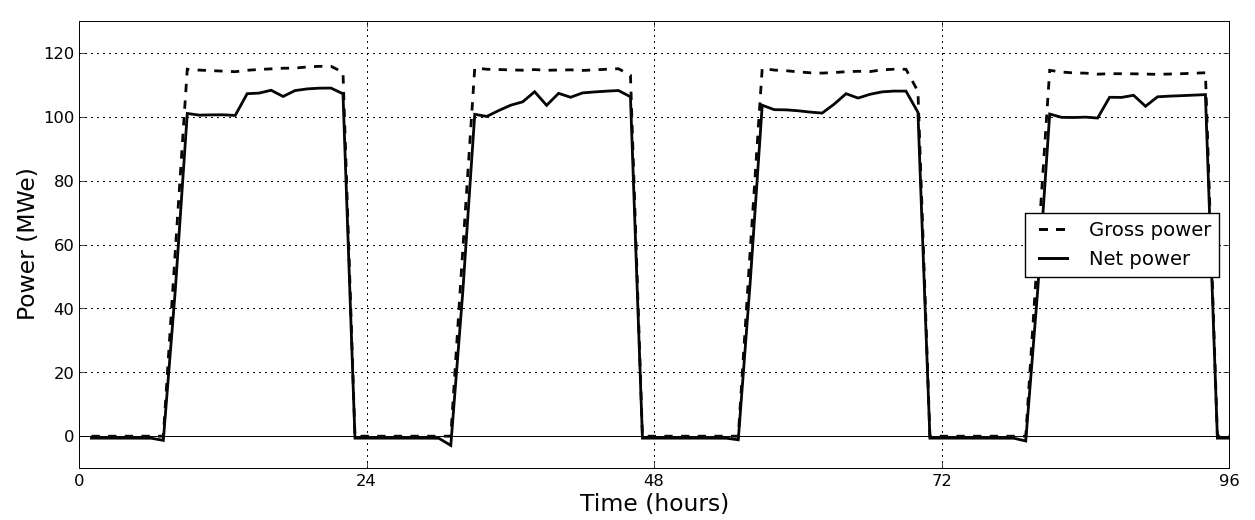

**Figure 32: The net and gross power over a period of four days.**

of the first two columns. If we are to estimate the net power output "at design", we first need to establish which parasitic loads are active during the design state. However, it is rarely the case that all parasitic devices will operate at full-load concurrently. Accounting for all parasitics at once can lead to a complicated and confusing result. Rather than estimate design-point net power output, System Advisor uses an average conversion ratio approach, shown in Eq.[5.10]. The gross-to-net conversion ratio indicates the relative difference between the net electricity that reaches the grid and the gross power cycle output. This approach accounts for parasitics on an annual-average basis regardless of whether the plant operates at "design" or not. The authors believe that this is the best and simplest way to accurately characterize the impact of parasitic losses.

$$r_{net/gross}=\sum_{i=1}^{8760}\frac{\dot{W}_{net,i}}{\dot{W}_{i}}\cdot\left[ \frac{1\text{ year}}{8760\text{ hours}}\right] \tag{5.10}$$

# References

* [1] Martin J. Atkins, Michael R.W. Walmsley, and Andrew S. Morrison. Integration of solar thermal for improved energy efficiency in low-temperature-pinch industrial processes. _Energy_, 35:1867-1873, 2010.
* [2] A. Bejan. _Convection Heat Transfer_. John Wiley and Sons, New York, New York, USA, 2nd edition, 1995.
* [3] Jurgen Dersch, Michael Geyer, Ulf Herrmann, Scott A. Jones, Bruce Kelly, Rainer Kistner, Winfried Ortmanns, Robert Pitz-Paal, and Henry Price. Trough integration into power plants: A study on the performance and economy of integrated solar combined cycle systems. _Energy_, 29:947-959, 2004.
* [4] V. Dudley, G. Kolb, M. Sloan, and D. Kearney. SEGS LS2 solar collector test results. Technical Report SAND94-1884, Sandia National Laboratories, Albuquerque, New Mexico, USA, 1994.
* [5] J. Duffie and W. Beckman. _Solar Engineering of Thermal Processes_. John Wiley and Sons, Hoboken, New Jersey, USA, 3rd edition, 2006.
* [6] M. El Wakil. _Powerplant Technology_. McGraw-Hill Book Company, 1984.
* a computational tool for plant feasibility studies. Las Vegas, Nevada, USA, March 2008. Proceedings of the SolarPACES International Symposium.
* [8] R. Forristall. Heat transfer analysis and modeling of a parabolic trough solar receiver implemented in engineering equation solver. Technical Report NREL/TP-550-34169, National Renewable Energy Laboratory, Golden, Colorado, USA, 2003.
* [9] R.W. Fox, A.T. McDonald, and P.J. Pritchard. _Introduction to Fluid Mechanics_. John Wiley and Sons, Inc, Hoboken, New Jersey, USA, sixth edition, 2006.
* [10] P. Gilman. Solar Advisor Model User Manual. Technical report, National Renewable Energy Laboratory, Golden, Colorado (USA), April 2010.
* [11] V. Gnielinski. New equations for heat and mass transfer in turbulent pipe and channel flow. _International Chemical Engineering_, 16:359, 1976.
* [12] P. Griffin, K. Huschka, and G. Morin. Software for design, simulation, and cost estimation of solar thermal power and heat cycles. Berlin, Germany, 2009. Proceedings of the SolarPACES International Symposium.
* [13] F. Incropera and D. DeWitt. _Fundamentals of Heat and Mass Transfer_. Wiley, 5th edition, 2001.

* [14] B. Kelly and D. Kearney. Parabolic trough solar system piping model: Final report. Technical Report NREL/SR-550-40165, National Renewable Energy Laboratory, Golden, Colorado, USA, 2006.
* [15] S. Klein. Engineering Equation Solver (EES) for Microsoft Windows Operating System: Commercial and Professional Versions. Online at www.fchart.com, 2010.
* [16] A. McMahan. Design and optimization of organic ranking cycle solar-thermal power plants. Master's thesis, University of Wisconsin, Madison, Wisconsin, USA, 2006.
* [17] G. Nellis and S. Klein. _Heat Transfer_. Cambridge University Press, New York, New York, USA, 2009.
* [18] R. Piwko, K. Clark, L. Freeman, G. Jordan, and N. Miller. Western wind and solar integration study: Executive summary. Subcontract Report SR-550-47781, National Renewable Energy Laboratory, 1617 Cole Blvd., Golden, CO (USA), May 2010.
* [19] W. Stine and M. Geyer. _Power from the Sun_. Published online at www.powerfromthesun.net, 2001.
* [20] M. Wagner. Simulation and predictive performance modeling of utility-scale central receiver system power plants. Master's thesis, University of Wisconsin, Madison, Wisconsin, USA, 2008.
* [21] M. Wagner. Methodology for constructing reduced-order powerblock performance models for csp applications. Perpignon, France, 2010. Proceedings of the SolarPACES International Symposium, SolarPACES.
* [22] M. Wagner and C. Kutscher. Assessing the impact of heat rejection technology on CSP plant revenue. Perpignon, France, 2010. Proceedings of the SolarPACES International Symposium, SolarPACES.
* [23] M. Wagner and C. Kutscher. The impact of hybrid wet/dry cooling on concentrating solar power plant performance. Phoenix, Arizona, USA, 2010. Proceedings of the 4th International Conference on Energy Sustainability, ASME.
* [24] C.F.J. Wu and M. Hamada. _Experiments: Planning, Analysis, and Parameter Design Optimization_. Wiley, 2000.